# Facebook Business Activity Trends during COVID-19
##### ECM443 - Introduction to Data Science Coursework

Importing important libraries

In [524]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import glob
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import fsspec

%matplotlib inline

Read data

In [2]:
'''import os
import glob
os.chdir("C:/Users/LEGION/Documents/Msc Data Science - Uni of Exeter/ECMM443 - Introduction to Data Science (2023)/Coursework/data")

# use glob to match the pattern 'csv'
# match the pattern ('csv') and save the list of file names as `all_filenames`
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))] #loops through the csv's and saves the filenames

# combine all files in the list
facebookBAT_df = pd.concat([pd.read_csv(f) for f in all_filenames]) #loops through all_filenames, saves them in a list and combines them
facebookBAT_df.to_csv("combined_dataset.csv", index=False, encoding='utf-8-sig')
'''

'import os\nimport glob\nos.chdir("C:/Users/LEGION/Documents/Msc Data Science - Uni of Exeter/ECMM443 - Introduction to Data Science (2023)/Coursework/data")\n\n# use glob to match the pattern \'csv\'\n# match the pattern (\'csv\') and save the list of file names as `all_filenames`\nextension = \'csv\'\nall_filenames = [i for i in glob.glob(\'*.{}\'.format(extension))] #loops through the csv\'s and saves the filenames\n\n# combine all files in the list\nfacebookBAT_df = pd.concat([pd.read_csv(f) for f in all_filenames]) #loops through all_filenames, saves them in a list and combines them\nfacebookBAT_df.to_csv("combined_dataset.csv", index=False, encoding=\'utf-8-sig\')\n'

In [3]:
df = pd.read_csv("./data/combined_dataset.csv")
df['ds'] = pd.to_datetime(df.ds)
df['crisis_ds'] = pd.to_datetime(df.crisis_ds)

In [4]:
df.shape

(2396549, 12)

## Part 1: Basic Stats & Metrics
#### <span style="color:orange">Q1: Count the number of countries/regions being mentioned in the dataset.</span>
*Answer:* The data is broken down only on country level (gadm0) and there are 220 countries in total that are listed here. There is no data for regions (gadm1) and subregions (gadm2).

In [5]:
df

gadm_id       gadm_name  gadm_level      gadm0_name  gadm1_name  \
0           LUX      Luxembourg           0      Luxembourg         NaN   
1           LUX      Luxembourg           0      Luxembourg         NaN   
2           LUX      Luxembourg           0      Luxembourg         NaN   
3           LUX      Luxembourg           0      Luxembourg         NaN   
4           CZE  Czech Republic           0  Czech Republic         NaN   
...         ...             ...         ...             ...         ...   
2396544     TON           Tonga           0           Tonga         NaN   
2396545     TON           Tonga           0           Tonga         NaN   
2396546     TON           Tonga           0           Tonga         NaN   
2396547     TON           Tonga           0           Tonga         NaN   
2396548     TON           Tonga           0           Tonga         NaN   

         gadm2_name country      business_vertical  activity_quantile  \
0               NaN      LU                 Retail           0.550204   
1               NaN      LU          Home Services           0.641146   
2               NaN      LU           Local Events           0.663123   
3               NaN      LU          Manufacturing           0.504707   
4               NaN      CZ                    All           0.583032   
...             ...     ...                    ...                ...   
2396544         NaN      TO          Home Services           0.455671   
2396545         NaN      TO                 Retail           0.531731   
2396546         NaN      TO                    All           0.313514   
2396547         NaN      TO                 Travel           0.173580   
2396548         NaN      TO  Professional Services           0.479935   

         activity_percentage  crisis_ds         ds  
0                 116.600990 2020-03-01 2020-03-01  
1                 113.705543 2020-03-01 2020-03-01  
2                 103.226699 2020-03-01 2020-03-01  
3                 103.525641 2020-03-01 2020-03-01  
4                 108.645654 2020-03-01 2020-03-01  
...                      ...        ...        ...  
2396544           435.975067 2020-03-01 2022-11-29  
2396545           151.621622 2020-03-01 2022-11-29  
2396546           129.951923 2020-03-01 2022-11-29  
2396547            32.553191 2020-03-01 2022-11-29  
2396548           137.307692 2020-03-01 2022-11-29  

[2396549 rows x 12 columns]

In [6]:
df.gadm_name.nunique()

220

In [7]:
# percentage of NaN values
((df.isna().sum())*100/df.shape[0]).round(2)

gadm_id                  0.00
gadm_name                0.00
gadm_level               0.00
gadm0_name               0.00
gadm1_name             100.00
gadm2_name             100.00
country                  1.59
business_vertical        0.00
activity_quantile        0.00
activity_percentage      0.00
crisis_ds                0.00
ds                       0.00
dtype: float64

In [8]:
# get the names of countries in the dataset
np.sort(df.gadm_name.unique())

array(['Akrotiri and Dhekelia', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caspian Sea', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'Christmas Island',
       'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Curaçao', 'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',


#### <span style="color:orange">Q2: Count the total number of dates available for each country/state, in terms of the type of business. Describe missing values/duplicates (if there are any), and how you deal with anomalies (if there are any).</span>

In [9]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396549 entries, 0 to 2396548
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   gadm_id              2396549 non-null  object        
 1   gadm_name            2396549 non-null  object        
 2   gadm_level           2396549 non-null  int64         
 3   gadm0_name           2396549 non-null  object        
 4   gadm1_name           0 non-null        float64       
 5   gadm2_name           0 non-null        float64       
 6   country              2358397 non-null  object        
 7   business_vertical    2396549 non-null  object        
 8   activity_quantile    2396549 non-null  float64       
 9   activity_percentage  2396549 non-null  float64       
 10  crisis_ds            2396549 non-null  datetime64[ns]
 11  ds                   2396549 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(5)
me

First of all, we can see from the above that business verticals (some to all of them) were collected for each country and there is no missing value in the `ds` column. Now the question is, do all countries have the same number of dates captured.

In [10]:
# count of dates captured for each country
df.groupby('gadm_name')['ds'].count()

gadm_name
Akrotiri and Dhekelia     7028
Albania                  12048
Algeria                  12048
American Samoa            6024
Andorra                  12048
                         ...  
Vietnam                  12048
Virgin Islands, U.S.     12048
Zambia                   12048
Zimbabwe                 12048
Åland                    12048
Name: ds, Length: 220, dtype: int64

In [11]:
df.groupby('gadm_name')['ds'].count().value_counts()

12048    161
10040     15
11044     13
9036       7
1004       7
7028       4
6024       3
4016       3
8032       2
5020       2
3012       2
2009       1
Name: ds, dtype: int64

We can see already that total number of dates captured for each country varies but why? Was data for some countries captured for a longer period than others? First of all, we need to figure out the number of days out dataset spans from. From the documentation, it is expected to span from March 1st 2020 to November 29th 2022.

In [12]:
dt = pd.to_datetime('2020/03/01', format='%Y/%m/%d')
dt1 = pd.to_datetime('2022/11/29', format='%Y/%m/%d')

# including the last day to the count
(dt1-dt).days+1

1004

This already shows that the count is being made for all the dates in each business vertical for each country. This means that it dates will be replicated and it also shows that not all countries have all 12 business verticals. 

Let's carry out a unique count of the dates for each country.

In [13]:
# grouping by country name and getting the unique dates for each country
df.groupby('gadm_name')['ds'].nunique()

gadm_name
Akrotiri and Dhekelia    1004
Albania                  1004
Algeria                  1004
American Samoa           1004
Andorra                  1004
                         ... 
Vietnam                  1004
Virgin Islands, U.S.     1004
Zambia                   1004
Zimbabwe                 1004
Åland                    1004
Name: ds, Length: 220, dtype: int64

In [14]:
# getting a value counts of all the unique dates to see if there's any anomaly
df.groupby('gadm_name')['ds'].nunique().value_counts()

1004    220
Name: ds, dtype: int64

Therefore, there is no missing data for the dates captured for each country as all 220 countries have a total of 1004 unique dates and this match the expected time period of this dataset.

In [15]:
df.duplicated().sum()

0

There are no duplicated rows. But let's see the number of business verticals captured for each country.

In [16]:
df.groupby(['gadm_name','business_vertical'])['ds'].count().unstack()

business_vertical         All  Business & Utility Services  \
gadm_name                                                    
Akrotiri and Dhekelia  1004.0                          NaN   
Albania                1004.0                       1004.0   
Algeria                1004.0                       1004.0   
American Samoa         1004.0                          NaN   
Andorra                1004.0                       1004.0   
...                       ...                          ...   
Vietnam                1004.0                       1004.0   
Virgin Islands, U.S.   1004.0                       1004.0   
Zambia                 1004.0                       1004.0   
Zimbabwe               1004.0                       1004.0   
Åland                  1004.0                       1004.0   

business_vertical      Grocery & Convenience Stores  Home Services  \
gadm_name                                                            
Akrotiri and Dhekelia                           NaN         1004.0   
Albania                                      1004.0         1004.0   
Algeria                                      1004.0         1004.0   
American Samoa                                  NaN         1004.0   
Andorra                                      1004.0         1004.0   
...                                             ...            ...   
Vietnam                                      1004.0         1004.0   
Virgin Islands, U.S.                         1004.0         1004.0   
Zambia                                       1004.0         1004.0   
Zimbabwe                                     1004.0         1004.0   
Åland                                        1004.0         1004.0   

business_vertical      Lifestyle Services  Local Events  Manufacturing  \
gadm_name                                                                
Akrotiri and Dhekelia              1004.0        1004.0            NaN   
Albania                            1004.0        1004.0         1004.0   
Algeria                            1004.0        1004.0         1004.0   
American Samoa                     1004.0           NaN            NaN   
Andorra                            1004.0        1004.0         1004.0   
...                                   ...           ...            ...   
Vietnam                            1004.0        1004.0         1004.0   
Virgin Islands, U.S.               1004.0        1004.0         1004.0   
Zambia                             1004.0        1004.0         1004.0   
Zimbabwe                           1004.0        1004.0         1004.0   
Åland                              1004.0        1004.0         1004.0   

business_vertical      Professional Services  Public Good  Restaurants  \
gadm_name                                                                
Akrotiri and Dhekelia                 1004.0          NaN       1004.0   
Albania                               1004.0       1004.0       1004.0   
Algeria                               1004.0       1004.0       1004.0   
American Samoa                           NaN       1004.0       1004.0   
Andorra                               1004.0       1004.0       1004.0   
...                                      ...          ...          ...   
Vietnam                               1004.0       1004.0       1004.0   
Virgin Islands, U.S.                  1004.0       1004.0       1004.0   
Zambia                                1004.0       1004.0       1004.0   
Zimbabwe                              1004.0       1004.0       1004.0   
Åland                                 1004.0       1004.0       1004.0   

business_vertical      Retail  Travel  
gadm_name                              
Akrotiri and Dhekelia  1004.0     NaN  
Albania                1004.0  1004.0  
Algeria                1004.0  1004.0  
American Samoa         1004.0     NaN  
Andorra                1004.0  1004.0  
...                       ...     ...  
Vietnam                1004.0  1004.

In [17]:
df.groupby(['gadm_name','business_vertical'])['ds'].count().unstack().nunique(axis=1).value_counts()

1    219
2      1
dtype: int64

We can see that yes, some countries might not have some business verticals captured due to such industries being underrepresented on Facebook Business pages but most country-business vertical cells have 1004 dates captured apart from 1. I'll love to find out which country and why

In [18]:
df.groupby(['gadm_name','business_vertical'])['ds'].count().unstack()

business_vertical         All  Business & Utility Services  \
gadm_name                                                    
Akrotiri and Dhekelia  1004.0                          NaN   
Albania                1004.0                       1004.0   
Algeria                1004.0                       1004.0   
American Samoa         1004.0                          NaN   
Andorra                1004.0                       1004.0   
...                       ...                          ...   
Vietnam                1004.0                       1004.0   
Virgin Islands, U.S.   1004.0                       1004.0   
Zambia                 1004.0                       1004.0   
Zimbabwe               1004.0                       1004.0   
Åland                  1004.0                       1004.0   

business_vertical      Grocery & Convenience Stores  Home Services  \
gadm_name                                                            
Akrotiri and Dhekelia                           NaN         1004.0   
Albania                                      1004.0         1004.0   
Algeria                                      1004.0         1004.0   
American Samoa                                  NaN         1004.0   
Andorra                                      1004.0         1004.0   
...                                             ...            ...   
Vietnam                                      1004.0         1004.0   
Virgin Islands, U.S.                         1004.0         1004.0   
Zambia                                       1004.0         1004.0   
Zimbabwe                                     1004.0         1004.0   
Åland                                        1004.0         1004.0   

business_vertical      Lifestyle Services  Local Events  Manufacturing  \
gadm_name                                                                
Akrotiri and Dhekelia              1004.0        1004.0            NaN   
Albania                            1004.0        1004.0         1004.0   
Algeria                            1004.0        1004.0         1004.0   
American Samoa                     1004.0           NaN            NaN   
Andorra                            1004.0        1004.0         1004.0   
...                                   ...           ...            ...   
Vietnam                            1004.0        1004.0         1004.0   
Virgin Islands, U.S.               1004.0        1004.0         1004.0   
Zambia                             1004.0        1004.0         1004.0   
Zimbabwe                           1004.0        1004.0         1004.0   
Åland                              1004.0        1004.0         1004.0   

business_vertical      Professional Services  Public Good  Restaurants  \
gadm_name                                                                
Akrotiri and Dhekelia                 1004.0          NaN       1004.0   
Albania                               1004.0       1004.0       1004.0   
Algeria                               1004.0       1004.0       1004.0   
American Samoa                           NaN       1004.0       1004.0   
Andorra                               1004.0       1004.0       1004.0   
...                                      ...          ...          ...   
Vietnam                               1004.0       1004.0       1004.0   
Virgin Islands, U.S.                  1004.0       1004.0       1004.0   
Zambia                                1004.0       1004.0       1004.0   
Zimbabwe                              1004.0       1004.0       1004.0   
Åland                                 1004.0       1004.0       1004.0   

business_vertical      Retail  Travel  
gadm_name                              
Akrotiri and Dhekelia  1004.0     NaN  
Albania                1004.0  1004.0  
Algeria                1004.0  1004.0  
American Samoa         1004.0     NaN  
Andorra                1004.0  1004.0  
...                       ...     ...  
Vietnam                1004.0  1004.

In [19]:
a = (df.groupby(['gadm_name','business_vertical'])['ds'].count().unstack() < 1004).sum(axis=1) 

In [20]:
a[a>0]

gadm_name
Turkmenistan    1
dtype: int64

In [21]:
df.groupby(['gadm_name','business_vertical'])['ds'].count().unstack().loc[['Turkmenistan']]

business_vertical     All  Business & Utility Services  \
gadm_name                                                
Turkmenistan       1004.0                          NaN   

business_vertical  Grocery & Convenience Stores  Home Services  \
gadm_name                                                        
Turkmenistan                                NaN            NaN   

business_vertical  Lifestyle Services  Local Events  Manufacturing  \
gadm_name                                                            
Turkmenistan                      NaN           NaN            NaN   

business_vertical  Professional Services  Public Good  Restaurants  Retail  \
gadm_name                                                                    
Turkmenistan                         NaN          NaN       1004.0     1.0   

business_vertical  Travel  
gadm_name                  
Turkmenistan          NaN

So there's just one date for the retail business vertical in Turkmenistan.

In [22]:
df.query("(gadm_name=='Turkmenistan') & (business_vertical=='Retail')")

gadm_id     gadm_name  gadm_level    gadm0_name  gadm1_name  \
312774     TKM  Turkmenistan           0  Turkmenistan         NaN   

        gadm2_name country business_vertical  activity_quantile  \
312774         NaN      TM            Retail           0.960425   

        activity_percentage  crisis_ds         ds  
312774          3215.490873 2020-03-01 2020-07-10

In [23]:
# dropping unnecessary columns
df = df.drop(labels=['gadm1_name','gadm2_name','gadm_level','country','gadm0_name'], axis=1)

#### <span style="color:orange">Q3: There are two metrics in the data: `activity_quantile` and `activity_percentage`. Look at the metadata of the dataset and write your understanding about these two metrics, e.g., how are they calculated (using equations), and what do they mean in the real world?</span>
Answered in report

#### <span style="color:orange">Q4: Choose 6 different countries (preferably from different continents), plot time-series figures for your chosen type(s) of business. Comment on what you see.</span>

In [24]:
sns.set_style("darkgrid")

In [25]:
df.business_vertical.unique()

array(['Retail', 'Home Services', 'Local Events', 'Manufacturing', 'All',
       'Public Good', 'Travel', 'Lifestyle Services',
       'Business & Utility Services', 'Professional Services',
       'Grocery & Convenience Stores', 'Restaurants'], dtype=object)

In [26]:
# selecting countries and businesses of choice
choice_countries = ['Brazil', 'United Kingdom', 'Nigeria', 'Kyrgyzstan', 'New Zealand', 'Sweden']
choice_busvert = ['Grocery & Convenience Stores', 'Restaurants', 'All']

In [27]:
df_countries_busvert = df.query("(gadm_name in @choice_countries) & (business_vertical in @choice_busvert)").copy()

In [28]:
df_countries_busvert.gadm_name.unique()

array(['Kyrgyzstan', 'United Kingdom', 'Brazil', 'Nigeria', 'Sweden',
       'New Zealand'], dtype=object)

In [29]:
df_countries_busvert.business_vertical.unique()

array(['All', 'Grocery & Convenience Stores', 'Restaurants'], dtype=object)

In [30]:
# confirming that all our countries have the desired business verticals
df_countries_busvert.groupby('gadm_name')['business_vertical'].nunique()

gadm_name
Brazil            3
Kyrgyzstan        3
New Zealand       3
Nigeria           3
Sweden            3
United Kingdom    3
Name: business_vertical, dtype: int64

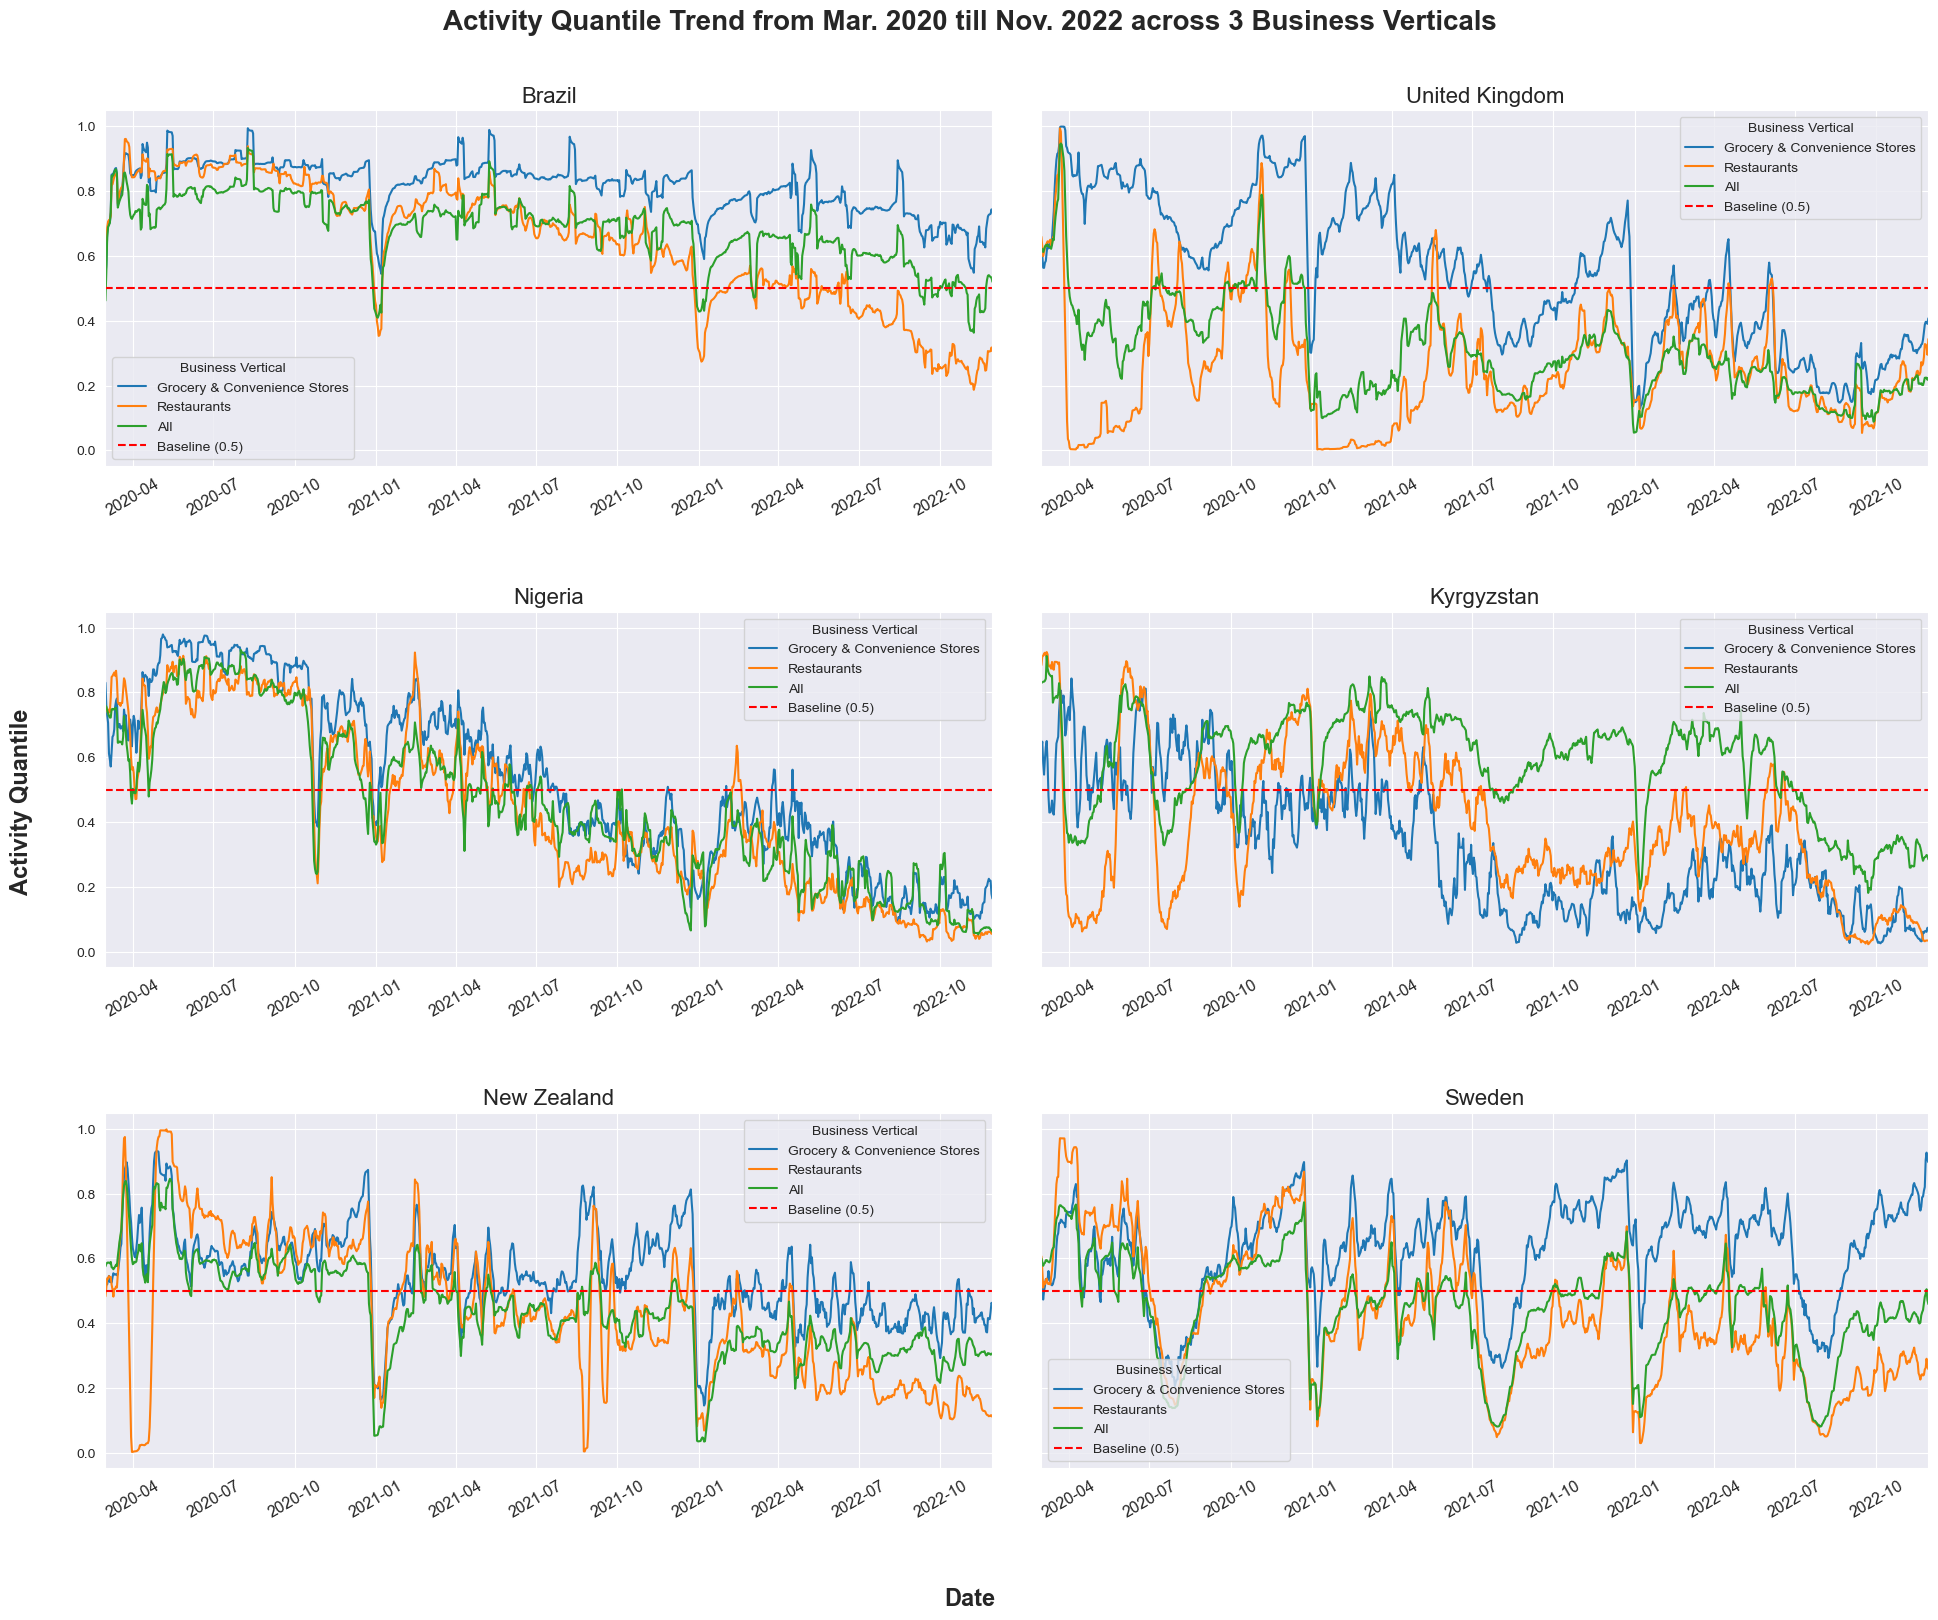

In [31]:
fig, axes = plt.subplots(3, 2, sharex=False, sharey=True, figsize=(20, 16.5))#, dpi=300)
hue_order = choice_busvert

# Use the axes for plotting
for i,j in enumerate(choice_countries):
      if i < 2:
            plotData = df_countries_busvert.query('gadm_name == @j')
            g = sns.lineplot(x='ds', y='activity_quantile', data=plotData,
                        hue='business_vertical', hue_order=hue_order, palette='tab10',
                        ax=axes[0,i])
            axes[0,i].axhline(y=0.5, color='red', linestyle='--', 
                              label='Baseline (0.5)')
            #g.legend(fontsize=7)
            g.legend(title='Business Vertical')#, loc='upper right', fontsize=9)
            axes[0,i].tick_params(axis='x', rotation=30, labelsize=11.5)
            axes[0,i].set_xlim([plotData.ds.min(),plotData.ds.max()])
            axes[0,i].set_xlabel('')
            axes[0,i].set_ylabel('')
            axes[0,i].set_title(j, fontsize=16)
      elif i < 4:
            plotData = df_countries_busvert.query('gadm_name == @j')
            g = sns.lineplot(x='ds', y='activity_quantile', data=plotData,
                        hue='business_vertical', hue_order=hue_order, palette='tab10',
                        ax=axes[1,i-2])
            axes[1,i-2].axhline(y=0.5, color='red', linestyle='--', 
                              label='Baseline (0.5)')
            #g.legend(fontsize=7)
            #axes[0,0].set_yticks(ticks=np.arange(0,2,0.2))
            g.legend(title='Business Vertical')#, loc='upper right', fontsize=9)
            axes[1,i-2].tick_params(axis='x', rotation=30, labelsize=11.5)
            axes[1,i-2].set_xlim([plotData.ds.min(),plotData.ds.max()])
            axes[1,i-2].set_xlabel('')
            axes[1,i-2].set_ylabel('')
            axes[1,i-2].set_title(j, fontsize=16)
      else:
            plotData = df_countries_busvert.query('gadm_name == @j')
            g = sns.lineplot(x='ds', y='activity_quantile', data=plotData,
                        hue='business_vertical', hue_order=hue_order, palette='tab10',
                        ax=axes[2,i-4])
            axes[2,i-4].axhline(y=0.5, color='red', linestyle='--', 
                              label='Baseline (0.5)')
            #g.legend(fontsize=7)
            g.legend(title='Business Vertical')#, loc='upper right', fontsize=9)
            axes[2,i-4].tick_params(axis='x', rotation=30, labelsize=11.5)
            axes[2,i-4].set_xlim([plotData.ds.min(),plotData.ds.max()])
            axes[2,i-4].set_xlabel('')
            axes[2,i-4].set_ylabel('')
            axes[2,i-4].set_title(j, fontsize=16)        
            

fig.supxlabel('Date', fontsize=17, fontweight='bold')
fig.supylabel('Activity Quantile', fontsize=17, fontweight='bold')
fig.suptitle('Activity Quantile Trend from Mar. 2020 till Nov. 2022 across 3 Business Verticals', fontsize=20, fontweight='bold')
fig.tight_layout(pad=3, h_pad=5)

# save figure
plt.savefig('figures/q4_activity_quant_for_bus_verts.png')
 
plt.show()

#### <span style="color:orange">Q5: Are there any other patterns you could find in the dataset e.g. weekdays and weekends? Comment on what you see? .</span>

Note that this isn't the main analysis section. You're just commenting on what you've seen. For the length sake, just focus on the "All" business-vertical for this deep dive. (Use median values)
* First talk about your detrending of the time series data and looking at the seasonality, cyclical variation and unexplained variation for each of the data. Have a plot for that. Put the plots for the trend and detrend time series data in the appendix
* Go through the quarterly, monthly and daily box plot of residuals.

Let's get the regression line of the time series for each of the countries.

In [32]:
# getting subset of only 'All' business vertical
seasonality_analysis = df_countries_busvert.query("business_vertical == 'All'")

In [33]:
pred_vals_arr = [] # empty list to contain all the predictions for activity quantile

# standardizing x values which would be represent days since datetime format can be
# in LinearRegression
scaler = StandardScaler()
X = np.arange(seasonality_analysis.ds.nunique()).reshape([-1,1])
scaler.fit(X)
stand_X = scaler.transform(X) # standardized X values

# perform linear regression on the timeseries data for each country
for i in choice_countries:
      trend_model = LinearRegression()
      trend_model.fit(stand_X, 
                      seasonality_analysis.query("gadm_name == @i")['activity_quantile'].values)
      pred_vals = trend_model.predict(stand_X) # get the predicted activity quantile given the dates
      pred_vals_arr.append(pred_vals)

# convert pred_vals_arr to df
pred_vals_df = pd.DataFrame(pred_vals_arr).T
pred_vals_df.columns = choice_countries

In [34]:
seasonality_analysis.head()

gadm_id       gadm_name business_vertical  activity_quantile  \
174      KGZ      Kyrgyzstan               All           0.828889   
2045     SWE          Sweden               All           0.600318   
2057     GBR  United Kingdom               All           0.622843   
2201     BRA          Brazil               All           0.462480   
2214     NGA         Nigeria               All           0.758963   

      activity_percentage  crisis_ds         ds  
174            150.981459 2020-03-01 2020-03-01  
2045           113.800573 2020-03-01 2020-03-01  
2057           112.403265 2020-03-01 2020-03-01  
2201           110.330741 2020-03-01 2020-03-01  
2214           117.680265 2020-03-01 2020-03-01

Plot regression line in timeseries plot

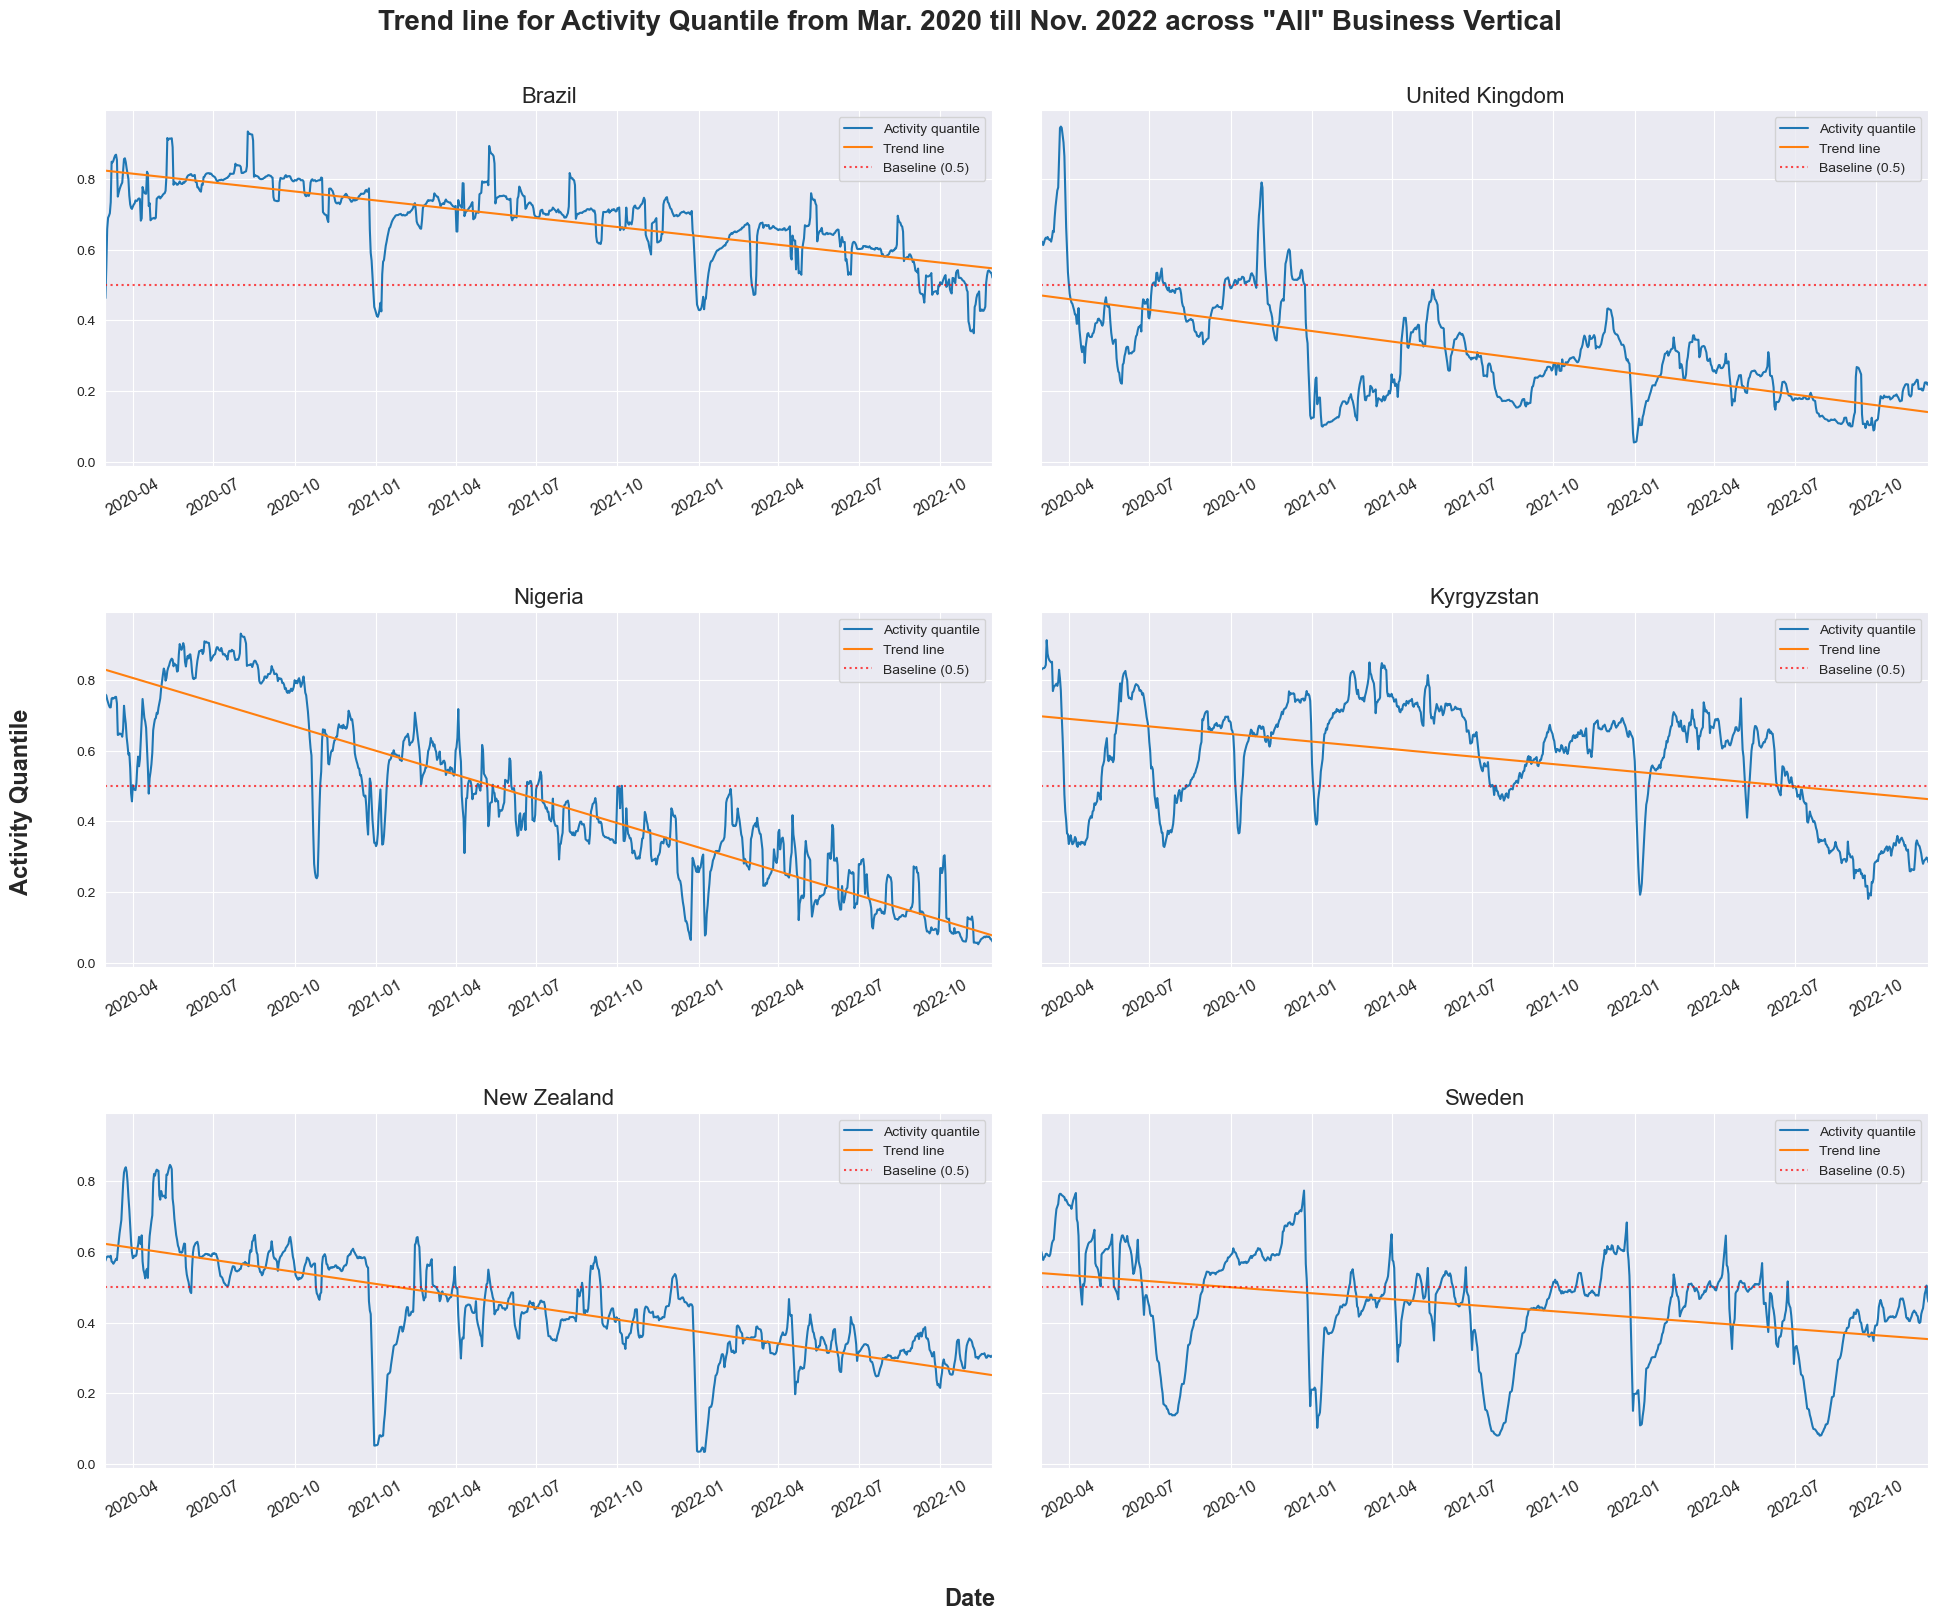

In [35]:
fig, axes = plt.subplots(3, 2, sharex=False, sharey=True, figsize=(20, 16.5))#, dpi=300)

# Use the axes for plotting
for i,j in enumerate(choice_countries):
      if i < 2:
            plotData = seasonality_analysis.query('gadm_name == @j')
            g = sns.lineplot(x='ds', y='activity_quantile', data=plotData,
                             ax=axes[0,i], label='Activity quantile')
            # basically use the axes[].plot(x,y,color=orange) to plot your trend line boss
            axes[0,i].plot(plotData['ds'].values, pred_vals_df[j].values, 
                           label='Trend line')
            axes[0,i].axhline(y=0.5, color='red', linestyle=':', 
                              label='Baseline (0.5)', alpha=0.7)
            #g.legend(fontsize=7)
            g.legend()#, loc='upper right', fontsize=9)
            axes[0,i].tick_params(axis='x', rotation=30, labelsize=11.5)
            axes[0,i].set_xlim([plotData.ds.min(),plotData.ds.max()])
            axes[0,i].set_xlabel('')
            axes[0,i].set_ylabel('')
            axes[0,i].set_title(j, fontsize=16)
      elif i < 4:
            plotData = seasonality_analysis.query('gadm_name == @j')
            g = sns.lineplot(x='ds', y='activity_quantile', data=plotData,
                             ax=axes[1,i-2], label='Activity quantile')
            axes[1,i-2].plot(plotData['ds'].values, pred_vals_df[j].values, 
                             label='Trend line')
            axes[1,i-2].axhline(y=0.5, color='red', linestyle=':', 
                                label='Baseline (0.5)', alpha=0.7)
            #g.legend(fontsize=7)
            #axes[0,0].set_yticks(ticks=np.arange(0,2,0.2))
            g.legend()#, loc='upper right', fontsize=9)
            axes[1,i-2].tick_params(axis='x', rotation=30, labelsize=11.5)
            axes[1,i-2].set_xlim([plotData.ds.min(),plotData.ds.max()])
            axes[1,i-2].set_xlabel('')
            axes[1,i-2].set_ylabel('')
            axes[1,i-2].set_title(j, fontsize=16)
      else:
            plotData = seasonality_analysis.query('gadm_name == @j')
            g = sns.lineplot(x='ds', y='activity_quantile', data=plotData,
                             ax=axes[2,i-4], label='Activity quantile')
            axes[2,i-4].plot(plotData['ds'].values, pred_vals_df[j].values, 
                             label='Trend line')
            axes[2,i-4].axhline(y=0.5, color='red', linestyle=':', 
                              label='Baseline (0.5)', alpha=0.7)
            #g.legend(fontsize=7)
            g.legend()#, loc='upper right', fontsize=9)
            axes[2,i-4].tick_params(axis='x', rotation=30, labelsize=11.5)
            axes[2,i-4].set_xlim([plotData.ds.min(),plotData.ds.max()])
            axes[2,i-4].set_xlabel('')
            axes[2,i-4].set_ylabel('')
            axes[2,i-4].set_title(j, fontsize=16)        
            

fig.supxlabel('Date', fontsize=17, fontweight='bold')
fig.supylabel('Activity Quantile', fontsize=17, fontweight='bold')
fig.suptitle('Trend line for Activity Quantile from Mar. 2020 till Nov. 2022 across "All" Business Vertical', fontsize=20, fontweight='bold')
fig.tight_layout(pad=3, h_pad=5)

# save figure
plt.savefig('figures/q5.1_trend_line_activity_quant.png')
 
plt.show()

Time to detrend the data by getting the residuals.

In [36]:
# sum() should return the same value since it should only sum over one element
actual_vals_df = seasonality_analysis.groupby(["gadm_name","ds"])['activity_quantile'].sum().unstack().T
actual_vals_df = actual_vals_df[choice_countries].reset_index(drop=True) # rearranging the columns and reseting the index

In [37]:
# get the residuals
residuals_df = actual_vals_df - pred_vals_df
# adding dates column
residuals_df['date'] = seasonality_analysis.query("gadm_name=='Brazil'").ds.values

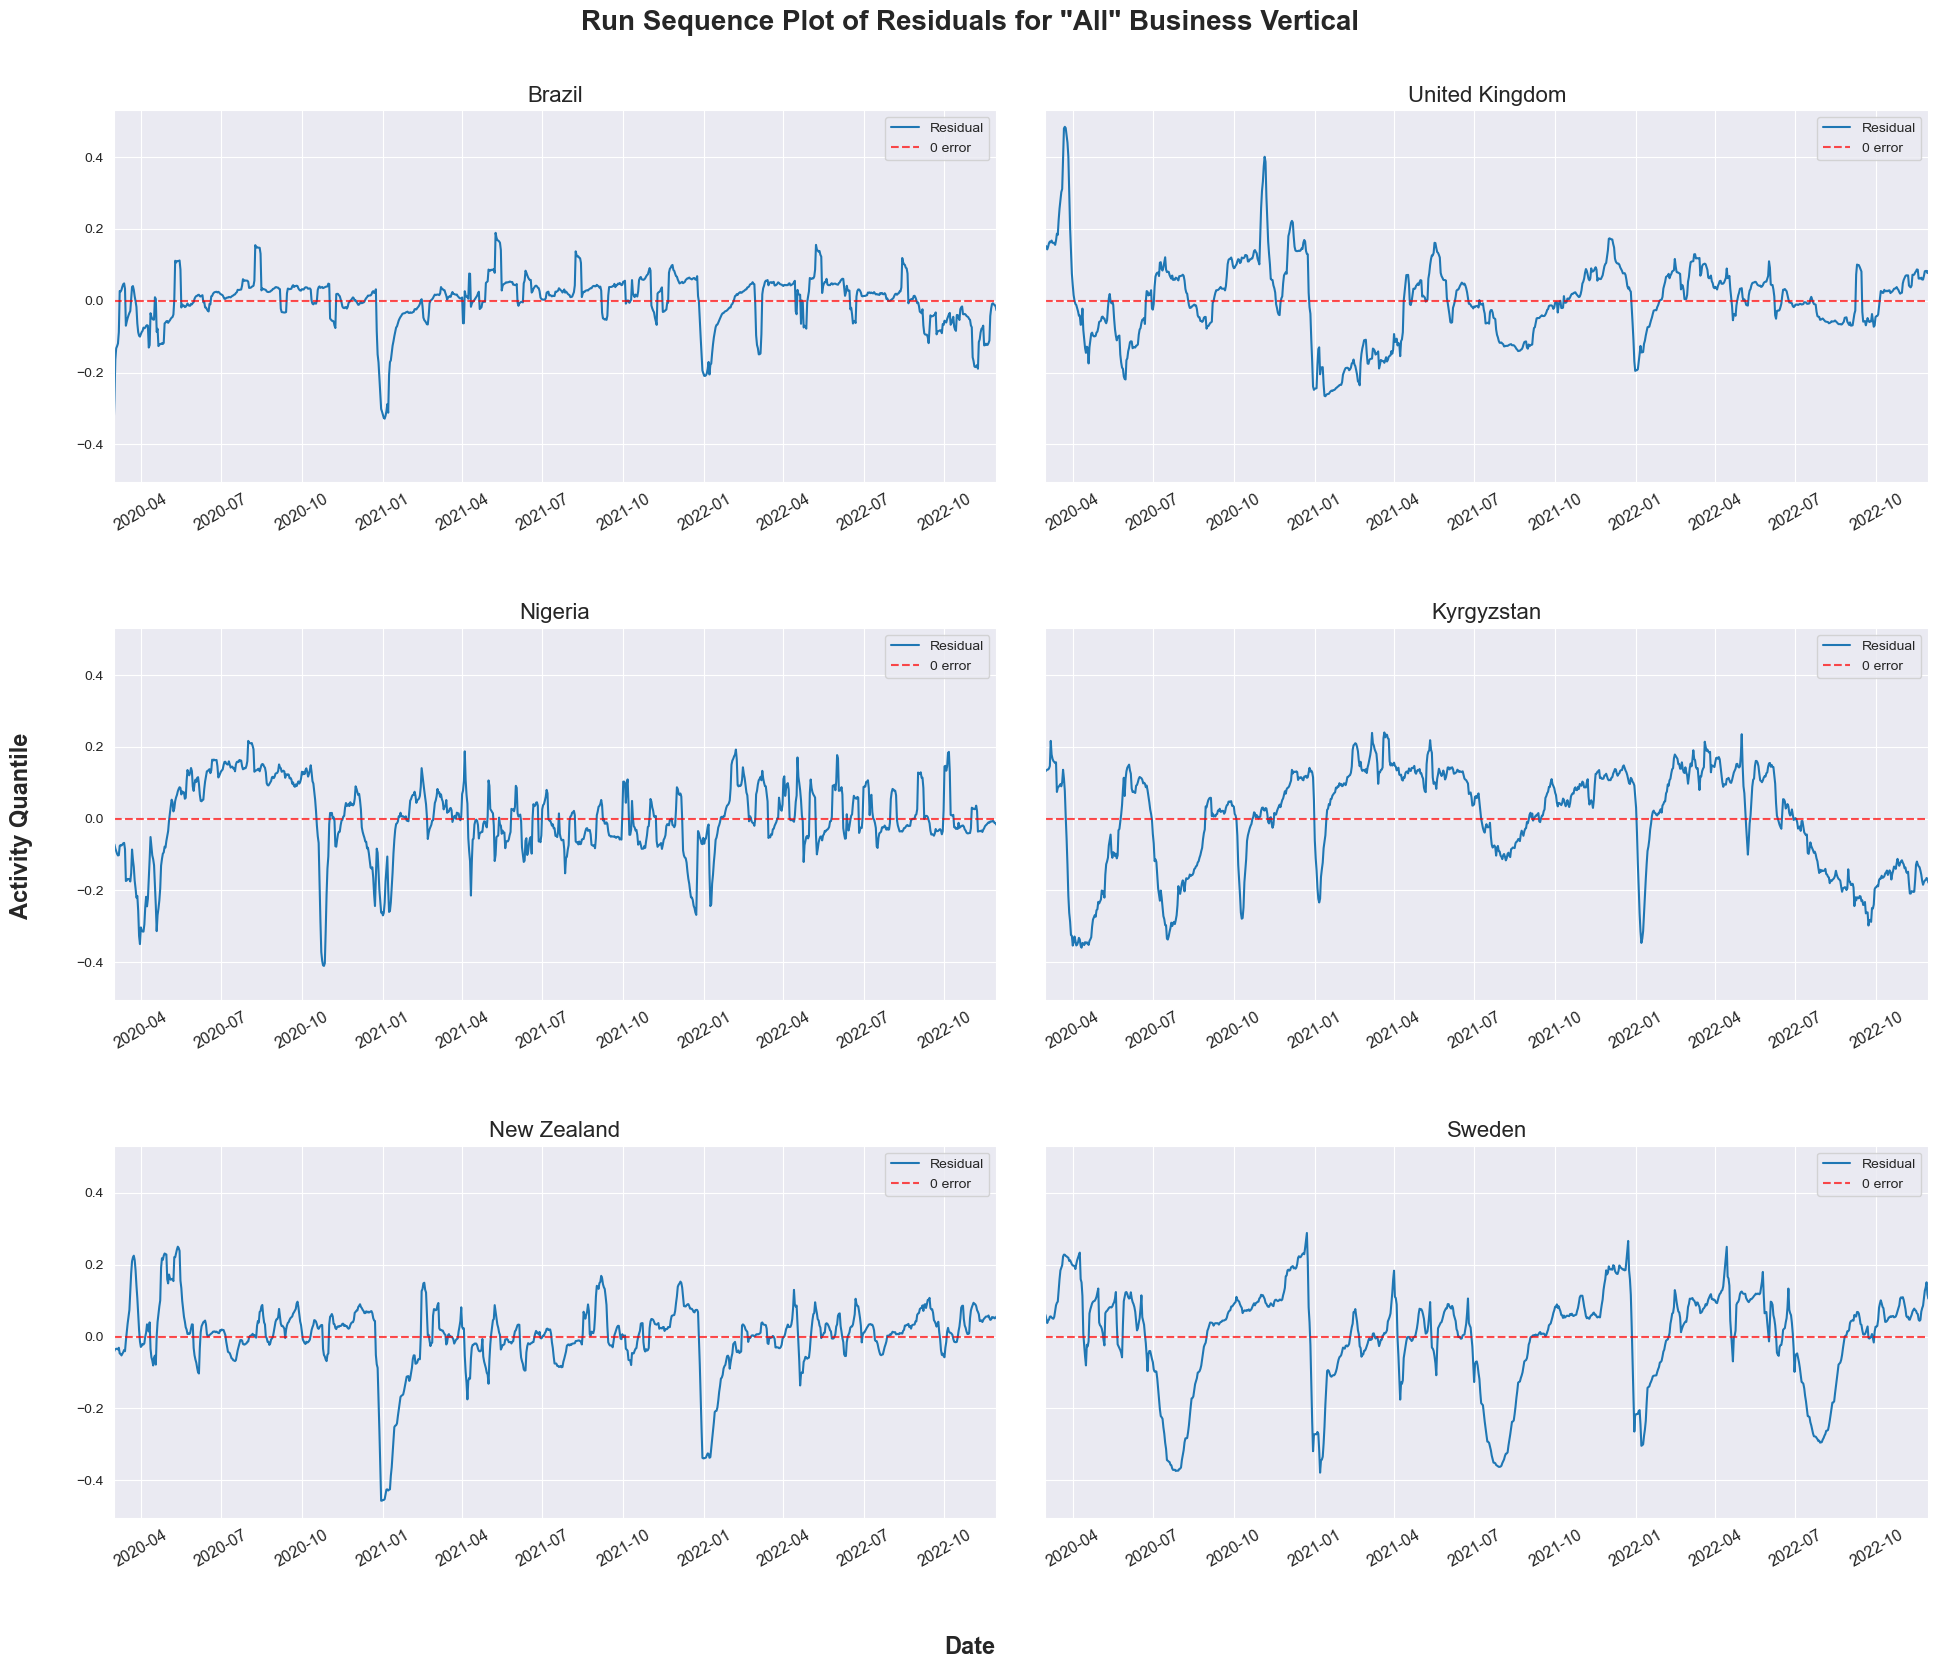

In [38]:
fig, axes = plt.subplots(3, 2, sharex=False, sharey=True, figsize=(20, 17))#, dpi=300)
dates = seasonality_analysis.query("gadm_name=='Brazil'").ds.values

# Use the axes for plotting
for i,j in enumerate(choice_countries):
      if i < 2:
            residual = residuals_df[j]
            g = sns.lineplot(x=dates, y=residual,
                             ax=axes[0,i], label='Residual')
            # basically use the axes[].plot(x,y,color=orange) to plot your trend line boss
            axes[0,i].axhline(y=0, color='red', linestyle='--', 
                              label='0 error', alpha=0.7)
            #g.legend(fontsize=7)
            g.legend()#, loc='upper right', fontsize=9)
            axes[0,i].tick_params(axis='x', rotation=30, labelsize=11.5)
            axes[0,i].set_xlim([dates.min(),dates.max()])
            axes[0,i].set_xlabel('')
            axes[0,i].set_ylabel('')
            axes[0,i].set_title(j, fontsize=16)
      elif i < 4:
            residual = residuals_df[j]
            g = sns.lineplot(x=dates, y=residual,
                             ax=axes[1,i-2], label='Residual')
            axes[1,i-2].axhline(y=0, color='red', linestyle='--', 
                                label='0 error', alpha=0.7)
            #g.legend(fontsize=7)
            #axes[0,0].set_yticks(ticks=np.arange(0,2,0.2))
            g.legend()#, loc='upper right', fontsize=9)
            axes[1,i-2].tick_params(axis='x', rotation=30, labelsize=11.5)
            axes[1,i-2].set_xlim([dates.min(),dates.max()])
            axes[1,i-2].set_xlabel('')
            axes[1,i-2].set_ylabel('')
            axes[1,i-2].set_title(j, fontsize=16)
      else:
            residual = residuals_df[j]
            g = sns.lineplot(x=dates, y=residual,
                             ax=axes[2,i-4], label='Residual')
            axes[2,i-4].axhline(y=0, color='red', linestyle='--', 
                              label='0 error', alpha=0.7)
            #g.legend(fontsize=7)
            g.legend()#, loc='upper right', fontsize=9)
            
            axes[2,i-4].set_xlim([dates.min(),dates.max()])
            axes[2,i-4].set_xlabel('')
            axes[2,i-4].set_ylabel('')
            axes[2,i-4].set_title(j, fontsize=16)        
            

fig.supxlabel('Date', fontsize=17, fontweight='bold')
fig.supylabel('Activity Quantile', fontsize=17, fontweight='bold')
fig.suptitle('Run Sequence Plot of Residuals for "All" Business Vertical', fontsize=20, fontweight='bold')
fig.tight_layout(pad=3, h_pad=5)

# save figure
plt.savefig('figures/q5.2_residuals_plot.png')
 
plt.show()

Visualizing the central trendency and dispersion of seasonal subseries for this time series data.

In [39]:
# add quarter, month_name, and day of the week name to df
residuals_df['quarter'] = residuals_df.date.dt.quarter.values
residuals_df['month'] = residuals_df.date.dt.month.values 
residuals_df['day_of_week'] = residuals_df.date.dt.day_of_week.values #0 is Monday, 6 is Sunday

# set index as DateTimeIndex
residuals_df.set_index('date', inplace=True)

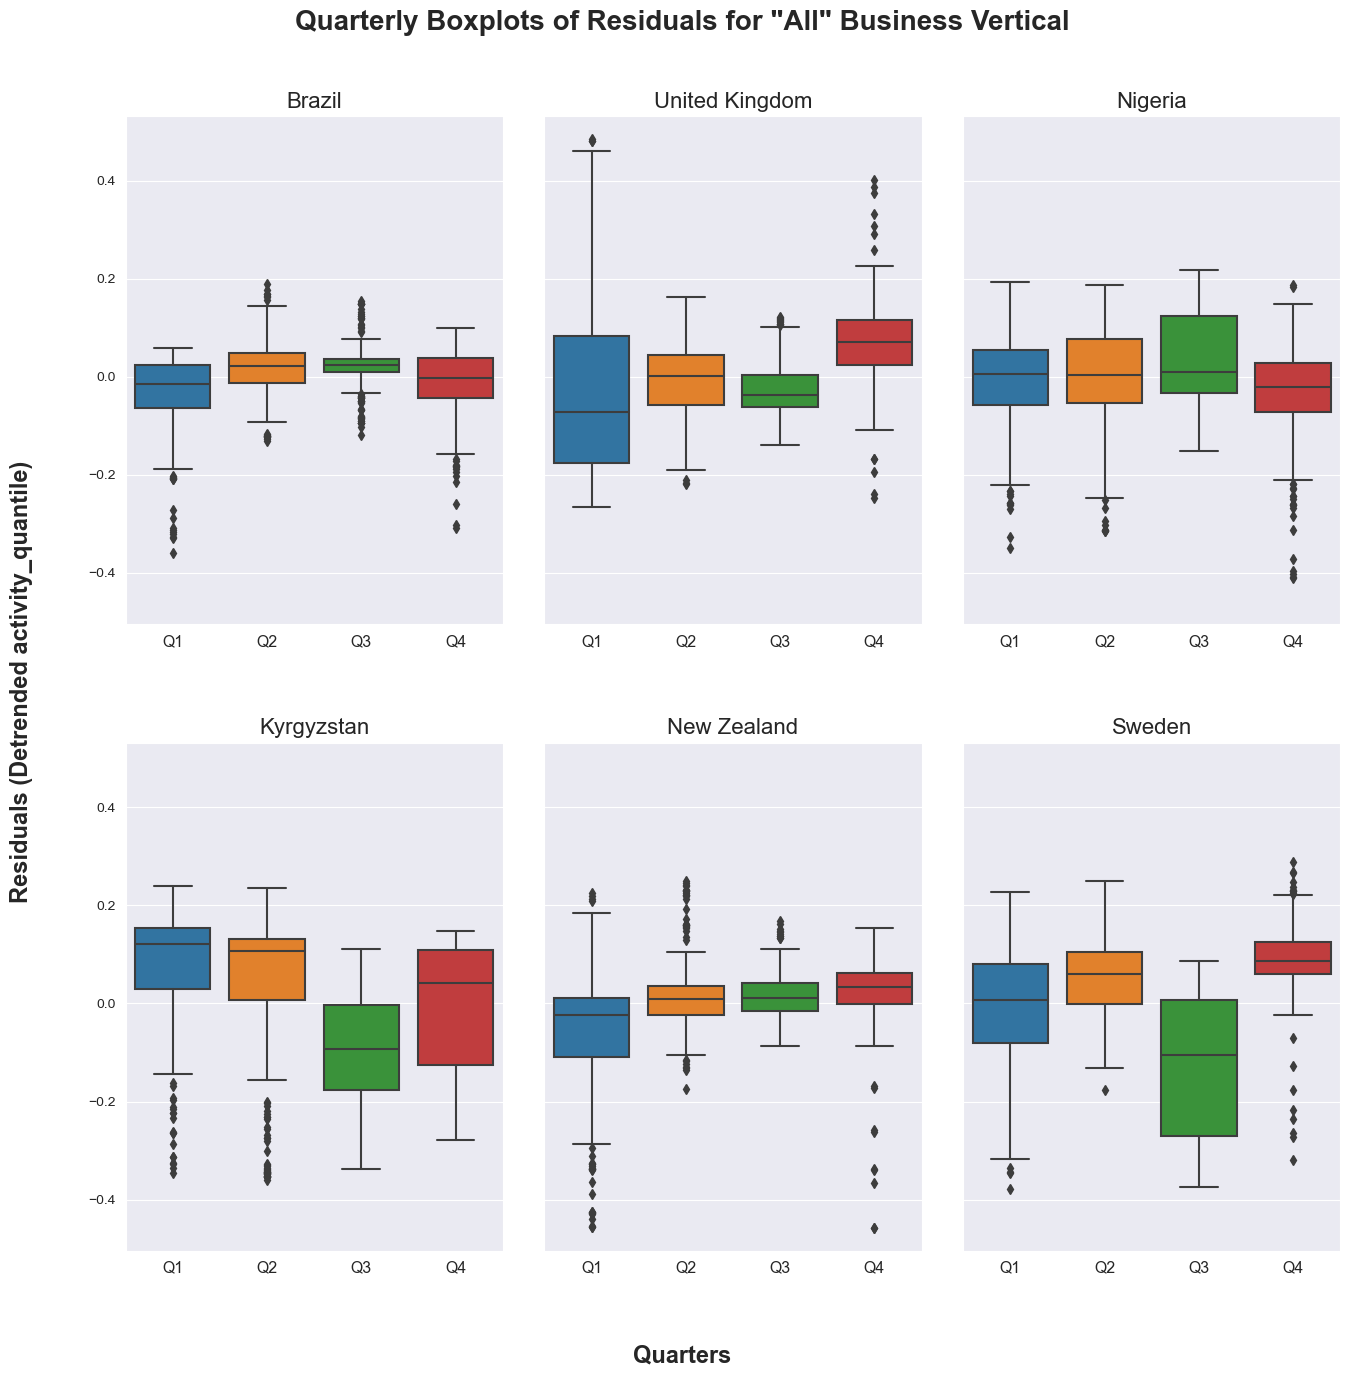

In [40]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(14, 14))

# Use the axes for plotting
for i, j in enumerate(choice_countries):
    if i < 3:
        g = sns.boxplot(data=residuals_df, y=j, x='quarter', palette='tab10', ax=axes[0, i])
        axes[0, i].set_xticks(ticks=[0, 1, 2, 3], labels=['Q1', 'Q2', 'Q3', 'Q4'])
        axes[0, i].tick_params(axis='x', labelsize=11.5)
        axes[0, i].set_xlabel('')
        axes[0, i].set_ylabel('')
        axes[0, i].set_title(j, fontsize=16)
    else:
        g = sns.boxplot(data=residuals_df, y=j, x='quarter', palette='tab10', ax=axes[1, i - 3])
        axes[1, i - 3].set_xticks(ticks=[0, 1, 2, 3], labels=['Q1', 'Q2', 'Q3', 'Q4'])
        axes[1, i - 3].tick_params(axis='x', labelsize=11.5)
        axes[1, i - 3].set_xlabel('')
        axes[1, i - 3].set_ylabel('')
        axes[1, i - 3].set_title(j, fontsize=16)

fig.supxlabel('Quarters', fontsize=17, fontweight='bold')
fig.supylabel('Residuals (Detrended activity_quantile)', fontsize=17, fontweight='bold')
fig.suptitle('Quarterly Boxplots of Residuals for "All" Business Vertical', fontsize=20, fontweight='bold')
fig.tight_layout(pad=3, h_pad=5)

# save figure
plt.savefig('figures/q5.3_quarterly_boxplot.png')

plt.show()


In general, on a quarterly basis, there is much of a pattern because our boxplots show a very high variation for each quarter with most having outliers. However, it is noticeable that for the first quarter, there is a lot of variation in the activity quantile especially in the United Kingdom. This data would need to be looked at on a monthly level to uncover any reoccuring patterns.

Monthly plots

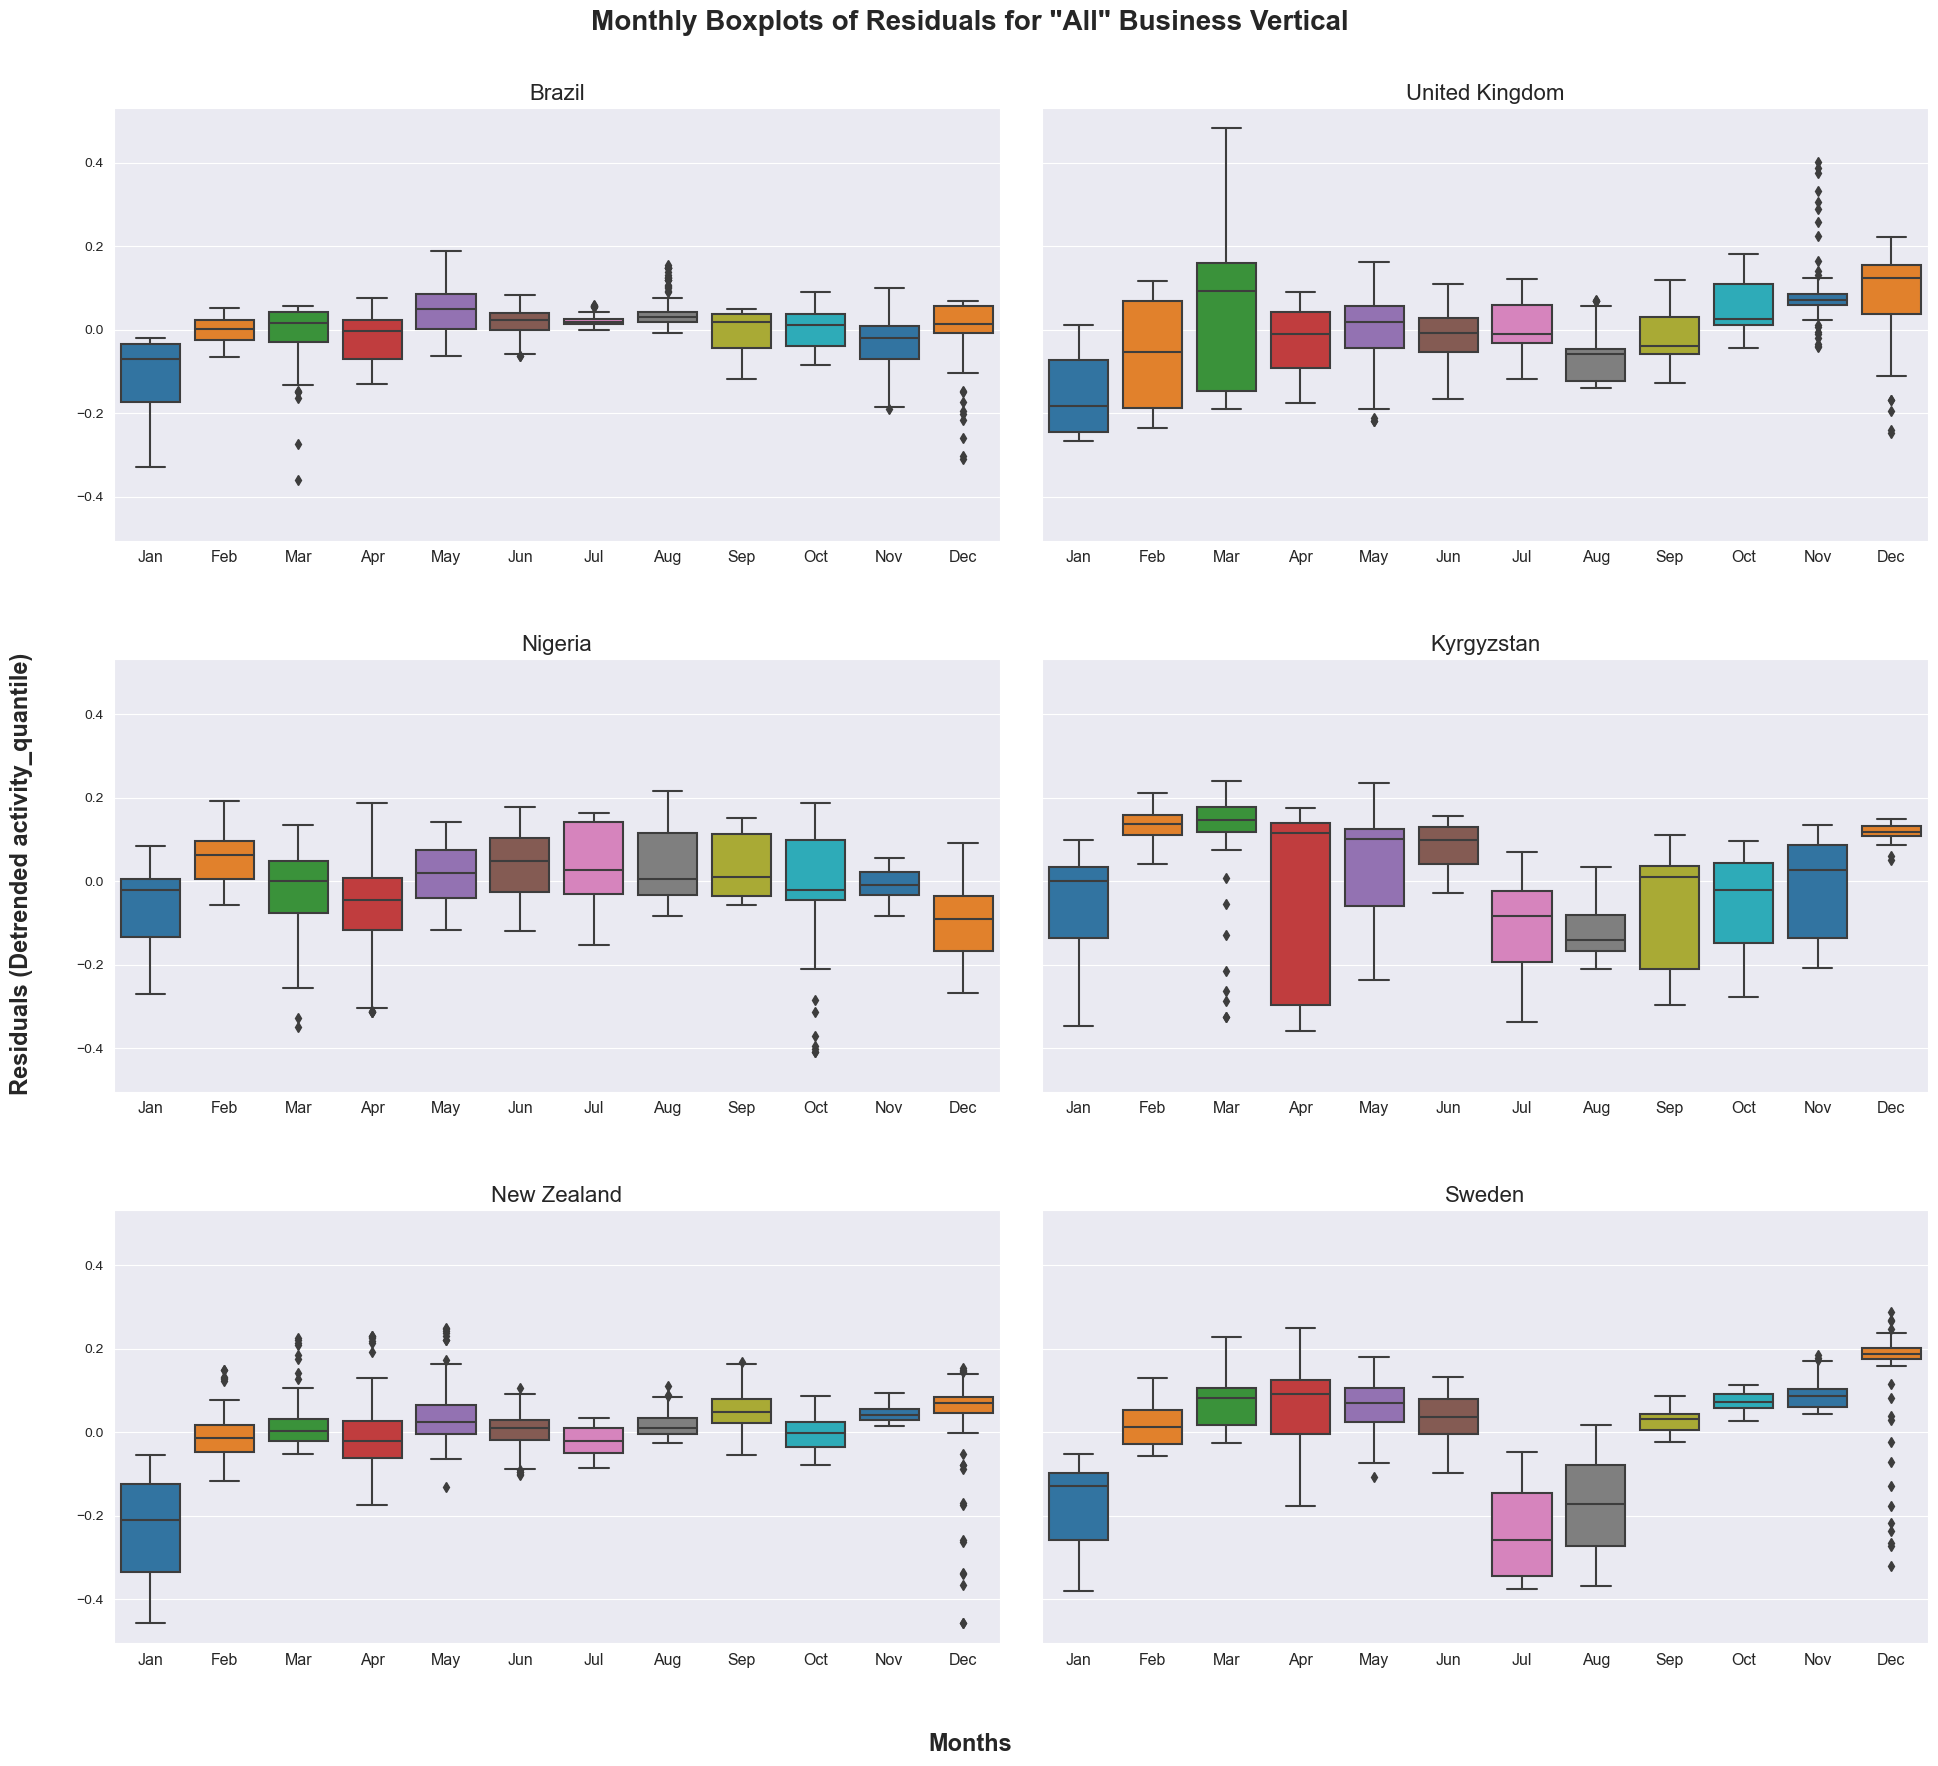

In [41]:
fig, axes = plt.subplots(3, 2, sharex=False, sharey=True, figsize=(20, 18))#, dpi=300)

# Use the axes for plotting
for i,j in enumerate(choice_countries):
      if i < 2:
            g = sns.boxplot(data=residuals_df, y=j, x='month', palette='tab10',
                            ax=axes[0,i])
            axes[0,i].set_xticks(ticks=np.concatenate([np.arange(2,12,1),[0,1]]), 
                                 labels=residuals_df.index.strftime('%b').unique())
            axes[0,i].tick_params(axis='x', labelsize=11.5)
            axes[0,i].set_xlabel('')
            axes[0,i].set_ylabel('')
            axes[0,i].set_title(j, fontsize=16)
      elif i < 4:
            g = sns.boxplot(data=residuals_df, y=j, x='month', palette='tab10',
                            ax=axes[1,i-2])
            axes[1,i-2].set_xticks(ticks=np.concatenate([np.arange(2,12,1),[0,1]]), 
                                   labels=residuals_df.index.strftime('%b').unique())
            axes[1,i-2].tick_params(axis='x', labelsize=11.5)
            axes[1,i-2].set_xlabel('')
            axes[1,i-2].set_ylabel('')
            axes[1,i-2].set_title(j, fontsize=16)
      else:
            g = sns.boxplot(data=residuals_df, y=j, x='month', palette='tab10',
                            ax=axes[2,i-4])
            axes[2,i-4].set_xticks(ticks=np.concatenate([np.arange(2,12,1),[0,1]]), 
                                   labels=residuals_df.index.strftime('%b').unique())
            axes[2,i-4].tick_params(axis='x', labelsize=11.5)
            axes[2,i-4].set_xlabel('')
            axes[2,i-4].set_ylabel('')
            axes[2,i-4].set_title(j, fontsize=16)       
            

fig.supxlabel('Months', fontsize=17, fontweight='bold')
fig.supylabel('Residuals (Detrended activity_quantile)', fontsize=17, fontweight='bold')
fig.suptitle('Monthly Boxplots of Residuals for "All" Business Vertical', fontsize=20, fontweight='bold')
fig.tight_layout(pad=3, h_pad=5)

# save figure
plt.savefig('figures/q5.4_monthly_boxplot.png')
 
plt.show()

A monthly grouping of the residuals, we can see lesser variance in some of the boxplots. For Brazil, the towards the end of the year and the first month of the following year, tends to be more variable as more fluctations in residuals were recorded there. The middle of the year, especially the summer months, June to August have fewer fluctations with a median at 0 with August have some days were it performed better than predicted. For the United Kingdom, it can straightaway be noticed that the month of March was highly volatile. We can also notice a slight increase in residuals, starting of low with a median of close to -0.2 in January, slowly increase, even though still variable till July where it experienced a drop in quality in August and then picking up gradually and have a median around 0.1 in December, although November displayed a lot of outliers much higher, before it experiences a huge drop in January. 

The plot for Nigeria has a lot of variance although the medians for each month reside around 0 but the range of fluctations in November was low with no outliers. For Kyrgyzstan it also appears to be highly variable with the month of April having the highest variance. However, the months of February and December seems interesting as it has low variance and mean above 0. The month of March although having less variance its boxplot, it still has a lot of outliers extending up until around -0.3. 

New Zealand seems a lot interesting as most of the months, except for January, displayed less variance in the residuals. We can see it rising from a low point of median -0.2 in January to values which center around 0  throughout the year before it reachs November which is a highly volatile month with a lot of outliers below 0, extending up until -0.4. It then experienced a huge drop in January. For Sweden, The first 6 months of the show and increase in resuals from a low median of around -0.1 in January to a bit above 0 in June before falling in July to a value of around -0.3. Slowly rising in August, the next 3 months have a low variance with residuals around 0.1. It reached a high median 0.2 in November although that month was highly volatile before drastically dropping the flowing year. 

From the plots, we can the last quarter, although high, tends to be more volatile before experiencing a drastic drop the following year in January. 


Daily plots

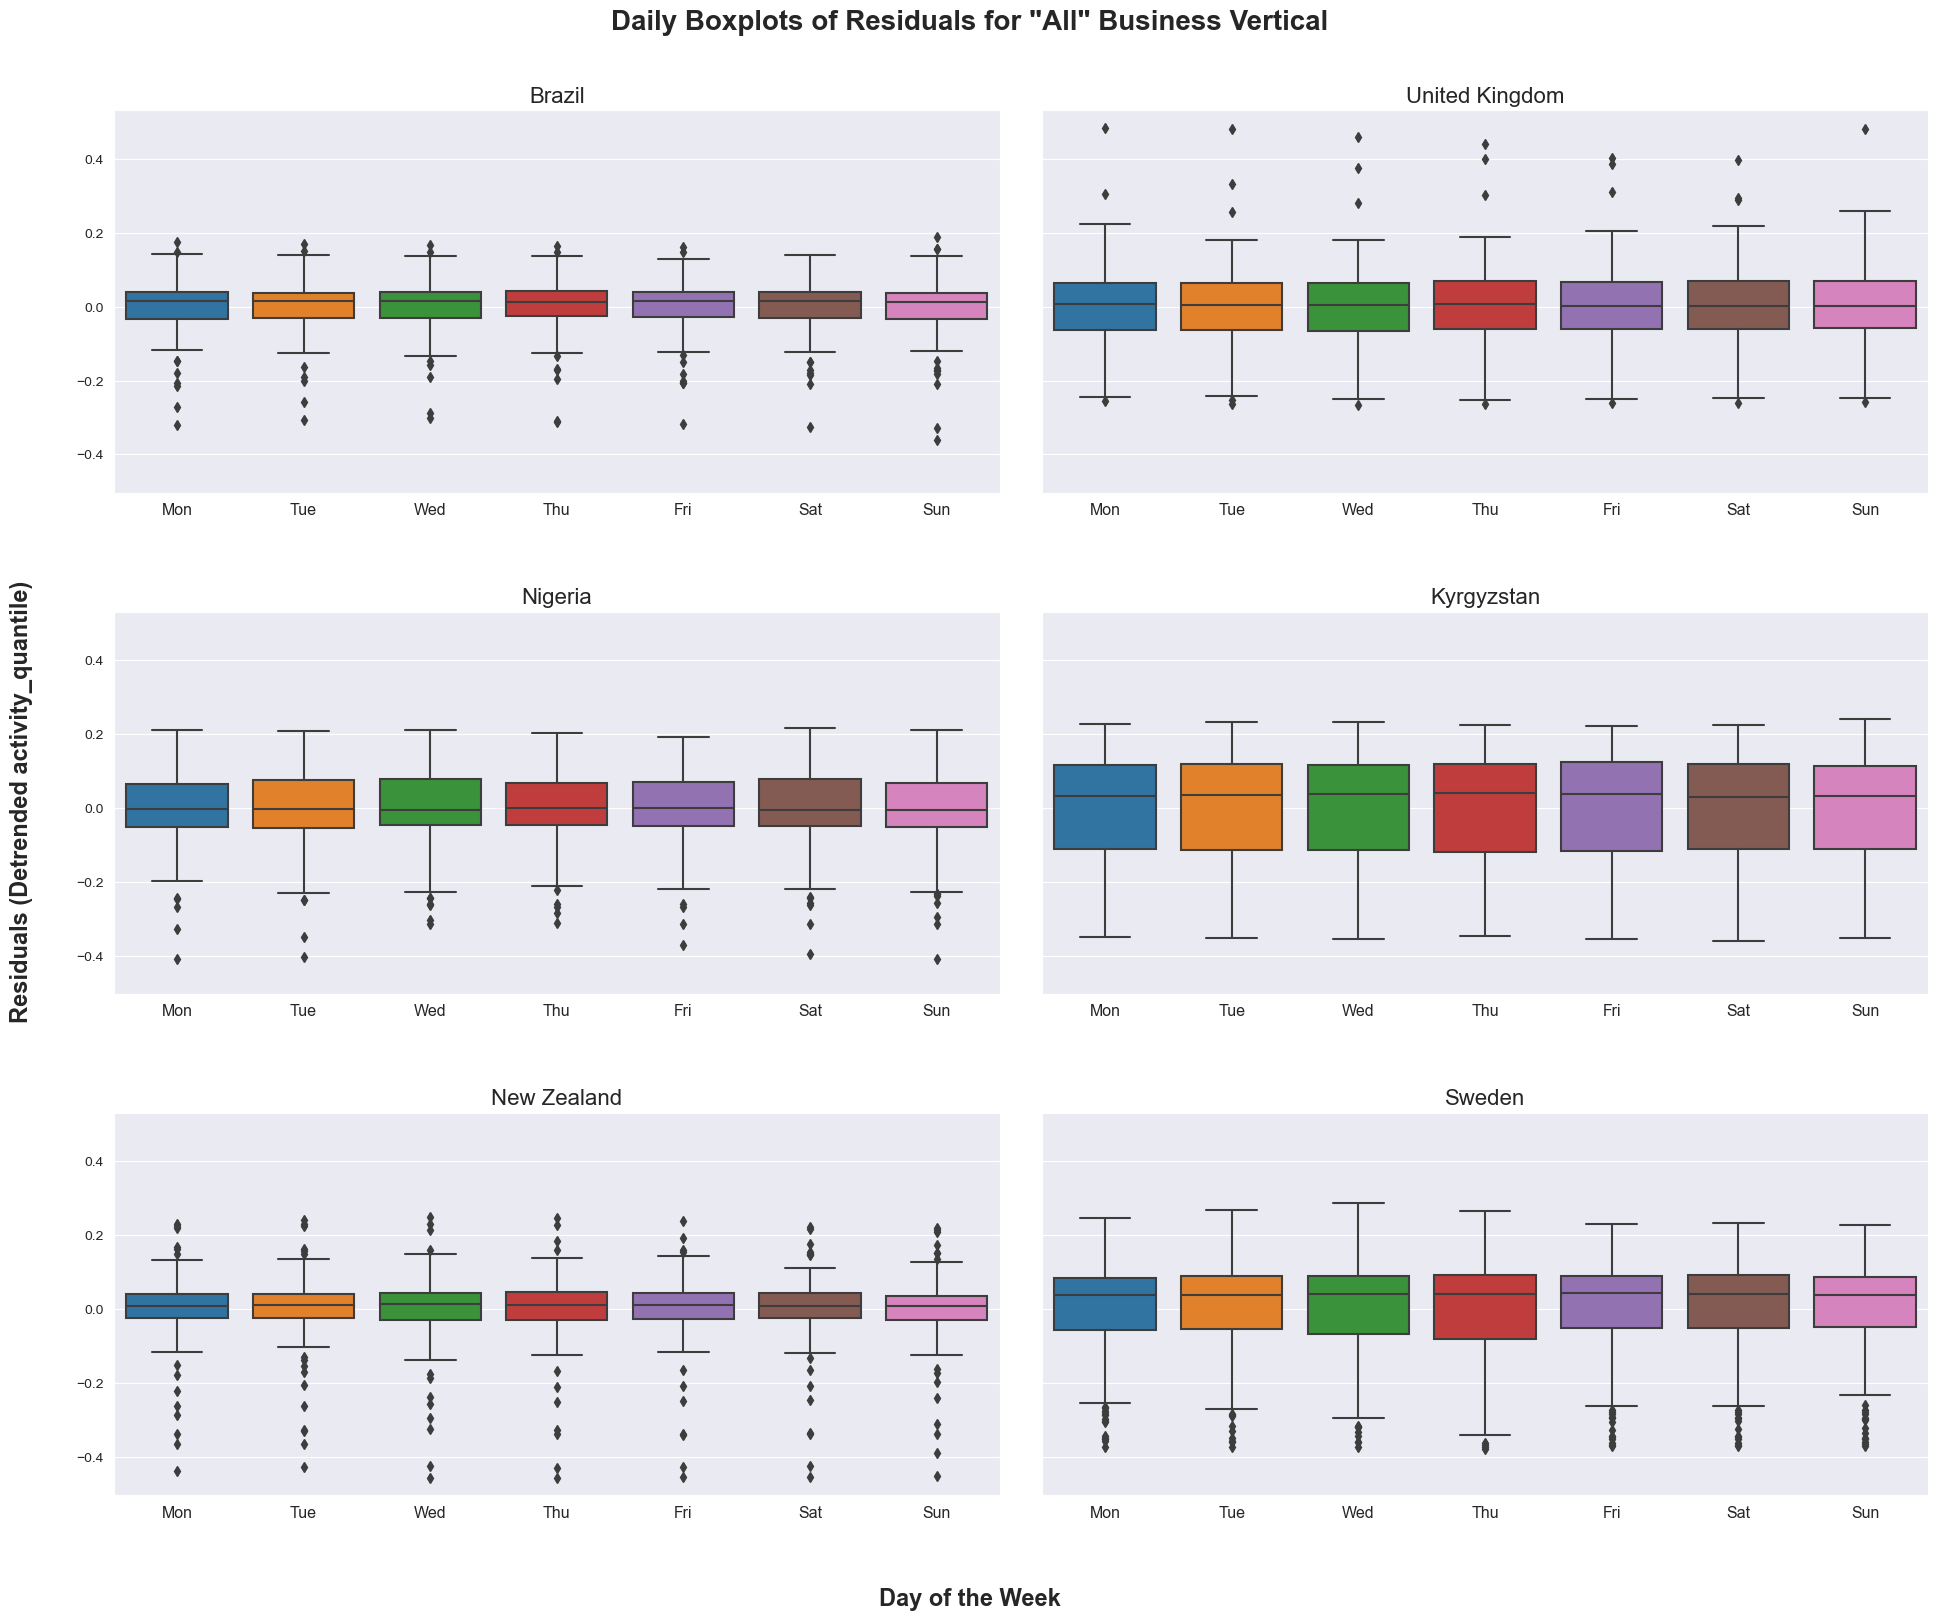

In [42]:
fig, axes = plt.subplots(3, 2, sharex=False, sharey=True, figsize=(20, 16.5))#, dpi=300)

# Use the axes for plotting
for i,j in enumerate(choice_countries):
      if i < 2:
            g = sns.boxplot(data=residuals_df, y=j, x='day_of_week', palette='tab10',
                            ax=axes[0,i])
            axes[0,i].set_xticks(ticks=np.concatenate([[6],np.arange(0,6,1)]), 
                                 labels=residuals_df.index.strftime('%a').unique())
            axes[0,i].tick_params(axis='x', labelsize=11.5)
            axes[0,i].set_xlabel('')
            axes[0,i].set_ylabel('')
            axes[0,i].set_title(j, fontsize=16)
      elif i < 4:
            g = sns.boxplot(data=residuals_df, y=j, x='day_of_week', palette='tab10',
                            ax=axes[1,i-2])
            axes[1,i-2].set_xticks(ticks=np.concatenate([[6],np.arange(0,6,1)]), 
                                 labels=residuals_df.index.strftime('%a').unique())
            axes[1,i-2].tick_params(axis='x', labelsize=11.5)
            axes[1,i-2].set_xlabel('')
            axes[1,i-2].set_ylabel('')
            axes[1,i-2].set_title(j, fontsize=16)
      else:
            g = sns.boxplot(data=residuals_df, y=j, x='day_of_week', palette='tab10',
                            ax=axes[2,i-4])
            axes[2,i-4].set_xticks(ticks=np.concatenate([[6],np.arange(0,6,1)]), 
                                 labels=residuals_df.index.strftime('%a').unique())
            axes[2,i-4].tick_params(axis='x', labelsize=11.5)
            axes[2,i-4].set_xlabel('')
            axes[2,i-4].set_ylabel('')
            axes[2,i-4].set_title(j, fontsize=16)       
            

fig.supxlabel('Day of the Week', fontsize=17, fontweight='bold')
fig.supylabel('Residuals (Detrended activity_quantile)', fontsize=17, fontweight='bold')
fig.suptitle('Daily Boxplots of Residuals for "All" Business Vertical', fontsize=20, fontweight='bold')
fig.tight_layout(pad=3, h_pad=5)

# save figure
plt.savefig('figures/q5.5_daily_boxplot.png')
 
plt.show()

#### <span style="color:orange">Q6: Please choose two days and visualise different countries/states (depending on the gadm_level of the dataset) with the business level (preferably using colormaps), in those two days. Please refer to https://gadm.org/ for more information.</span>

Let's see which dates would be of interest to us.

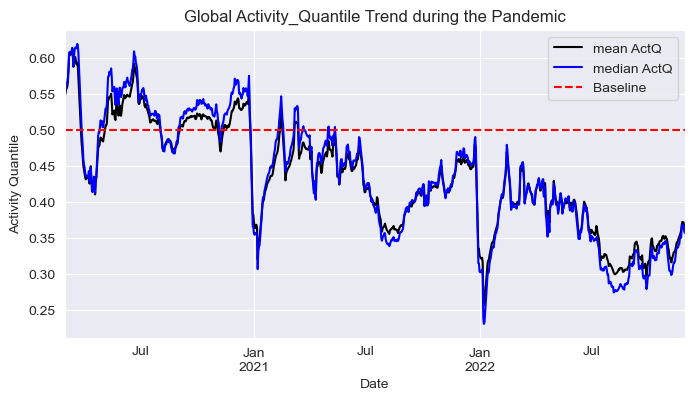

In [63]:
plt.figure(figsize=(8,4))
df.groupby('ds')['activity_quantile'].mean().plot(color='black',label='mean ActQ')
df.groupby('ds')['activity_quantile'].median().plot(color='blue',label='median ActQ')
plt.axhline(y=0.5,color='red', label='Baseline', linestyle='--')
plt.title('Global Activity_Quantile Trend during the Pandemic')
plt.legend()
plt.ylabel('Activity Quantile')
plt.xlabel('Date')

# save figure
#plt.savefig('figures/q6.1_global_actquant_trend.png')

plt.show()

As was noticed in the monthly box plots, there tends to always be a volatile peak around November-December before a drastic fall at the beginning of January the following year. For this analysis, we would look at the change in business levels for all countries from the peak in November 2021 to the valley in January 2022.

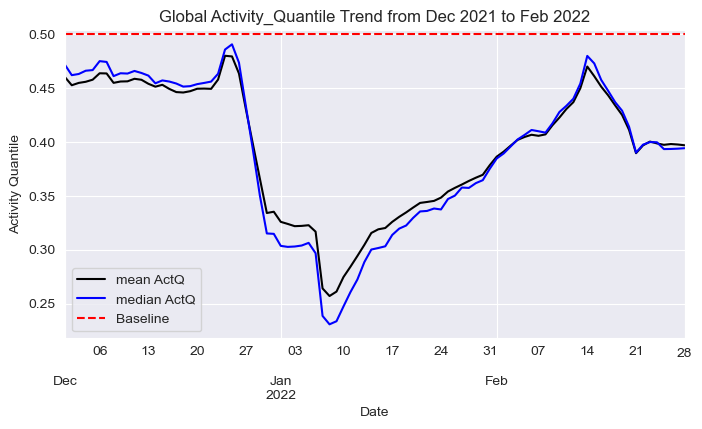

In [64]:
plt.figure(figsize=(8,4))
df.groupby('ds')['activity_quantile'].mean().loc['December 2021':'February 2022'].plot(color='black',label='mean ActQ')
df.groupby('ds')['activity_quantile'].median().loc['December 2021':'February 2022'].plot(color='blue',label='median ActQ')
plt.axhline(y=0.5,color='red', label='Baseline', linestyle='--')
plt.title('Global Activity_Quantile Trend from Dec 2021 to Feb 2022')
plt.legend()
plt.ylabel('Activity Quantile')
plt.xlabel('Date')

# save figure
#plt.savefig('figures/q6.2_Dec_to_Feb_global_actquant_trend.png')

plt.show()

Join the plots into one.

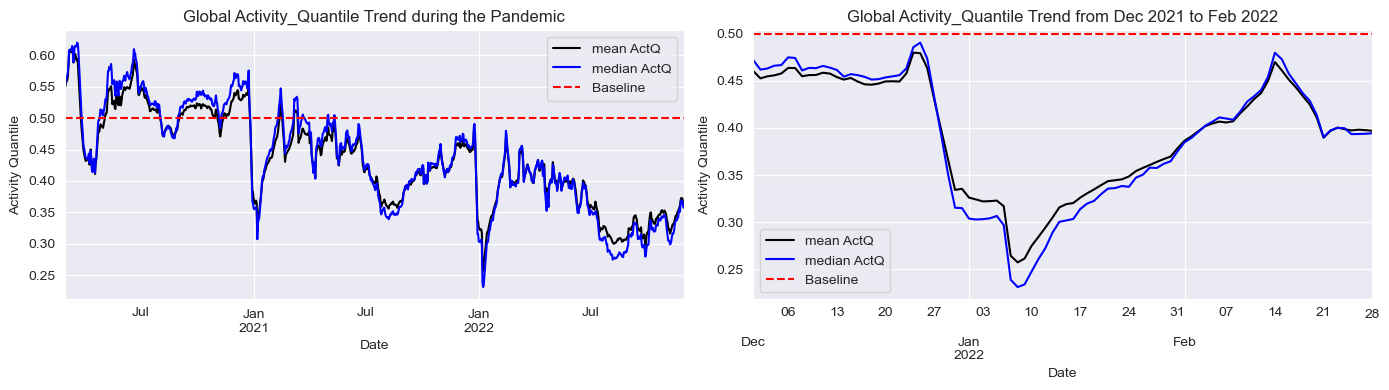

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # 1 row, 2 columns

# Plotting first subplot
df.groupby('ds')['activity_quantile'].mean().plot(color='black', label='mean ActQ', ax=axes[0])
df.groupby('ds')['activity_quantile'].median().plot(color='blue', label='median ActQ', ax=axes[0])
axes[0].axhline(y=0.5, color='red', label='Baseline', linestyle='--')
axes[0].set_title('Global Activity_Quantile Trend during the Pandemic')
axes[0].legend()
axes[0].set_ylabel('Activity Quantile')
axes[0].set_xlabel('Date')

# Plotting second subplot
df.groupby('ds')['activity_quantile'].mean().loc['December 2021':'February 2022'].plot(color='black', label='mean ActQ', ax=axes[1])
df.groupby('ds')['activity_quantile'].median().loc['December 2021':'February 2022'].plot(color='blue', label='median ActQ', ax=axes[1])
axes[1].axhline(y=0.5, color='red', label='Baseline', linestyle='--')
axes[1].set_title('Global Activity_Quantile Trend from Dec 2021 to Feb 2022')
axes[1].legend()
axes[1].set_ylabel('Activity Quantile')
axes[1].set_xlabel('Date')

plt.tight_layout()

# save figure
plt.savefig('figures/q6.1_global_actquant_trend.png')

plt.show()


In [55]:
df.groupby('ds')['activity_quantile'].mean().loc['December 2021':'February 2022'].argmax()

23

In [59]:
df.groupby('ds')[['activity_quantile']].mean().loc['December 2021':'February 2022'].iloc[23,:]

activity_quantile    0.480061
Name: 2021-12-24 00:00:00, dtype: float64

In [60]:
df.groupby('ds')['activity_quantile'].mean().loc['December 2021':'February 2022'].argmin()

38

In [61]:
df.groupby('ds')[['activity_quantile']].mean().loc['December 2021':'February 2022'].iloc[38,:]

activity_quantile    0.257181
Name: 2022-01-08 00:00:00, dtype: float64

Our dates of interest are 2021-12-24 (just before Christmas) and 2022-01-08 (a week after New Year's day).

In [74]:
df.set_index('ds', inplace=True)

In [75]:
# creating subset
gadmPlotData_firstday = df.loc['2021-12-24']
gadmPlotData_secondday = df.loc['2022-01-08']

In [76]:
# Load the geographical data for countries/states (gadm_level dependent)
url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/" \
     "download/110m/cultural/ne_110m_admin_0_countries.zip"
    
with fsspec.open(f"simplecache::{url}") as file:
    world = gpd.read_file(file)

In [105]:
sns.set_style("white")

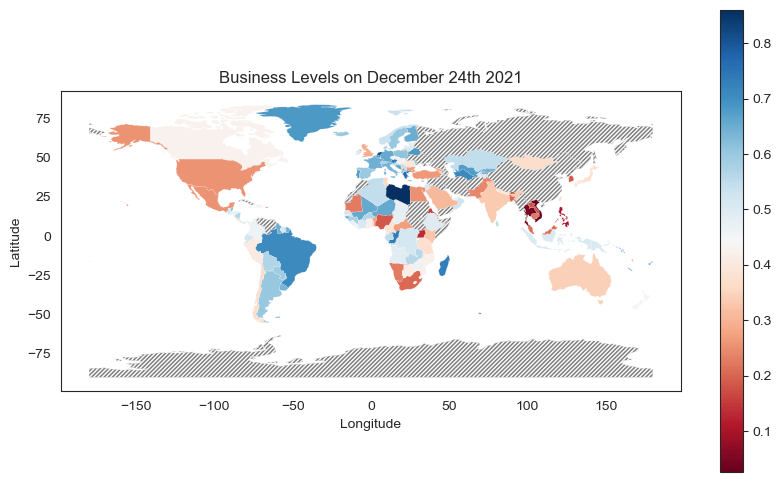

In [112]:
# Merge your dataset with the geographical data
merged_data = world.merge(gadmPlotData_firstday.query("business_vertical == 'All'").reset_index(), 
                          how='left', left_on='ADM0_A3', right_on='gadm_id')


# Create a new column to identify missing data
merged_data['missing_data'] = merged_data['activity_quantile'].isnull()

# Plot the map with cross-hatching for missing data
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='activity_quantile', ax=ax, legend=True, cmap='RdBu', linewidth=0.1, 
                 edgecolor=None, missing_kwds={'color': 'grey', 'hatch': '////////'})

plt.title('Business Levels on December 24th 2021 for All Business Verticals')  # Set title
plt.xlabel('Longitude')  # Add X-axis label if needed
plt.ylabel('Latitude')  # Add Y-axis label if needed
plt.show()

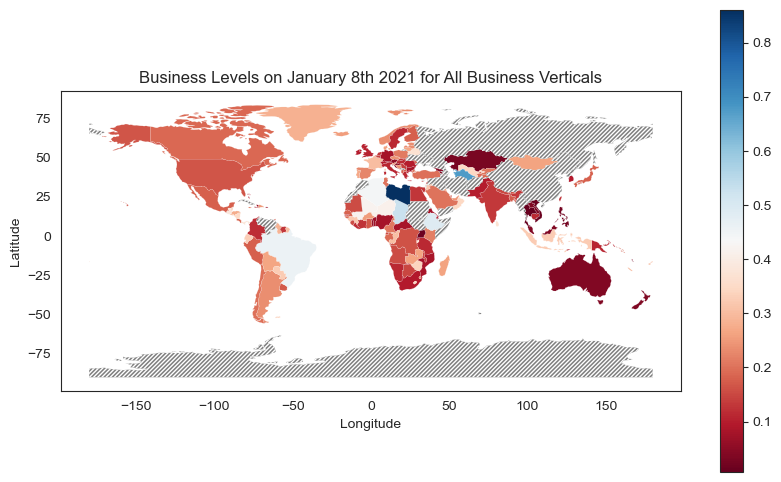

In [118]:
# Merge your dataset with the geographical data
merged_data = world.merge(gadmPlotData_secondday.query("business_vertical == 'All'").reset_index(), 
                          how='left', left_on='ADM0_A3', right_on='gadm_id')


# Create a new column to identify missing data
merged_data['missing_data'] = merged_data['activity_quantile'].isnull()

# Plot the map with cross-hatching for missing data
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='activity_quantile', ax=ax, legend=True, cmap='RdBu', linewidth=0.1, 
                 edgecolor=None, missing_kwds={'color': 'grey', 'hatch': '////////'})

plt.title('Business Levels on January 8th 2021 for All Business Verticals')  # Set title
plt.xlabel('Longitude')  # Add X-axis label if needed
plt.ylabel('Latitude')  # Add Y-axis label if needed
plt.show()

In [120]:
np.sort(choice_busvert)

array(['All', 'Grocery & Convenience Stores', 'Restaurants'], dtype='<U28')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_25852\3729213537.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1)


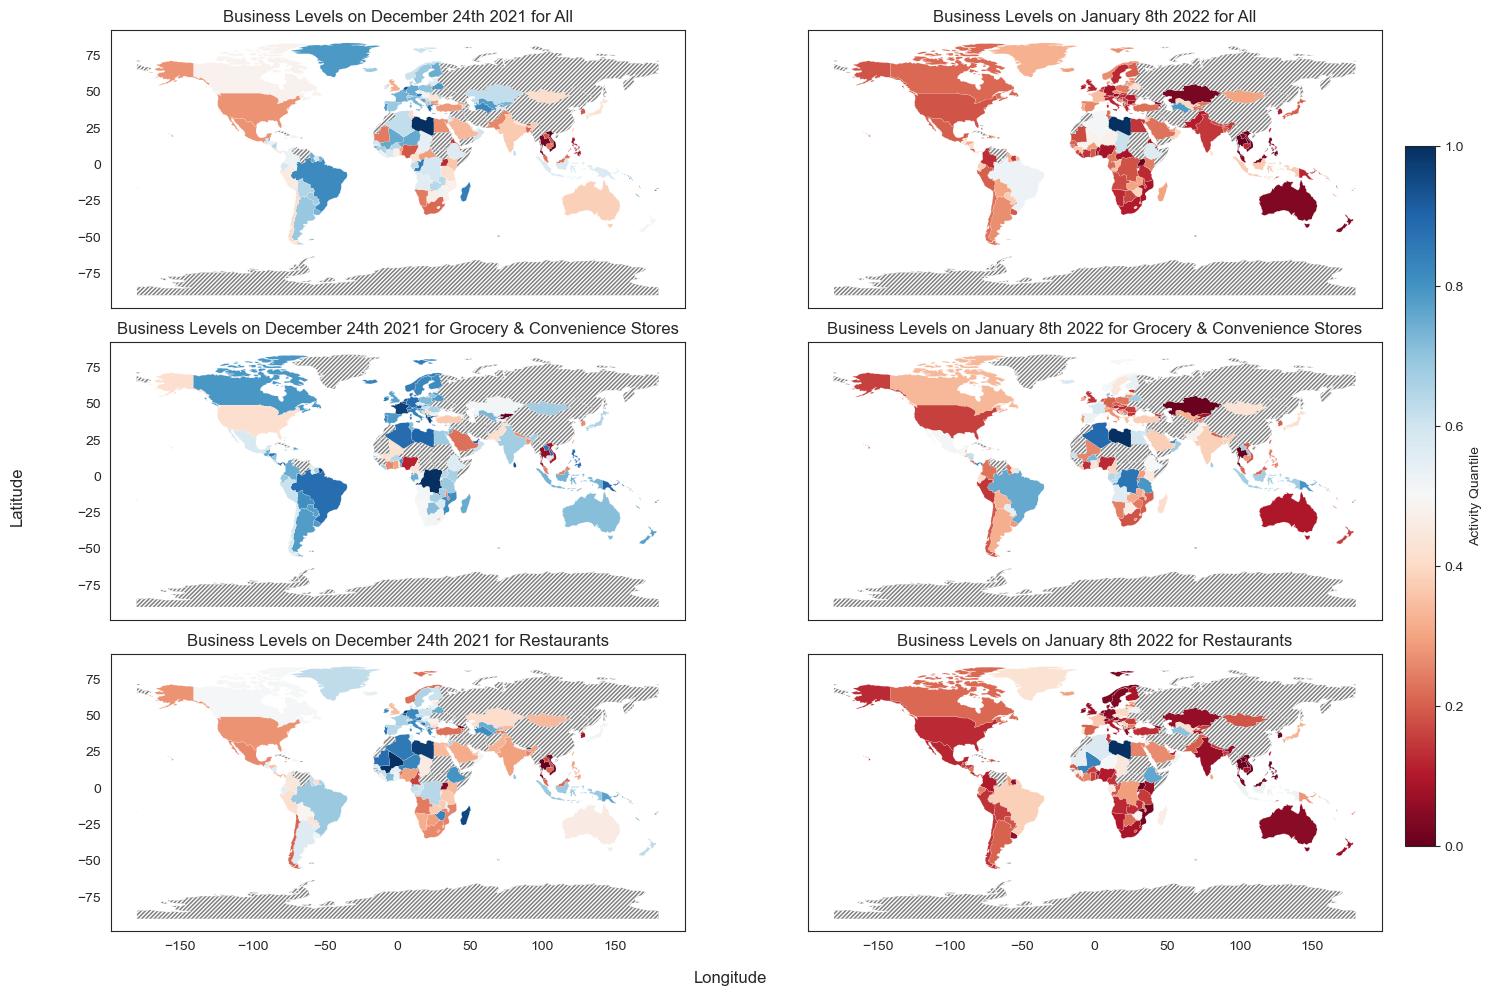

In [143]:
# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10), sharex=True, sharey=True)

# Loop through each business vertical and plot maps in the subplots
for i, business_vertical in enumerate(np.sort(choice_busvert)):
    # Plot in the first column (for the first dataset)
    # Merging dataset with geographical data
    merged_data_first = world.merge(gadmPlotData_firstday.query(f"business_vertical == '{business_vertical}'").reset_index(), 
                                  how='left', left_on='ADM0_A3', right_on='gadm_id')
    # Create a new column to identify missing data
    merged_data_first['missing_data'] = merged_data_first['activity_quantile'].isnull()
    # Plot the map in the subplot
    merged_data_first.plot(column='activity_quantile', ax=axs[i, 0], cmap='RdBu', linewidth=0.1, 
                           edgecolor=None, missing_kwds={'color': 'grey', 'hatch': '////////'})
    axs[i, 0].set_title(f'Business Levels on December 24th 2021 for {business_vertical}')  # Set title
    
    # Plot in the second column (for the second dataset)
    # Merging dataset with geographical data
    merged_data_second = world.merge(gadmPlotData_secondday.query(f"business_vertical == '{business_vertical}'").reset_index(), 
                                   how='left', left_on='ADM0_A3', right_on='gadm_id')
    # Create a new column to identify missing data
    merged_data_second['missing_data'] = merged_data_second['activity_quantile'].isnull()
    # Plot the map in the subplot
    merged_data_second.plot(column='activity_quantile', ax=axs[i, 1], cmap='RdBu', linewidth=0.1, 
                            edgecolor=None, missing_kwds={'color': 'grey', 'hatch': '////////'})
    axs[i, 1].set_title(f'Business Levels on January 8th 2022 for {business_vertical}')  # Set title

# Add a single colorbar for all subplots
cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])  # Define colorbar position
sm = plt.cm.ScalarMappable(cmap='RdBu')
sm.set_array([])
plt.colorbar(sm, cax=cax, label='Activity Quantile')

fig.supxlabel('Longitude')
fig.supylabel('Latitude')
fig.tight_layout(pad=1)

# save figure
plt.savefig('figures/q6.2_gadm_plot.png')

plt.show()


#### <span style="color:orange">Q7: Identify changes. Choose 5-6 different countries (please consider the geo-location, the size of the country, the average income, etc. to make your choices as representative as you can - we want to understand the crisis globally). Identify the obvious changes in the business trends across different types of business. You could work in more countries if you want to!</span>

* Resample data (explain why) (by month and plot for each business vertical)
* Handle analysis country by country

I'll be performing moving statistics on the dataset to get the monthly moving average for every business vertical in our chosen countries.

In [238]:
sns.set_style("darkgrid")

In [202]:
choice_countries

['Brazil', 'United Kingdom', 'Nigeria', 'Kyrgyzstan', 'New Zealand', 'Sweden']

In [179]:
# get subset of data which includes all our select countries for ALL business verticals
df_countries_AllBusVert = df.query("gadm_name in @choice_countries").copy()
df_countries_AllBusVert.reset_index(inplace=True) 

Let's test to see if a 7-day average will smoothen the data whilst still retaining relevant information.

In [186]:
a = df_countries_AllBusVert.query('(gadm_name=="Brazil") & (business_vertical=="All")').index

In [ ]:
df_countries_AllBusVert.iloc[a,:].reindex('ds')['activity_quantile'].rolling(30).mean()[::2]

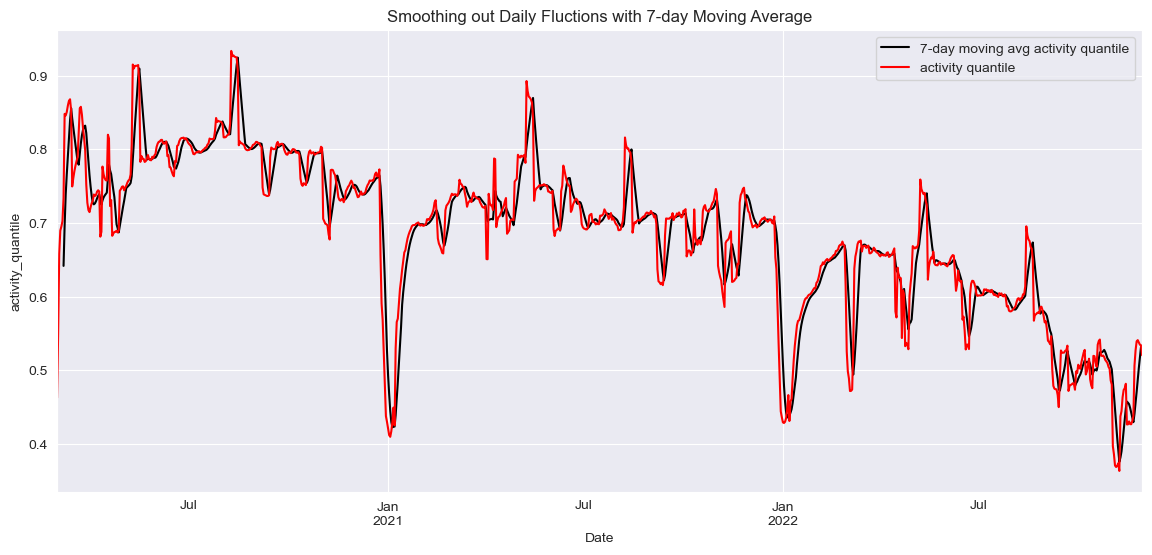

In [239]:
plt.figure(figsize=(14,6))
df_countries_AllBusVert.iloc[a,:].set_index("ds")['activity_quantile'].rolling(7).mean().plot(color='black', label="7-day moving avg activity quantile")
df_countries_AllBusVert.iloc[a,:].set_index("ds")['activity_quantile'].plot(color='red', label='activity quantile')
plt.legend()
plt.title('Smoothing out Daily Fluctions with 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('activity_quantile')

# save figure
plt.savefig('figures/q7.1_smoothdailylfluc.png')

plt.show()

Time to make our plots for each country

In [241]:
np.sort(df.business_vertical.unique())

array(['All', 'Business & Utility Services',
       'Grocery & Convenience Stores', 'Home Services',
       'Lifestyle Services', 'Local Events', 'Manufacturing',
       'Professional Services', 'Public Good', 'Restaurants', 'Retail',
       'Travel'], dtype=object)

In [293]:
# dictionary for containing all the moving averages for each country
weekly_moving_avg_dict = {'Brazil':[], 'United Kingdom':[], 'Nigeria':[], 
                           'Kyrgyzstan':[], 'New Zealand':[], 'Sweden':[]}
business_vertical_order = ['All', 'Business & Utility Services',
                           'Grocery & Convenience Stores', 'Home Services',
                           'Lifestyle Services', 'Local Events', 'Manufacturing',
                           'Professional Services', 'Public Good', 'Restaurants', 'Retail',
                           'Travel']

# iterate through every country in our dictionary
for country in weekly_moving_avg_dict:
      # iterate through each business vertical
      for busn_vert in business_vertical_order:
            # index which gets this particular subset
            idx = df_countries_AllBusVert.query('(gadm_name==@country) & (business_vertical==@busn_vert)').index
            mov_avg = df_countries_AllBusVert.iloc[idx,:].set_index("ds")['activity_quantile'].rolling(7).mean()
            weekly_moving_avg_dict[country].append(mov_avg)

In [294]:
np.shape(weekly_moving_avg_dict['Brazil'])

(12, 1004)

Convert to pd.Dataframe

In [295]:
# Create an empty list to store the transformed data
transformed_data = []

for country, mov_avg_list in weekly_moving_avg_dict.items():
      for idx, busn_vert in enumerate(business_vertical_order):
            c=0
            for mov_avg in mov_avg_list[idx]:
                  data = {
                  'gadm_name': country,
                  'business_vertical': busn_vert,
                  'date': mov_avg_list[idx].index[c],
                  'weekly_moving_avg': mov_avg_list[idx].values[c]
                  }
                  transformed_data.append(data)
                  c+=1

# Convert the list of dictionaries into a DataFrame
transformed_df = pd.DataFrame(transformed_data)

# Set the index of the DataFrame to the 'Date' column
transformed_df.set_index('date', inplace=True)

In [296]:
transformed_df

gadm_name business_vertical  weekly_moving_avg
date                                                     
2020-03-01    Brazil               All                NaN
2020-03-02    Brazil               All                NaN
2020-03-03    Brazil               All                NaN
2020-03-04    Brazil               All                NaN
2020-03-05    Brazil               All                NaN
...              ...               ...                ...
2022-11-25    Sweden            Travel           0.233874
2022-11-26    Sweden            Travel           0.242749
2022-11-27    Sweden            Travel           0.252057
2022-11-28    Sweden            Travel           0.243996
2022-11-29    Sweden            Travel           0.233901

[72288 rows x 3 columns]

Confirm that the above dataframe captures the right data and make plots.

In [298]:
np.unique(df_countries_AllBusVert.query('(gadm_name=="Brazil") & (business_vertical=="All")')['activity_quantile'].rolling(7).mean().values - transformed_df.query('(gadm_name=="Brazil") & (business_vertical=="All")')['weekly_moving_avg'].values)

array([ 0., nan])

Plotting for the first all countries

In [299]:
choice_countries

['Brazil', 'United Kingdom', 'Nigeria', 'Kyrgyzstan', 'New Zealand', 'Sweden']

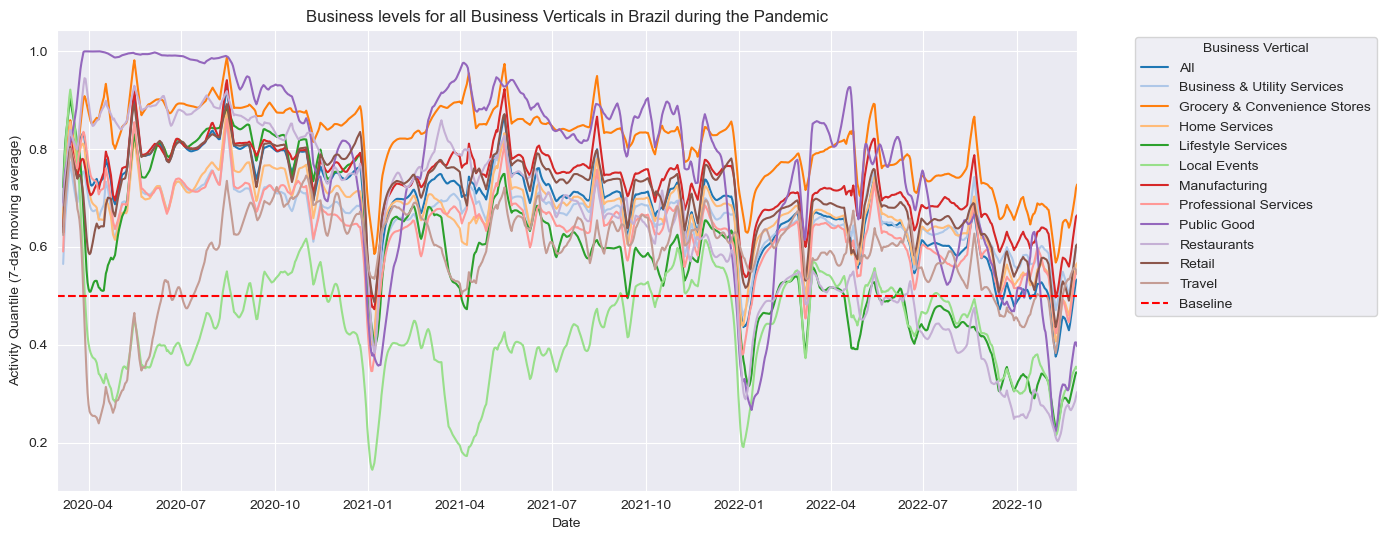

In [335]:
plt.figure(figsize=(14, 5.5))  # 1 row, 2 columns

# Plotting first subplot
sns.lineplot(data=transformed_df.query("gadm_name == 'Brazil'").reset_index(), 
             x='date', y='weekly_moving_avg', hue='business_vertical', 
             hue_order=business_vertical_order,
             palette='tab20')
plt.axhline(y=0.5, color='red', label='Baseline', linestyle='--')
plt.xlim([transformed_df.index.min(),transformed_df.index.max()])
plt.title('Business levels for all Business Verticals in Brazil during the Pandemic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Business Vertical")
plt.ylabel('Activity Quantile (7-day moving average)')
plt.xlabel('Date')

plt.tight_layout()

# save figure
plt.savefig('figures/q7.2_Brazil_comparison.png')

plt.show()


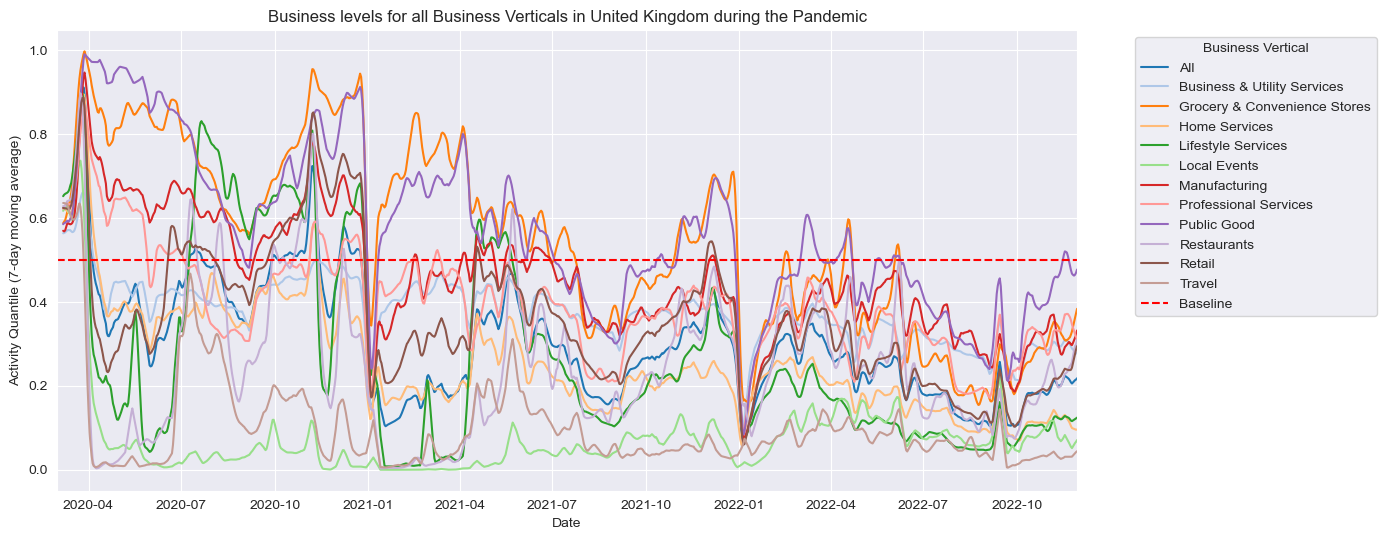

In [328]:
plt.figure(figsize=(14, 5.5))  # 1 row, 2 columns

# Plotting first subplot
sns.lineplot(data=transformed_df.query("gadm_name == 'United Kingdom'").reset_index(), 
             x='date', y='weekly_moving_avg', hue='business_vertical', 
             hue_order=business_vertical_order,
             palette='tab20')
plt.axhline(y=0.5, color='red', label='Baseline', linestyle='--')
plt.xlim([transformed_df.index.min(),transformed_df.index.max()])
plt.title('Business levels for all Business Verticals in United Kingdom during the Pandemic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Business Vertical")
plt.ylabel('Activity Quantile (7-day moving average)')
plt.xlabel('Date')

plt.tight_layout()

# save figure
plt.savefig('figures/q7.2_UK_comparison.png')

plt.show()


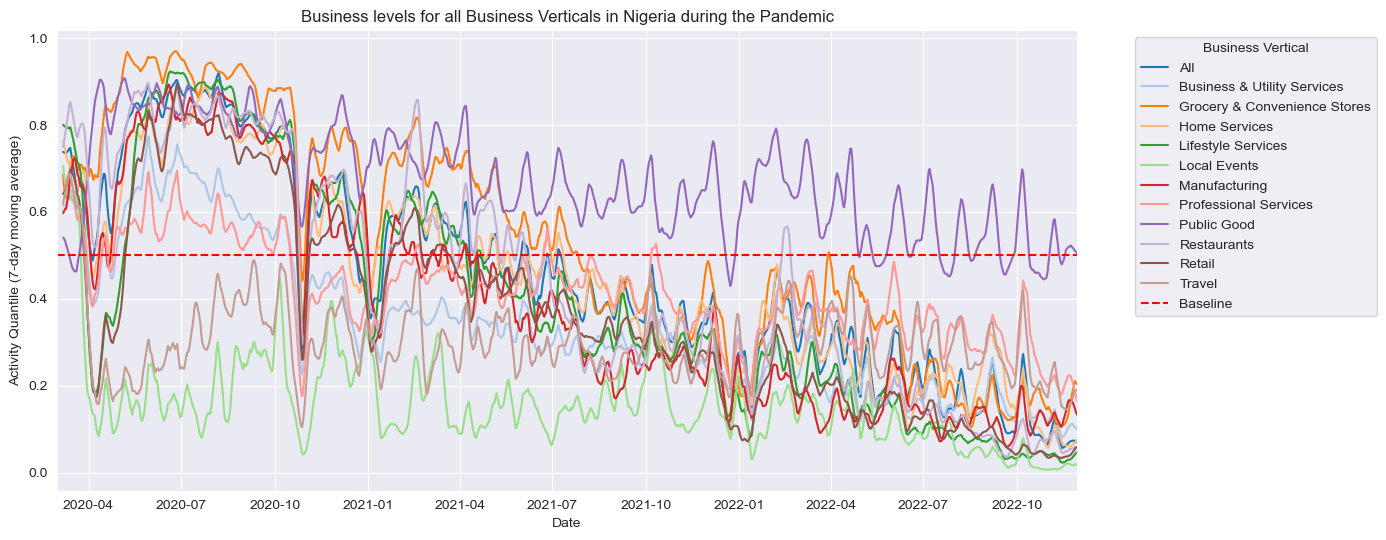

In [329]:
plt.figure(figsize=(14, 5.5))  # 1 row, 2 columns

# Plotting first subplot
sns.lineplot(data=transformed_df.query("gadm_name == 'Nigeria'").reset_index(), 
             x='date', y='weekly_moving_avg', hue='business_vertical', 
             hue_order=business_vertical_order,
             palette='tab20')
plt.axhline(y=0.5, color='red', label='Baseline', linestyle='--')
plt.xlim([transformed_df.index.min(),transformed_df.index.max()])
plt.title('Business levels for all Business Verticals in Nigeria during the Pandemic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Business Vertical")
plt.ylabel('Activity Quantile (7-day moving average)')
plt.xlabel('Date')

plt.tight_layout()

# save figure
plt.savefig('figures/q7.2_Nigeria_comparison.png')

plt.show()


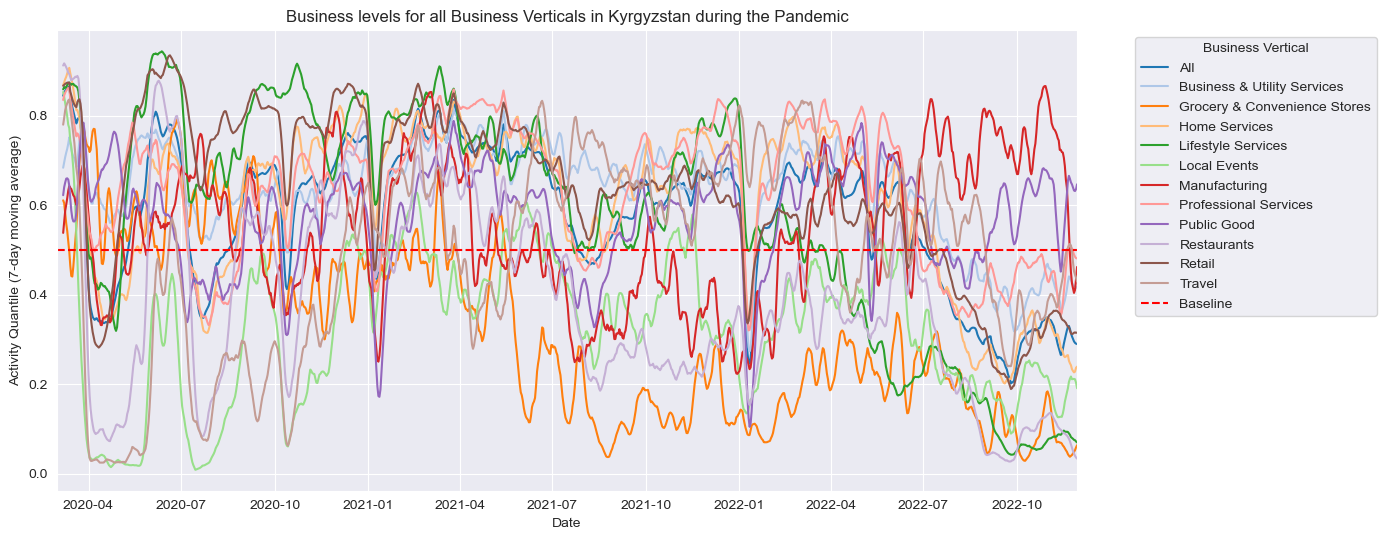

In [330]:
plt.figure(figsize=(14, 5.5))  # 1 row, 2 columns

# Plotting first subplot
sns.lineplot(data=transformed_df.query("gadm_name == 'Kyrgyzstan'").reset_index(), 
             x='date', y='weekly_moving_avg', hue='business_vertical', 
             hue_order=business_vertical_order,
             palette='tab20')
plt.axhline(y=0.5, color='red', label='Baseline', linestyle='--')
plt.xlim([transformed_df.index.min(),transformed_df.index.max()])
plt.title('Business levels for all Business Verticals in Kyrgyzstan during the Pandemic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Business Vertical")
plt.ylabel('Activity Quantile (7-day moving average)')
plt.xlabel('Date')

plt.tight_layout()

# save figure
plt.savefig('figures/q7.2_Kyrgyzstan_comparison.png')

plt.show()


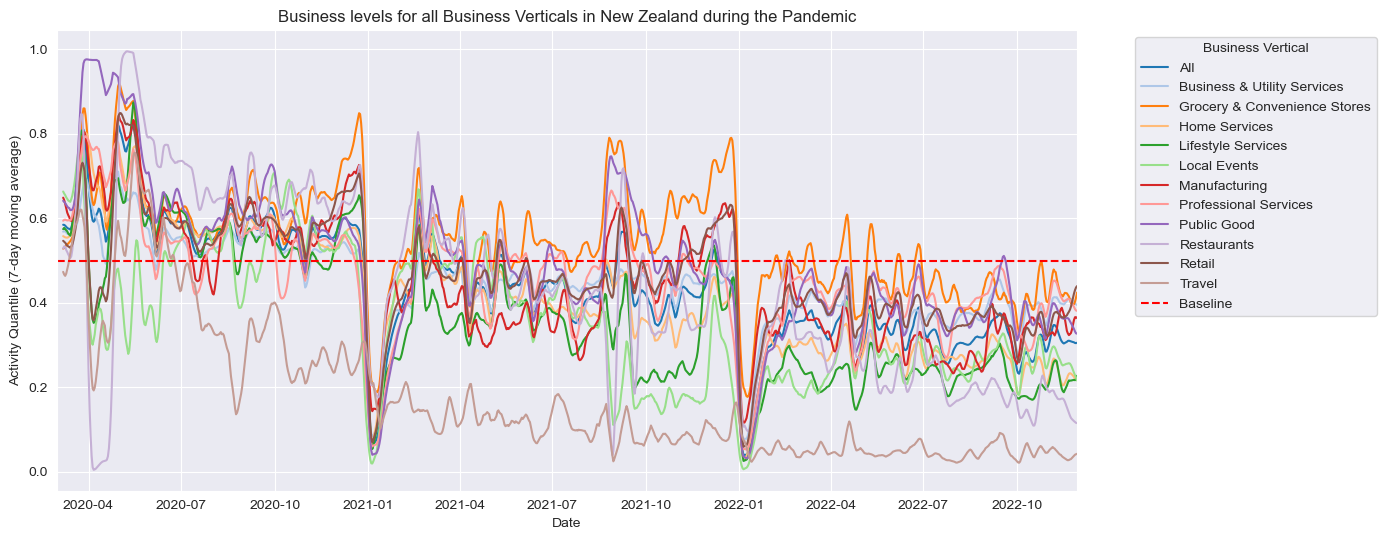

In [331]:
plt.figure(figsize=(14, 5.5))  # 1 row, 2 columns

# Plotting first subplot
sns.lineplot(data=transformed_df.query("gadm_name == 'New Zealand'").reset_index(), 
             x='date', y='weekly_moving_avg', hue='business_vertical', 
             hue_order=business_vertical_order,
             palette='tab20')
plt.axhline(y=0.5, color='red', label='Baseline', linestyle='--')
plt.xlim([transformed_df.index.min(),transformed_df.index.max()])
plt.title('Business levels for all Business Verticals in New Zealand during the Pandemic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Business Vertical")
plt.ylabel('Activity Quantile (7-day moving average)')
plt.xlabel('Date')

plt.tight_layout()

# save figure
plt.savefig('figures/q7.2_New_Zealand_comparison.png')

plt.show()


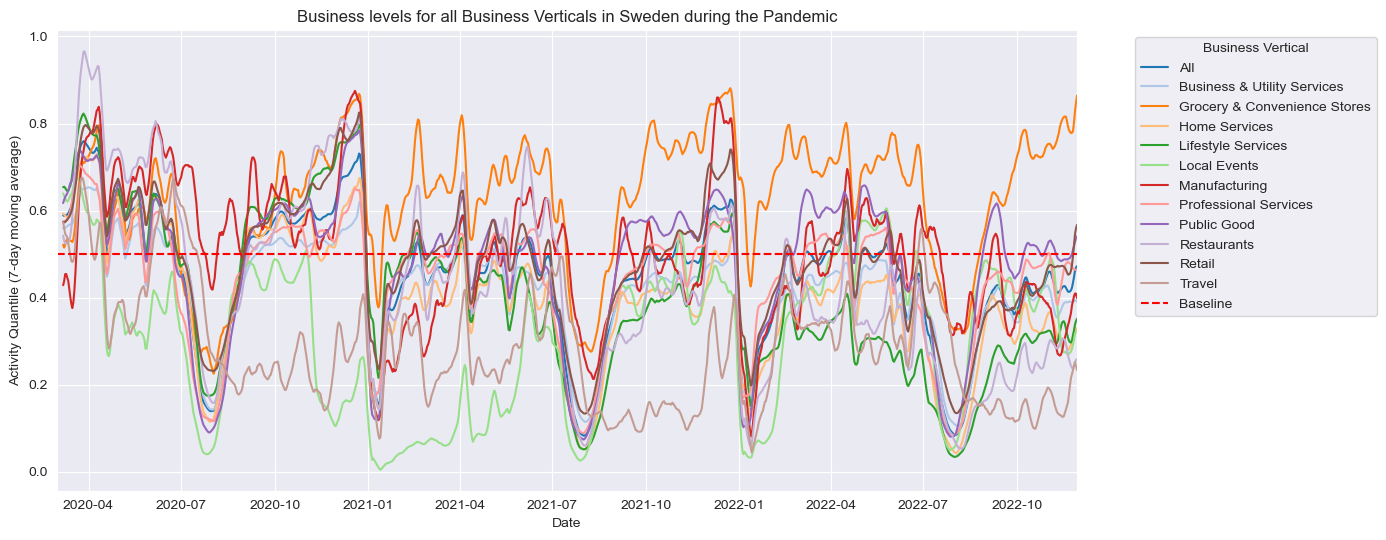

In [332]:
plt.figure(figsize=(14, 5.5))  # 1 row, 2 columns

# Plotting first subplot
sns.lineplot(data=transformed_df.query("gadm_name == 'Sweden'").reset_index(), 
             x='date', y='weekly_moving_avg', hue='business_vertical', 
             hue_order=business_vertical_order,
             palette='tab20')
plt.axhline(y=0.5, color='red', label='Baseline', linestyle='--')
plt.xlim([transformed_df.index.min(),transformed_df.index.max()])
plt.title('Business levels for all Business Verticals in Sweden during the Pandemic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Business Vertical")
plt.ylabel('Activity Quantile (7-day moving average)')
plt.xlabel('Date')

plt.tight_layout()

# save figure
plt.savefig('figures/q7.2_Sweden_comparison.png')

plt.show()

In [326]:
choice_countries

['Brazil', 'United Kingdom', 'Nigeria', 'Kyrgyzstan', 'New Zealand', 'Sweden']

* get info and sample of OxCGRT

Next focus on creating the plots you see on the left for you selected countries for just 'All' business vertical

#### <span style="color:orange">Q8: Difference in activity quantile and activity percentage during analysis</span>

For this, merge the plots above into subplots and use activity percentage instead.

#### <span style="color:orange">Q9: Understanding the changes in business levels for United Kingdom, Brazil, Nigeria, New Zealand, Sweden and Kyrgyzstan</span>

Now I will be using the `OxCGRT_fullwithnotes_national_202x_v1` dataset and only focus on the closure policies for Everyone and ignore the flag variables for now since I want to limit the scope of this work. Check the documentation for the meaning of the variables but my idea is to import those 3 datasets in (for 2020 to 2022) and only select my 6 countries of interest along with my columns of interest.

In [412]:
# Set the directory path where the CSV files are located
directory_path = "C:/Users/LEGION/Documents/Msc Data Science - Uni of Exeter/ECMM443 - Introduction to Data Science (2023)/Coursework/data/COVID-19 Policy Tracker Dataset/covid-policy-dataset-main/data"


# Define a list to store the dataframes of the OxCGRT datasets
oxcgrt_dfs = []

# Loop through the specified years (2020 to 2022)
for year in range(2020, 2023):
    # Create the filename pattern for each year
    filename_pattern = f"OxCGRT_fullwithnotes_national_{year}_v1.csv"
    
    # Use glob to match the pattern in the directory and retrieve file names
    matching_files = glob.glob(os.path.join(directory_path, filename_pattern))
    
    # Read and append each matching CSV file to the list of dataframes
    for file in matching_files:
        df_Ox = pd.read_csv(file)
        oxcgrt_dfs.append(df_Ox)

# Concatenate all the OxCGRT dataframes into a single dataframe
combined_oxcgrt_df = pd.concat(oxcgrt_dfs)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_25852\1431675970.py:18: DtypeWarning: Columns (120,121,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Ox = pd.read_csv(file)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_25852\1431675970.py:18: DtypeWarning: Columns (115) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Ox = pd.read_csv(file)


In [413]:
del oxcgrt_dfs

In [414]:
combined_oxcgrt_df.head()

CountryName CountryCode  RegionName  RegionCode Jurisdiction      Date  \
0       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200101   
1       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200102   
2       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200103   
3       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200104   
4       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200105   

   C1E_School closing  C1E_Flag  C1NV_School closing  C1NV_Flag  ...  \
0                 0.0       NaN                  NaN        NaN  ...   
1                 0.0       NaN                  NaN        NaN  ...   
2                 0.0       NaN                  NaN        NaN  ...   
3                 0.0       NaN                  NaN        NaN  ...   
4                 0.0       NaN                  NaN        NaN  ...   

   StringencyIndex_WeightedAverage  GovernmentResponseIndex_NonVaccinated  \
0                              0.0                                    0.0   
1                              0.0                                    0.0   
2                              0.0                                    0.0   
3                              0.0                                    0.0   
4                              0.0                                    0.0   

   GovernmentResponseIndex_Vaccinated  GovernmentResponseIndex_SimpleAverage  \
0                                 0.0                                    0.0   
1                                 0.0                                    0.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   

  GovernmentResponseIndex_WeightedAverage  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   ContainmentHealthIndex_NonVaccinated  ContainmentHealthIndex_Vaccinated  \
0                                   0.0                                0.0   
1                                   0.0                                0.0   
2                                   0.0                                0.0   
3                                   0.0                                0.0   
4                                   0.0                                0.0   

   ContainmentHealthIndex_SimpleAverage  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   ContainmentHealthIndex_WeightedAverage  EconomicSupportIndex  
0                                     0.0                   0.0  
1                                     0.0                   0.0  
2                                     0.0                   0.0  
3                                     0.0                   0.0  
4                                     0.0                   0.0  

[5 rows x 147 columns]

We just want the columns that contain indicators that affected everyone as well as thier associated notes. 

In [415]:
for i, j in enumerate(combined_oxcgrt_df.columns[:74]):
      print(f"{i}: {j}")

0: CountryName
1: CountryCode
2: RegionName
3: RegionCode
4: Jurisdiction
5: Date
6: C1E_School closing
7: C1E_Flag
8: C1NV_School closing
9: C1NV_Flag
10: C1V_School closing
11: C1V_Flag
12: C1M_School closing
13: C1M_Flag
14: C1_Notes
15: C2E_Workplace closing
16: C2E_Flag
17: C2NV_Workplace closing
18: C2NV_Flag
19: C2V_Workplace closing
20: C2V_Flag
21: C2M_Workplace closing
22: C2M_Flag
23: C2_Notes
24: C3E_Cancel public events
25: C3E_Flag
26: C3NV_Cancel public events
27: C3NV_Flag
28: C3V_Cancel public events
29: C3V_Flag
30: C3M_Cancel public events
31: C3M_Flag
32: C3_Notes
33: C4E_Restrictions on gatherings
34: C4E_Flag
35: C4NV_Restrictions on gatherings
36: C4NV_Flag
37: C4V_Restrictions on gatherings
38: C4V_Flag
39: C4M_Restrictions on gatherings
40: C4M_Flag
41: C4_Notes
42: C5E_Close public transport
43: C5E_Flag
44: C5NV_Close public transport
45: C5NV_Flag
46: C5V_Close public transport
47: C5V_Flag
48: C5M_Close public transport
49: C5M_Flag
50: C5_Notes
51: C6E_Sta

I only want the indicators for Everyone and then the notes. All others can be dropped

In [416]:
desiredCols = combined_oxcgrt_df.columns[[0,1,5,6,14,15,23,24,32,33,41,42,50,51,59,60,68,69,73]]
desiredCols

Index(['CountryName', 'CountryCode', 'Date', 'C1E_School closing', 'C1_Notes',
       'C2E_Workplace closing', 'C2_Notes', 'C3E_Cancel public events',
       'C3_Notes', 'C4E_Restrictions on gatherings', 'C4_Notes',
       'C5E_Close public transport', 'C5_Notes',
       'C6E_Stay at home requirements', 'C6_Notes',
       'C7E_Restrictions on internal movement', 'C7_Notes',
       'C8E_International travel controls', 'C8_Notes'],
      dtype='object')

In [417]:
oxcgrt_df = combined_oxcgrt_df[desiredCols].copy()

# delete from memory
del combined_oxcgrt_df

Check if the names in dataset match with my country names

In [418]:
set(choice_countries).difference(set(oxcgrt_df.CountryName.unique()))

{'Kyrgyzstan'}

In [419]:
[i for i in oxcgrt_df.CountryName.unique() if i[0] == 'K']

['Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Kiribati', 'Kuwait', 'Kosovo']

Kyrgyzstan is called Kyrgyz Republic in the OxCGRT dataset but that's not a problem

In [420]:
oxcgrt_df.CountryName.replace(to_replace='Kyrgyz Republic', value="Kyrgyzstan", inplace=True)

In [421]:
set(choice_countries).difference(set(oxcgrt_df.CountryName.unique()))

set()

In [422]:
# get subset of chosen countries
oxcgrt_df = oxcgrt_df.query("CountryName in @choice_countries").copy()

In [423]:
oxcgrt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6576 entries, 8418 to 57304
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CountryName                            6576 non-null   object 
 1   CountryCode                            6576 non-null   object 
 2   Date                                   6576 non-null   int64  
 3   C1E_School closing                     6415 non-null   float64
 4   C1_Notes                               342 non-null    object 
 5   C2E_Workplace closing                  5941 non-null   float64
 6   C2_Notes                               374 non-null    object 
 7   C3E_Cancel public events               5952 non-null   float64
 8   C3_Notes                               347 non-null    object 
 9   C4E_Restrictions on gatherings         6290 non-null   float64
 10  C4_Notes                               356 non-null    object 
 11  

In [424]:
# convert Date column to datetime dtype
oxcgrt_df['Date'] = pd.to_datetime(oxcgrt_df['Date'], format='%Y%m%d')

# set date as index
oxcgrt_df = oxcgrt_df.set_index('Date')

In [425]:
df_countries_busvert.business_vertical.unique()

array(['All', 'Grocery & Convenience Stores', 'Restaurants'], dtype=object)

In [426]:
df_countries_busvert.ds.min(), df_countries_busvert.ds.max()

(Timestamp('2020-03-01 00:00:00'), Timestamp('2022-11-29 00:00:00'))

In [427]:
# getting the subset of data that covers the dates in our dataset
oxcgrt_df = oxcgrt_df['2020-03-01':'2022-11-29'].copy()

In [428]:
oxcgrt_df[oxcgrt_df.C1_Notes.notna()].sample(5).sort_index()

CountryName CountryCode  C1E_School closing  \
Date                                                      
2021-02-02      Nigeria         NGA                 3.0   
2021-05-09   Kyrgyzstan         KGZ                 2.0   
2021-05-14  New Zealand         NZL                 0.0   
2021-09-16  New Zealand         NZL                 3.0   
2022-09-13  New Zealand         NZL                 0.0   

                                                     C1_Notes  \
Date                                                            
2021-02-02  Required at all levels; source: /web/202102080...   
2021-05-09               No changes found as per last update    
2021-05-14  No policy change found.     All of New Zealand...   
2021-09-16  - No changes recorded  - Auckland is at Alert ...   
2022-09-13  New Zealand’s COVID-19 Protection Framework (t...   

            C2E_Workplace closing  \
Date                                
2021-02-02                    1.0   
2021-05-09                    2.0   
2021-05-14                    0.0   
2021-09-16                    3.0   
2022-09-13                    0.0   

                                                     C2_Notes  \
Date                                                            
2021-02-02  Recommended; source: /web/20210208034733/https...   
2021-05-09  No changes found as per last update    Quote: ...   
2021-05-14  No policy change found.     All of New Zealand...   
2021-09-16  - No changes recorded  - Auckland is at Alert ...   
2022-09-13  The COVID-19 Protection Framework (traffic lig...   

            C3E_Cancel public events  \
Date                                   
2021-02-02                       1.0   
2021-05-09                       2.0   
2021-05-14                       0.0   
2021-09-16                       2.0   
2022-09-13                       0.0   

                                                     C3_Notes  \
Date                                                            
2021-02-02  Recommended cancellations; source: /web/202102...   
2021-05-09           No changes found as per last update        
2021-05-14  No policy change found.     All of New Zealand...   
2021-09-16  - No changes recorded  - Auckland is at Alert ...   
2022-09-13  The Government released its new COVID-19 Strat...   

            C4E_Restrictions on gatherings  \
Date                                         
2021-02-02                             3.0   
2021-05-09                             4.0   
2021-05-14                             0.0   
2021-09-16                             4.0   
2022-09-13                             0.0   

                                                     C4_Notes  \
Date                                                            
2021-02-02  Restrictions on public gatherings between 10-1...   
2021-05-09    Quote: "In Bishkek there are restrictions on...   
2021-05-14  No policy change found.     All of New Zealand...   
2021-09-16  - No changes recorded  - Auckland is at Alert ...   
2022-09-13  The Government released its new COVID-19 Strat...   

            C5E_Close public transport  \
Date                                     
2021-02-02                         0.0   
2021-05-09                         1.0   
2021-05-14                         0.0   
2021-09-16                         2.0   
2022-09-13                         0.0   

                                                     C5_Notes  \
Date                                                            
2021-02-02  No measures; source: /web/20210208035320/https...   
2021-05-09               No changes found as per last update    
2021-05-14  No policy change found.     All of New Zealand...   
2021-09-16  - No changes recorded  - Auckland is at Alert ...   
2022-09-13  Masks are not required on public transport and...   

            C6E_Stay at home requirements  \
Date                                        
2021-02-02                            2.0   
2021-05-09              

In [429]:
oxcgrt_df.describe()

C1E_School closing  C2E_Workplace closing  C3E_Cancel public events  \
count         5863.000000            5389.000000               5400.000000   
mean             1.200580               1.133605                  1.151852   
std              1.189207               1.116606                  0.892798   
min              0.000000               0.000000                  0.000000   
25%              0.000000               0.000000                  0.000000   
50%              1.000000               1.000000                  1.000000   
75%              2.000000               2.000000                  2.000000   
max              3.000000               3.000000                  2.000000   

       C4E_Restrictions on gatherings  C5E_Close public transport  \
count                     5738.000000                 6024.000000   
mean                         2.353433                    0.546813   
std                          1.731459                    0.686532   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   
50%                          3.000000                    0.000000   
75%                          4.000000                    1.000000   
max                          4.000000                    2.000000   

       C6E_Stay at home requirements  C7E_Restrictions on internal movement  \
count                    6024.000000                            6024.000000   
mean                        0.770086                               0.778718   
std                         0.909354                               0.894207   
min                         0.000000                               0.000000   
25%                         0.000000                               0.000000   
50%                         0.000000                               0.000000   
75%                         2.000000                               2.000000   
max                         3.000000                               2.000000   

       C8E_International travel controls  
count                        4577.000000  
mean                            2.105965  
std                             1.456959  
min                             0.000000  
25%                             1.000000  
50%                             2.000000  
75%                             3.000000  
max                             4.000000

In [430]:
# to confirm that our dates are equal
all(oxcgrt_df.query("CountryName == 'Brazil'").index == df_countries_busvert.query("(gadm_name == 'Brazil') & (business_vertical == 'All')").ds)

True

Let's run Spearman's correlation Heat to see which policies correlate with activity quantile.

In [431]:
oxcgrt_df

CountryName CountryCode  C1E_School closing  \
Date                                                     
2020-03-01      Brazil         BRA                 0.0   
2020-03-02      Brazil         BRA                 0.0   
2020-03-03      Brazil         BRA                 0.0   
2020-03-04      Brazil         BRA                 0.0   
2020-03-05      Brazil         BRA                 0.0   
...                ...         ...                 ...   
2022-11-25      Sweden         SWE                 0.0   
2022-11-26      Sweden         SWE                 0.0   
2022-11-27      Sweden         SWE                 0.0   
2022-11-28      Sweden         SWE                 0.0   
2022-11-29      Sweden         SWE                 0.0   

                                                     C1_Notes  \
Date                                                            
2020-03-01                                                NaN   
2020-03-02                                                NaN   
2020-03-03                                                NaN   
2020-03-04                                                NaN   
2020-03-05                                                NaN   
...                                                       ...   
2022-11-25                                                NaN   
2022-11-26                                                NaN   
2022-11-27                                                NaN   
2022-11-28                                                NaN   
2022-11-29  UPDATED 20 DEC 2022 17:15  Covid-19 is no long...   

            C2E_Workplace closing  \
Date                                
2020-03-01                    0.0   
2020-03-02                    0.0   
2020-03-03                    0.0   
2020-03-04                    0.0   
2020-03-05                    0.0   
...                           ...   
2022-11-25                    0.0   
2022-11-26                    0.0   
2022-11-27                    0.0   
2022-11-28                    0.0   
2022-11-29                    0.0   

                                                     C2_Notes  \
Date                                                            
2020-03-01                                                NaN   
2020-03-02                                                NaN   
2020-03-03                                                NaN   
2020-03-04                                                NaN   
2020-03-05                                                NaN   
...                                                       ...   
2022-11-25                                                NaN   
2022-11-26                                                NaN   
2022-11-27                                                NaN   
2022-11-28                                                NaN   
2022-11-29  UPDATED 20 DEC 2022 17:15  Covid-19 is no long...   

            C3E_Cancel public events  \
Date                                   
2020-03-01                       0.0   
2020-03-02                       0.0   
2020-03-03                       0.0   
2020-03-04                       0.0   
2020-03-05                       0.0   
...                              ...   
2022-11-25                       0.0   
2022-11-26                       0.0   
2022-11-27                       0.0   
2022-11-28                       0.0   
2022-11-29                       0.0   

                                                     C3_Notes  \
Date                                                            
2020-03-01                                                NaN   
2020-03-02                                                NaN   
2020-03-03                                                NaN   
2020-03-04                                                NaN   
2020-03-05                                                NaN   
...                                                       ...   
2022-11-25                               

In [432]:
df_countries_busvert.query("business_vertical=='All'")

gadm_id       gadm_name business_vertical  activity_quantile  \
174         KGZ      Kyrgyzstan               All           0.828889   
2045        SWE          Sweden               All           0.600318   
2057        GBR  United Kingdom               All           0.622843   
2201        BRA          Brazil               All           0.462480   
2214        NGA         Nigeria               All           0.758963   
...         ...             ...               ...                ...   
2395180     GBR  United Kingdom               All           0.223435   
2396149     BRA          Brazil               All           0.520536   
2396171     NGA         Nigeria               All           0.060833   
2396192     NZL     New Zealand               All           0.307551   
2396321     SWE          Sweden               All           0.459096   

         activity_percentage  crisis_ds         ds  moving_avg  
174               150.981459 2020-03-01 2020-03-01         NaN  
2045              113.800573 2020-03-01 2020-03-01         NaN  
2057              112.403265 2020-03-01 2020-03-01         NaN  
2201              110.330741 2020-03-01 2020-03-01         NaN  
2214              117.680265 2020-03-01 2020-03-01         NaN  
...                      ...        ...        ...         ...  
2395180            92.592432 2020-03-01 2022-11-29    0.333089  
2396149           134.928161 2020-03-01 2022-11-29    0.364032  
2396171            94.316281 2020-03-01 2022-11-29    0.305321  
2396192            97.417825 2020-03-01 2022-11-29    0.307011  
2396321           118.376772 2020-03-01 2022-11-29    0.341456  

[6024 rows x 8 columns]

Let's add activity_quantile to the OxCGRT dataframe

In [433]:
# get activity quantile values from a sorted dataframe
activity_quantile_vals = df_countries_busvert.query("business_vertical=='All'").sort_values(['gadm_name','ds'])['activity_quantile'].values.copy()

# add those values to the sorted oxcgrt dataframe
oxcgrt_df.reset_index(inplace=True)
oxcgrt_df.sort_values(['CountryName', 'Date'], inplace=True)
oxcgrt_df['activity_quantile'] = activity_quantile_vals#.copy()

In [434]:
oxcgrt_df.columns

Index(['Date', 'CountryName', 'CountryCode', 'C1E_School closing', 'C1_Notes',
       'C2E_Workplace closing', 'C2_Notes', 'C3E_Cancel public events',
       'C3_Notes', 'C4E_Restrictions on gatherings', 'C4_Notes',
       'C5E_Close public transport', 'C5_Notes',
       'C6E_Stay at home requirements', 'C6_Notes',
       'C7E_Restrictions on internal movement', 'C7_Notes',
       'C8E_International travel controls', 'C8_Notes', 'activity_quantile'],
      dtype='object')

In [435]:
oxcgrt_df

Date     CountryName CountryCode  C1E_School closing C1_Notes  \
0    2020-03-01          Brazil         BRA                 0.0      NaN   
1    2020-03-02          Brazil         BRA                 0.0      NaN   
2    2020-03-03          Brazil         BRA                 0.0      NaN   
3    2020-03-04          Brazil         BRA                 0.0      NaN   
4    2020-03-05          Brazil         BRA                 0.0      NaN   
...         ...             ...         ...                 ...      ...   
4687 2022-11-25  United Kingdom         GBR                 0.0      NaN   
4688 2022-11-26  United Kingdom         GBR                 0.0      NaN   
4689 2022-11-27  United Kingdom         GBR                 0.0      NaN   
4690 2022-11-28  United Kingdom         GBR                 0.0      NaN   
4691 2022-11-29  United Kingdom         GBR                 0.0      NaN   

      C2E_Workplace closing C2_Notes  C3E_Cancel public events C3_Notes  \
0                       0.0      NaN                       0.0      NaN   
1                       0.0      NaN                       0.0      NaN   
2                       0.0      NaN                       0.0      NaN   
3                       0.0      NaN                       0.0      NaN   
4                       0.0      NaN                       0.0      NaN   
...                     ...      ...                       ...      ...   
4687                    0.0      NaN                       0.0      NaN   
4688                    0.0      NaN                       0.0      NaN   
4689                    0.0      NaN                       0.0      NaN   
4690                    0.0      NaN                       0.0      NaN   
4691                    0.0      NaN                       0.0      NaN   

      C4E_Restrictions on gatherings C4_Notes  C5E_Close public transport  \
0                                0.0      NaN                         0.0   
1                                0.0      NaN                         0.0   
2                                0.0      NaN                         0.0   
3                                0.0      NaN                         0.0   
4                                0.0      NaN                         0.0   
...                              ...      ...                         ...   
4687                             0.0      NaN                         0.0   
4688                             0.0      NaN                         0.0   
4689                             0.0      NaN                         0.0   
4690                             0.0      NaN                         0.0   
4691                             0.0      NaN                         0.0   

     C5_Notes  C6E_Stay at home requirements C6_Notes  \
0         NaN                            0.0      NaN   
1         NaN                            0.0      NaN   
2         NaN                            0.0      NaN   
3         NaN                            0.0      NaN   
4         NaN                            0.0      NaN   
...       ...                            ...      ...   
4687      NaN                            0.0      NaN   
4688      NaN                            0.0      NaN   
4689      NaN                            0.0      NaN   
4690      NaN                            0.0      NaN   
4691      NaN                            0.0      NaN   

      C7E_Restrictions on internal movement C7_Notes  \
0                                       0.0      NaN   
1                                       0.0      NaN   
2                                       0.0      NaN   
3                                       0.0      NaN   
4                                       0.0      NaN   
...                                     ...      ...   
4687                                    0.0      NaN   
4688                                    0.0      NaN   
4689                                    0.0      NaN   
4690                       

<Axes: xlabel='ds'>

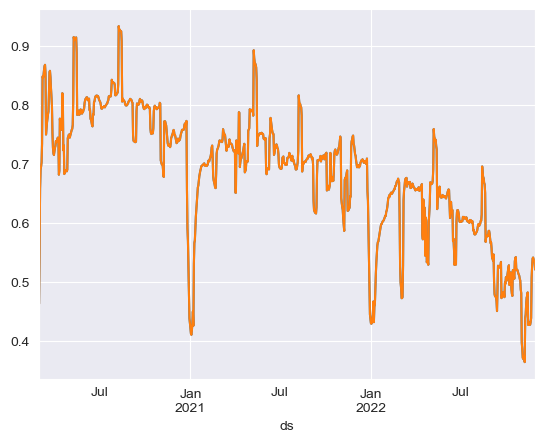

In [439]:
# to confirm if we added the data correctly
oxcgrt_df.set_index('Date').query("(CountryName=='Brazil')")['activity_quantile'].plot()
df_countries_busvert.set_index('ds').query("(business_vertical=='All') & (gadm_name=='Brazil')")['activity_quantile'].plot()

In [442]:
# let df_countries_busvert just contain All
df_countries_busvert = df_countries_busvert.query("business_vertical=='All'").copy()

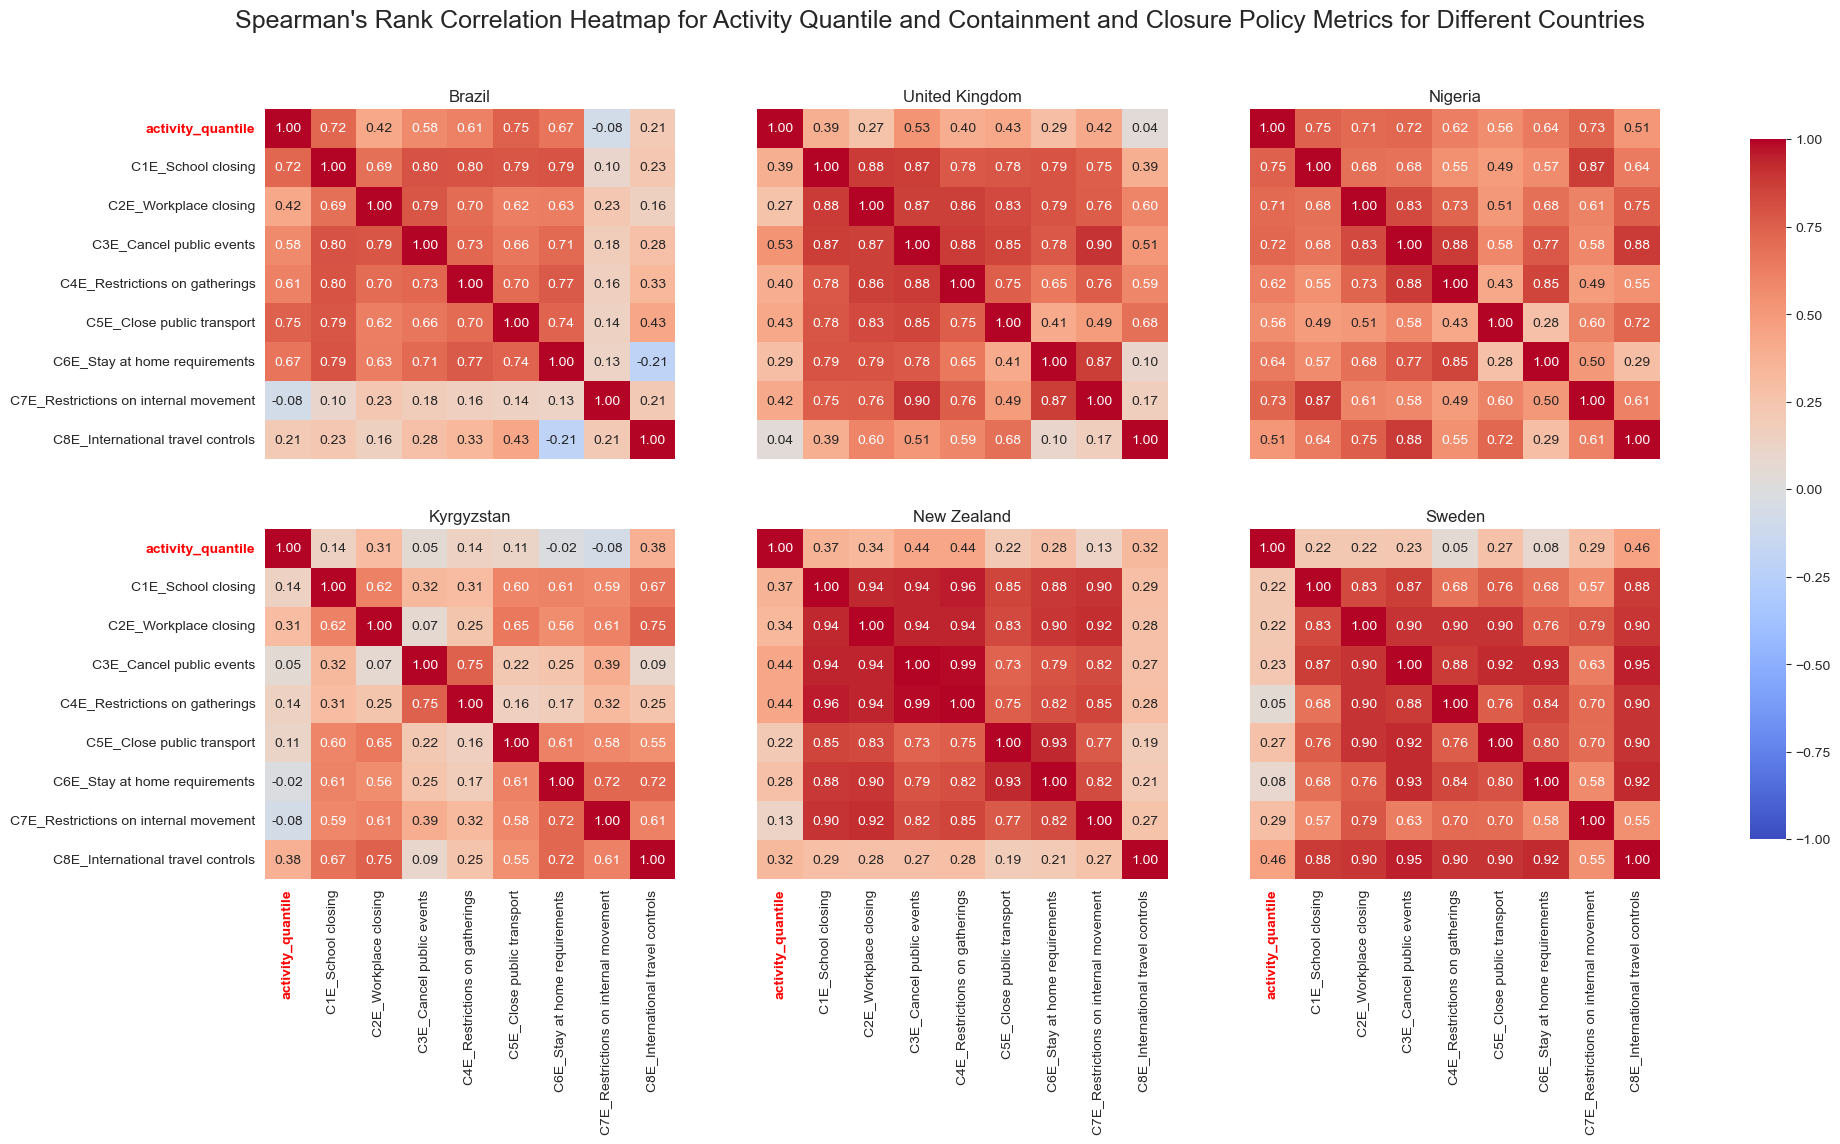

In [474]:
# Initialize a figure for subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# Create a placeholder for the color bar
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])

# Iterate through each country to create the heatmaps
for i, country in enumerate(choice_countries):
    # Create a subset of data for the specific country
    df_country = oxcgrt_df[oxcgrt_df['CountryName'] == country]
    
    # Extract relevant columns for correlation
    df_subset = df_country[['activity_quantile', 'C1E_School closing', 'C2E_Workplace closing',
                            'C3E_Cancel public events', 'C4E_Restrictions on gatherings',
                            'C5E_Close public transport', 'C6E_Stay at home requirements',
                            'C7E_Restrictions on internal movement', 'C8E_International travel controls']]
    
    # Calculate Spearman's rank correlation
    corr_matrix = df_subset.corr(method='spearman', numeric_only=True)
    
    # Plot the heatmap for each country in the subplot
    heatmap = sns.heatmap(corr_matrix, ax=axs[i // 3, i % 3], cmap='coolwarm', annot=True, fmt=".2f",
                          vmin=-1, vmax=1, cbar=i == 0, cbar_ax=None if i else cbar_ax)  # Show color bar only for the first heatmap
    
    # Highlight the first tick label for both x-axis and y-axis
    heatmap.xaxis.get_major_ticks()[0].label1.set_fontweight('bold')  # Make the x-axis tick label bold
    heatmap.yaxis.get_major_ticks()[0].label1.set_fontweight('bold')  # Make the y-axis tick label bold
    
    heatmap.xaxis.get_major_ticks()[0].label1.set_color('red')  # Make the x-axis tick label red
    heatmap.yaxis.get_major_ticks()[0].label1.set_color('red')  # Make the y-axis tick label red
    
    axs[i // 3, i % 3].set_title(f'{country}')

# Set common labels and layout
fig.suptitle('Spearman\'s Rank Correlation Heatmap for Activity Quantile and Containment and Closure Policy Metrics for Different Countries', fontsize=18)
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplot layout

# save figure
plt.savefig('figures/q8.3_spearmancorr_heatmap.png')

# Display the plot
plt.show()


Althought the correlation weak for some countries we'll still use it to gain insights in our analysis

In [488]:
df_pol_dates = oxcgrt_df[['Date', 'CountryName','activity_quantile', 'C1_Notes', 'C2_Notes', 'C3_Notes',
                          'C4_Notes', 'C5_Notes', 'C6_Notes', 'C7_Notes', 'C8_Notes']]

In [489]:
df_pol_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6024 entries, 0 to 4691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               6024 non-null   datetime64[ns]
 1   CountryName        6024 non-null   object        
 2   activity_quantile  6024 non-null   float64       
 3   C1_Notes           337 non-null    object        
 4   C2_Notes           369 non-null    object        
 5   C3_Notes           340 non-null    object        
 6   C4_Notes           351 non-null    object        
 7   C5_Notes           300 non-null    object        
 8   C6_Notes           318 non-null    object        
 9   C7_Notes           309 non-null    object        
 10  C8_Notes           334 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 564.8+ KB


I'm interested in finding the amount of important were enacted in a particular day. That means finding the number of non empty rows for the notes section on each day.

In [520]:
# empty list to contain dataframes for plotting
df_policy_counts = pd.DataFrame()

In [521]:
for country in choice_countries:
      plotData_policy = pd.DataFrame({'date':df_pol_dates.query("CountryName == @country")['Date'].values,
                                      'CountryName': country,
                                      'activity_quantile': df_pol_dates.query("CountryName == @country")['activity_quantile'].values,
                                      'n_policies': df_pol_dates.query("CountryName == @country").notna().iloc[:,3:].sum(axis=1).values,
                                      'label': df_pol_dates.query("CountryName == @country").notna().iloc[:,3:].sum(axis=1).values.astype(str)
                                      })

      # replace label columns (np.NaN for 0 policies)
      plotData_policy.label.replace("0", np.NaN, inplace=True)
      plotData_policy.label.replace("1", "1-2 policies", inplace=True)
      plotData_policy.label.replace("2", "1-2 policies", inplace=True)
      plotData_policy.label.replace("3", "3-4 policies", inplace=True)
      plotData_policy.label.replace("4", "3-4 policies", inplace=True)
      plotData_policy.label.replace("5", "5-8 policies", inplace=True)
      plotData_policy.label.replace("6", "5-8 policies", inplace=True)
      plotData_policy.label.replace("7", "5-8 policies", inplace=True)
      plotData_policy.label.replace("8", "5-8 policies", inplace=True)

      # replace 0 values in n_policies with NaN also
      plotData_policy.n_policies.replace(0, np.NaN, inplace=True)

      # append dataframe
      df_policy_counts = pd.concat([df_policy_counts, plotData_policy], ignore_index=True)

In [523]:
df_policy_counts.label.unique()

array([nan, '1-2 policies', '5-8 policies', '3-4 policies'], dtype=object)

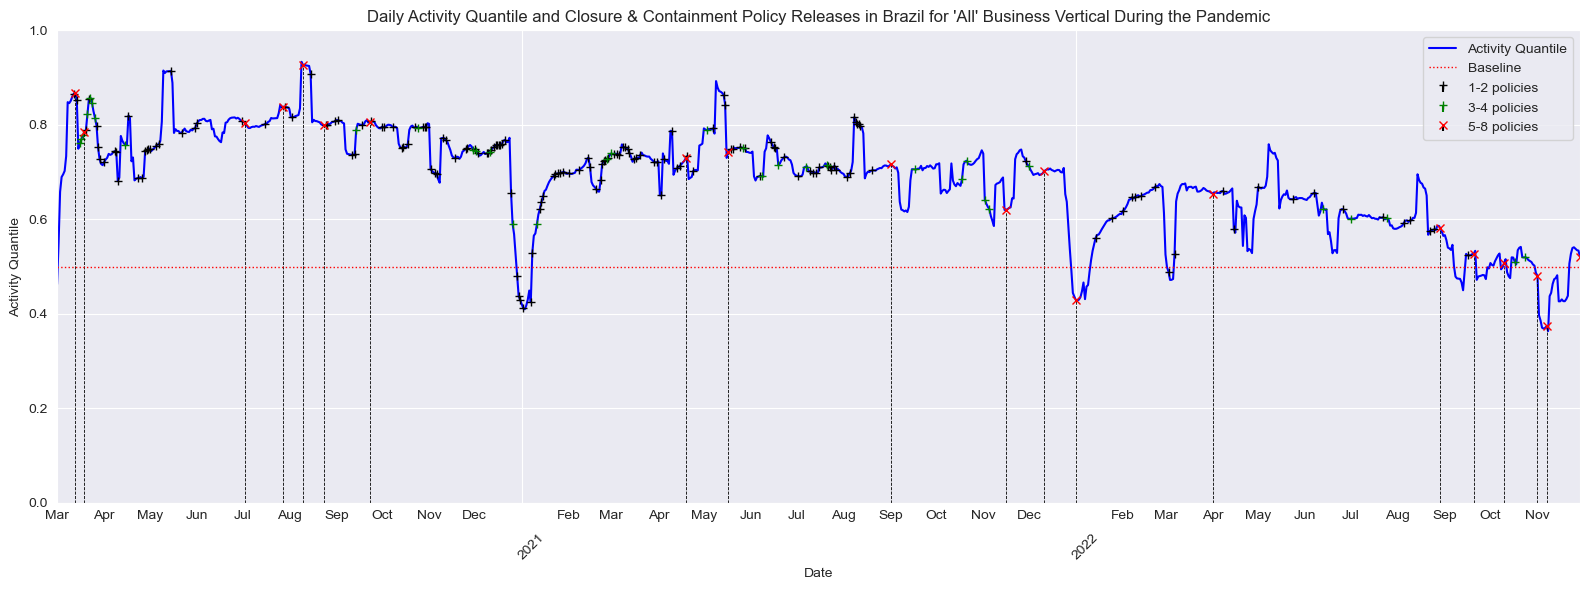

In [529]:
plotData_policy = df_policy_counts.query('CountryName=="Brazil"')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(16, 6))

# Line plot
ax1.plot(plotData_policy['date'], plotData_policy['activity_quantile'], color='blue', label='Activity Quantile')

# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '1-2 policies')")['date'], 
                                           plotData_policy.query("(label == '1-2 policies')")['activity_quantile'], 
                                           linefmt='k-', markerfmt='k+', basefmt=' ', label='1-2 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '3-4 policies')")['date'], 
                                           plotData_policy.query("(label == '3-4 policies')")['activity_quantile'], 
                                           linefmt='g-', markerfmt='g+', basefmt=' ', label='3-4 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("label == '5-8 policies'")['date'], 
                                           plotData_policy.query("label == '5-8 policies'")['activity_quantile'], 
                                           linefmt='k--', markerfmt='rx', basefmt=' ', label='5-8 policies')
plt.setp(stemlines, linewidth=0.6)  # Adjust line width here

# baseline
ax1.axhline(y=0.5,color='red', label='Baseline',linewidth=1, linestyle=":")

# Formatting
# put legends
ax1.legend()

# set x-axis limit to the range of dates in the data
ax1.set_xlim([plotData_policy['date'].min()+pd.DateOffset(days=0), plotData_policy['date'].max()+pd.DateOffset(days=0)])
ax1.set_ylim([0,1])

# rotate the x-axis tick labels for readability
ax1.tick_params(axis='x', rotation=45)

# Get the unique years in your dataset
unique_years = plotData_policy.dropna()['date'].dt.year.unique()

# set the major ticks to be at the beginning of each year
ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n\n%Y'))

# set the minor ticks to be at the beginning of each month
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

# labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Activity Quantile')
ax1.set_title("Daily Activity Quantile and Closure & Containment Policy Releases in Brazil for 'All' Business Vertical During the Pandemic")

plt.tight_layout()

# save figure
#plt.savefig('figures/q8.4_brazil_policyrelease.png')

plt.show()

In [546]:
plotData_policy = df_policy_counts.query('CountryName=="Brazil"').copy()
plotData_policy.set_index('date',inplace=True)
plotData_policy.dropna(inplace=True)

In [554]:
investigate_Br = df_pol_dates.query("CountryName == 'Brazil'").set_index('Date').copy()

Let's look from April to June for all years

In [556]:
plotData_policy.loc["April 2020":"June 2020"]

CountryName  activity_quantile  n_policies         label
date                                                               
2020-04-01      Brazil           0.721441         1.0  1-2 policies
2020-04-08      Brazil           0.744398         1.0  1-2 policies
2020-04-09      Brazil           0.742686         1.0  1-2 policies
2020-04-10      Brazil           0.681423         1.0  1-2 policies
2020-04-15      Brazil           0.758049         3.0  3-4 policies
2020-04-17      Brazil           0.819770         2.0  1-2 policies
2020-04-23      Brazil           0.687770         1.0  1-2 policies
2020-04-26      Brazil           0.687075         2.0  1-2 policies
2020-04-28      Brazil           0.743771         1.0  1-2 policies
2020-04-29      Brazil           0.745807         1.0  1-2 policies
2020-04-30      Brazil           0.749130         1.0  1-2 policies
2020-05-01      Brazil           0.749735         1.0  1-2 policies
2020-05-05      Brazil           0.754813         1.0  1-2 policies
2020-05-07      Brazil           0.759088         1.0  1-2 policies
2020-05-15      Brazil           0.914385         1.0  1-2 policies
2020-05-22      Brazil           0.783860         2.0  1-2 policies
2020-05-31      Brazil           0.793816         1.0  1-2 policies
2020-06-01      Brazil           0.803131         1.0  1-2 policies

Policy at peak was on May 15th

In [558]:
investigate_Br.loc['2020-05-15']['C6_Notes']

"There are 'stay at home' requirements in force in many parts of Brazil, including Maranhao, Para, Amapa, Rio de Janeiro, Minas Gerai.    In Para, the measures will be in force at least until May 24: https://web.archive.org/web/20200521083357/https://www.sistemas.pa.gov.br/sisleis/legislacao/5578"

This just tells us that the peak dropped due to the sit at home order

<Axes: xlabel='Date'>

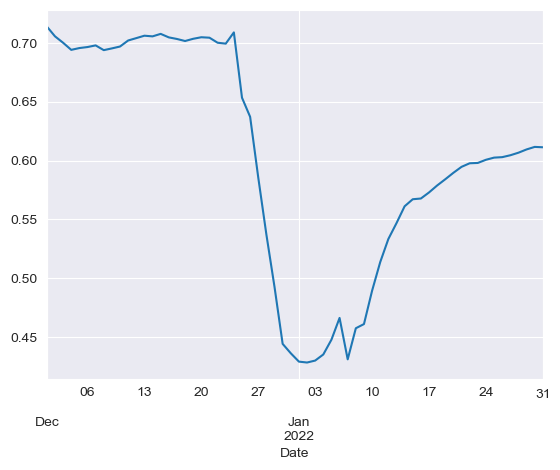

In [610]:
investigate_Br.loc['December 2021':'January 2022']['activity_quantile'].plot()

Let's look check from 20th April to 11th May

In [611]:
window = plotData_policy.loc['December 2021':'January 2022'].index

In [614]:
investigate_Br.loc[window]#.loc['2021-12-01',"C2_Notes"]

CountryName  activity_quantile  \
date                                        
2021-12-01      Brazil           0.713851   
2021-12-11      Brazil           0.701990   
2022-01-01      Brazil           0.429208   
2022-01-14      Brazil           0.561155   
2022-01-25      Brazil           0.602491   

                                                     C1_Notes  \
date                                                            
2021-12-01                                                NaN   
2021-12-11  No change from previous policy, schools are pa...   
2022-01-01  There are no national policies on school closu...   
2022-01-14                                                NaN   
2022-01-25                                                NaN   

                                                     C2_Notes  \
date                                                            
2021-12-01  On August 23rd, the Mayor of Sao Paulo announc...   
2021-12-11  No change in national policy, continued variat...   
2022-01-01  From 14th January 2022, in the state of Pernam...   
2022-01-14                                                NaN   
2022-01-25                                                NaN   

                                                     C3_Notes  \
date                                                            
2021-12-01  On August 23rd, the Mayor of Sao Paulo announc...   
2021-12-11  No change in national policy, continued variat...   
2022-01-01  From 14th January 2022, in the state of Pernam...   
2022-01-14                                                NaN   
2022-01-25                                                NaN   

                                                     C4_Notes  \
date                                                            
2021-12-01  On August 23rd, the Mayor of Sao Paulo announc...   
2021-12-11  No change in national policy, continued variat...   
2022-01-01                                                NaN   
2022-01-14  From 14th January 2022, in the state of Pernam...   
2022-01-25                                                NaN   

                                                     C5_Notes  \
date                                                            
2021-12-01                                                NaN   
2021-12-11  No change in policy, public transport is opera...   
2022-01-01  Masks are mandatory in many places, but there ...   
2022-01-14                                                NaN   
2022-01-25                                                NaN   

                                                     C6_Notes  \
date                                                            
2021-12-01                                                NaN   
2021-12-11  No change in policy. People are not required t...   
2022-01-01  No evidence of any requirements or recommendat...   
2022-01-14                                                NaN   
2022-01-25                                                NaN   

                                                     C7_Notes  \
date                                                            
2021-12-01                                                NaN   
2021-12-11  No policy change. There are no national moveme...   
2022-01-01  FUNAI, the national indigenous foundation, has...   
2022-01-14                                                NaN   
2022-01-25                                                NaN   

                                                     C8_Notes  
date                                                           
2021-12-01                                                NaN  
2021-12-11  Two bans are in place. One for unvaccinated ar...  
2022-01-01                                                NaN  
2022-01-14                                                NaN  
2022-01-25  As of 25 January, the UK foreign office is no ...

May and August peaks
* [Schools where ordered to close on the 25th of April](https://web.archive.org/web/20200425104257/https://pt.unesco.org/fieldoffice/brasilia/expertise/covid-19)
* [Schools began opening on the 5th of May even though higher education were waited till 15th](https://web.archive.org/web/20200508180019/http://portal.mec.gov.br/component/content/index.php?option=com_content&view=article&id=88861:conversa-com-o-ministro-otimismo-com-retorno-de-aulas-e-enem-2020&catid=12&Itemid=86)
* [Mother's day, which is on the 12th of May seems highly celebrated in Brazil. In 2020, a pianist openly serenades the people and in 2021, the President at that time rode a huge crowd of bikers through the capital city](https://www.reuters.com/article/us-health-coronavirus-brazil-mothersday/to-celebrate-mothers-trapped-in-quarantine-sao-paulo-gets-creative-idUSKBN22M0FP/)(https://www.dailymail.co.uk/news/article-9563407/Brazilian-president-dismisses-COVID-19-pandemic-riding-dozens-bikers-Mothers-Day.html)
* [Most non-essential services that were closed like restaurants, shops and bars were beginning to open up in some cities in the 10th of August](https://web.archive.org/web/20200823153408/https://www.imf.org/en/Topics/imf-and-covid19/Policy-Responses-to-COVID-19)
* [Also on the 10th, more schools opened](http://web.archive.org/web/20200823204827/https://www.wsws.org/en/articles/2020/08/15/braz-a15.html)

Small improvements towards end of year (Oct to Dec 2021 focus)
* Towards the end of the year, the government slackens a bit on restrictions.
* [Although this shouldn't be the cause for a seemly seasonal effect, it appears that there was a lot of discussion on vaccines and vaccinations around that period and as a result, policies penalized the unvaccinated more and as the majority got vaccinated, it's probable that business activity improved a bit.](https://web.archive.org/web/20220412065843/https://www.riotimesonline.com/brazil-news/nosubscription/vaccine-passport-in-brazil-where-is-it-mandatory/)(https://www.reuters.com/article/us-health-coronavirus-brazil/brazils-top-court-orders-government-to-set-date-for-covid-19-vaccination-plan-idUSKBN28N0WV/)

Drop in New Year;
* This is most likely due to the fact that workers take a leave for the holidays and as such business activity tends to reduce drastically.

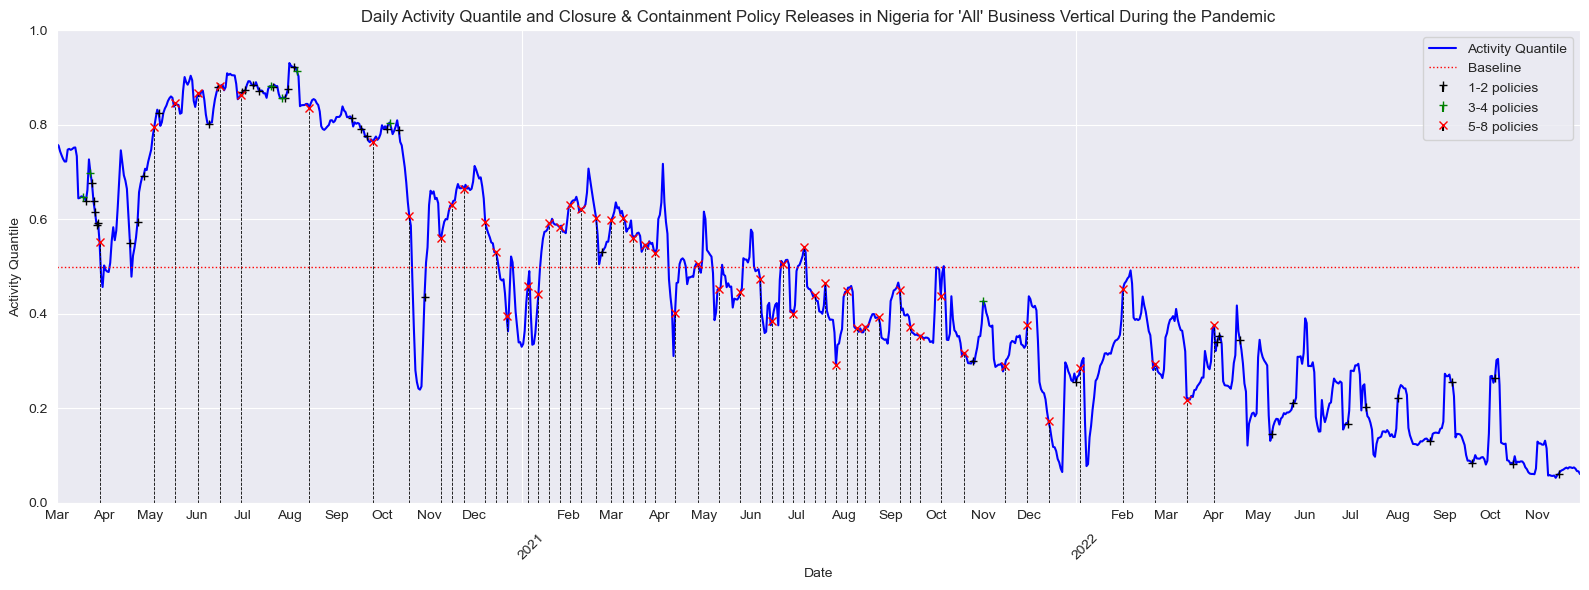

In [530]:
plotData_policy = df_policy_counts.query('CountryName=="Nigeria"')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(16, 6))

# Line plot
ax1.plot(plotData_policy['date'], plotData_policy['activity_quantile'], color='blue', label='Activity Quantile')

# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '1-2 policies')")['date'], 
                                           plotData_policy.query("(label == '1-2 policies')")['activity_quantile'], 
                                           linefmt='k-', markerfmt='k+', basefmt=' ', label='1-2 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '3-4 policies')")['date'], 
                                           plotData_policy.query("(label == '3-4 policies')")['activity_quantile'], 
                                           linefmt='g-', markerfmt='g+', basefmt=' ', label='3-4 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("label == '5-8 policies'")['date'], 
                                           plotData_policy.query("label == '5-8 policies'")['activity_quantile'], 
                                           linefmt='k--', markerfmt='rx', basefmt=' ', label='5-8 policies')
plt.setp(stemlines, linewidth=0.6)  # Adjust line width here

# baseline
ax1.axhline(y=0.5,color='red', label='Baseline',linewidth=1, linestyle=":")

# Formatting
# put legends
ax1.legend()

# set x-axis limit to the range of dates in the data
ax1.set_xlim([plotData_policy['date'].min()+pd.DateOffset(days=0), plotData_policy['date'].max()+pd.DateOffset(days=0)])
ax1.set_ylim([0,1])

# rotate the x-axis tick labels for readability
ax1.tick_params(axis='x', rotation=45)

# Get the unique years in your dataset
unique_years = plotData_policy.dropna()['date'].dt.year.unique()

# set the major ticks to be at the beginning of each year
ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n\n%Y'))

# set the minor ticks to be at the beginning of each month
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

# labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Activity Quantile')
ax1.set_title("Daily Activity Quantile and Closure & Containment Policy Releases in Nigeria for 'All' Business Vertical During the Pandemic")

plt.tight_layout()

# save figure
plt.savefig('figures/q8.4_nigeria_policyrelease.png')

plt.show()

In [615]:
plotData_policy = df_policy_counts.query('CountryName=="Nigeria"').copy()
plotData_policy.set_index('date',inplace=True)
plotData_policy.dropna(inplace=True)

In [616]:
investigate_Br = df_pol_dates.query("CountryName == 'Nigeria'").set_index('Date').copy()

<Axes: xlabel='Date'>

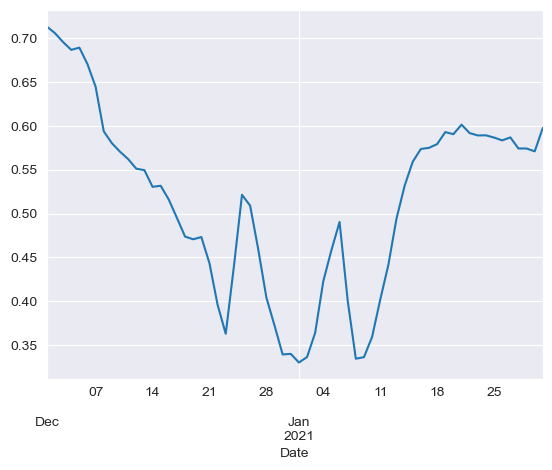

In [628]:
investigate_Br.loc['December 2020':'January 2021']['activity_quantile'].plot()

Let's look check from 20th April to 11th May

In [629]:
window = plotData_policy.loc['December 2020':'January 2021'].index

In [640]:
investigate_Br.loc[window]#.loc['2020-12-08',"C7_Notes"]

CountryName  activity_quantile  \
date                                         
2020-12-08  New Zealand           0.597594   
2020-12-15  New Zealand           0.585065   
2020-12-22  New Zealand           0.557905   
2021-01-05  New Zealand           0.081518   
2021-01-12  New Zealand           0.177234   
2021-01-19  New Zealand           0.298012   
2021-01-26  New Zealand           0.362576   

                                                     C1_Notes  \
date                                                            
2020-12-08  NZ is at Alert Level 1.  At Alert Level 1, Ear...   
2020-12-15                                                NaN   
2020-12-22                                                NaN   
2021-01-05                                                NaN   
2021-01-12                                                NaN   
2021-01-19                                                NaN   
2021-01-26                                                NaN   

                                                     C2_Notes  \
date                                                            
2020-12-08  Policy remains unchanged.  https://web.archive...   
2020-12-15                                                NaN   
2020-12-22                                                NaN   
2021-01-05                                                NaN   
2021-01-12                                                NaN   
2021-01-19                                                NaN   
2021-01-26                                                NaN   

                                                     C3_Notes  \
date                                                            
2020-12-08  Social gatherings, events and public facilitie...   
2020-12-15                                                NaN   
2020-12-22                                                NaN   
2021-01-05                                                NaN   
2021-01-12                                                NaN   
2021-01-19                                                NaN   
2021-01-26                                                NaN   

                                                     C4_Notes  \
date                                                            
2020-12-08  All of New Zealand is at Alert Level 1. There ...   
2020-12-15                                                NaN   
2020-12-22                                                NaN   
2021-01-05                                                NaN   
2021-01-12                                                NaN   
2021-01-19                                                NaN   
2021-01-26                                                NaN   

                                                     C5_Notes  \
date                                                            
2020-12-08  At Alert Level 1, you can travel but try to do...   
2020-12-15                                                NaN   
2020-12-22                                                NaN   
2021-01-05                                                NaN   
2021-01-12                                                NaN   
2021-01-19                                                NaN   
2021-01-26                                                NaN   

                                                     C6_Notes  \
date                                                            
2020-12-08  You can leave your house and gather with as ma...   
2020-12-15                                                NaN   
2020-12-22                                                NaN   
2021-01-05                                                NaN   
2021-01-12                                                NaN   
2021-01-19                                                NaN   
2021-01-26                                                NaN   

                                                     C7_Notes  \
date            

Dip in October 2021
* [Dip experienced in October 2020 was most likely due to the "END-SARS" protest which was held nationwide around that time period](https://punchng.com/endsars-protesters-defy-wikes-ban-lament-killings/)

Drop in New Year;
* This is most likely due to the fact that workers take a leave for the holidays and as such business activity tends to reduce drastically.

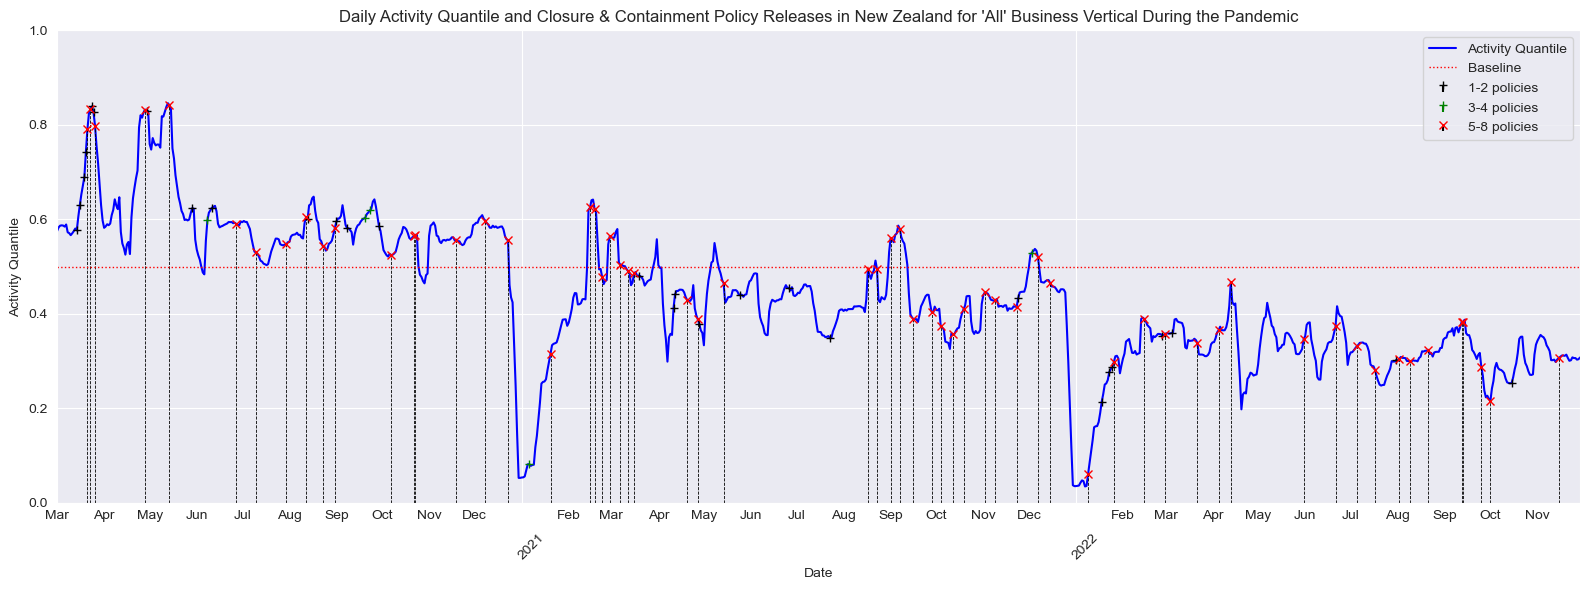

In [531]:
plotData_policy = df_policy_counts.query('CountryName=="New Zealand"')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(16, 6))

# Line plot
ax1.plot(plotData_policy['date'], plotData_policy['activity_quantile'], color='blue', label='Activity Quantile')

# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '1-2 policies')")['date'], 
                                           plotData_policy.query("(label == '1-2 policies')")['activity_quantile'], 
                                           linefmt='k-', markerfmt='k+', basefmt=' ', label='1-2 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '3-4 policies')")['date'], 
                                           plotData_policy.query("(label == '3-4 policies')")['activity_quantile'], 
                                           linefmt='g-', markerfmt='g+', basefmt=' ', label='3-4 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("label == '5-8 policies'")['date'], 
                                           plotData_policy.query("label == '5-8 policies'")['activity_quantile'], 
                                           linefmt='k--', markerfmt='rx', basefmt=' ', label='5-8 policies')
plt.setp(stemlines, linewidth=0.6)  # Adjust line width here

# baseline
ax1.axhline(y=0.5,color='red', label='Baseline',linewidth=1, linestyle=":")

# Formatting
# put legends
ax1.legend()

# set x-axis limit to the range of dates in the data
ax1.set_xlim([plotData_policy['date'].min()+pd.DateOffset(days=0), plotData_policy['date'].max()+pd.DateOffset(days=0)])
ax1.set_ylim([0,1])

# rotate the x-axis tick labels for readability
ax1.tick_params(axis='x', rotation=45)

# Get the unique years in your dataset
unique_years = plotData_policy.dropna()['date'].dt.year.unique()

# set the major ticks to be at the beginning of each year
ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n\n%Y'))

# set the minor ticks to be at the beginning of each month
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

# labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Activity Quantile')
ax1.set_title("Daily Activity Quantile and Closure & Containment Policy Releases in New Zealand for 'All' Business Vertical During the Pandemic")

plt.tight_layout()

# save figure
plt.savefig('figures/q8.4_newzealand_policyrelease.png')

plt.show()

In [641]:
plotData_policy = df_policy_counts.query('CountryName=="New Zealand"').copy()
plotData_policy.set_index('date',inplace=True)
plotData_policy.dropna(inplace=True)

In [642]:
investigate_Br = df_pol_dates.query("CountryName == 'New Zealand'").set_index('Date').copy()

<Axes: xlabel='Date'>

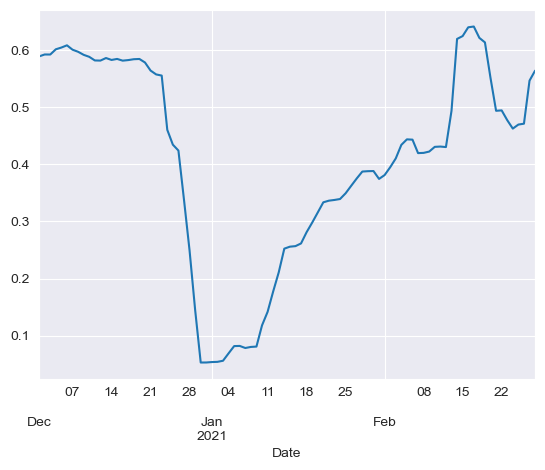

In [660]:
investigate_Br.loc['December 2020':'February 2021']['activity_quantile'].plot()

Let's look check from 20th April to 11th May

In [661]:
window = plotData_policy.loc['December 2020':'February 2021'].index

In [662]:
investigate_Br.loc[window]#.loc['2020-03-21',"C2_Notes"]

CountryName  activity_quantile  \
date                                         
2020-12-08  New Zealand           0.597594   
2020-12-23  New Zealand           0.555868   
2021-01-06  New Zealand           0.081794   
2021-01-20  New Zealand           0.315781   
2021-02-15  New Zealand           0.625142   
2021-02-18  New Zealand           0.621963   
2021-02-23  New Zealand           0.477703   
2021-02-28  New Zealand           0.564468   

                                                     C1_Notes  \
date                                                            
2020-12-08  NZ is at Alert Level 1.  At Alert Level 1, Ear...   
2020-12-23  At Alert Level 1, Early Learning Centres, scho...   
2021-01-06                                                NaN   
2021-01-20  20/01/2021 till 29/01/2021: New Zealand has a ...   
2021-02-15  As of 11.59pm on Sunday 14 February, Auckland ...   
2021-02-18  Auckland is moving to Alert Level 2 at 11:59pm...   
2021-02-23  Auckland joined the rest of New Zealand at Ale...   
2021-02-28  28 February 2021  Auckland moves to Alert Leve...   

                                                     C2_Notes  \
date                                                            
2020-12-08  Policy remains unchanged.  https://web.archive...   
2020-12-23  NZ remains at Alert Level 1.  Site: http://web...   
2021-01-06                                                NaN   
2021-01-20  20/01/2021 till 29/01/2021: New Zealand has a ...   
2021-02-15  As of 11.59pm on Sunday 14 February, Auckland ...   
2021-02-18  Auckland is moving to Alert Level 2 at 11:59pm...   
2021-02-23  Auckland joined the rest of New Zealand at Ale...   
2021-02-28  28 February 2021  Auckland moves to Alert Leve...   

                                                     C3_Notes  \
date                                                            
2020-12-08  Social gatherings, events and public facilitie...   
2020-12-23  There is no limit on the number of people who ...   
2021-01-06                                                NaN   
2021-01-20  20/01/2021 till 29/01/2021: New Zealand has a ...   
2021-02-15  As of 11.59pm on Sunday 14 February, Auckland ...   
2021-02-18  Auckland is moving to Alert Level 2 at 11:59pm...   
2021-02-23  Auckland joined the rest of New Zealand at Ale...   
2021-02-28  Auckland is at level 3, the rest of New Zealan...   

                                                     C4_Notes  \
date                                                            
2020-12-08  All of New Zealand is at Alert Level 1. There ...   
2020-12-23  There is no limit on the number of people who ...   
2021-01-06                                                NaN   
2021-01-20  20/01/2021 till 29/01/2021: New Zealand has a ...   
2021-02-15  As of 11.59pm on Sunday 14 February, Auckland ...   
2021-02-18  Auckland is moving to Alert Level 2 at 11:59pm...   
2021-02-23  Auckland joined the rest of New Zealand at Ale...   
2021-02-28  Auckland is at Alert Level 3. The rest of New ...   

                                                     C5_Notes  \
date                                                            
2020-12-08  At Alert Level 1, you can travel but try to do...   
2020-12-23  No changes in policy were found.  Source: http...   
2021-01-06                                                NaN   
2021-01-20  20/01/2021 till 29/01/2021: New Zealand has a ...   
2021-02-15  As of 11.59pm on Sunday 14 February, Auckland ...   
2021-02-18                                                NaN   
2021-02-23                                                NaN   
2021-02-28  No targeted closures on public transport. Only...   

                                                     C6_Notes  \
date                                                            
2020-12-08  You can leave your house and gather with as ma...   
2020-12-23  You can leave your house and gather with as ma...   
2021-01-06                          

Dip in April 2020
* [This dip probably came as a response to all the policies that were put out but the government, which restricted movement, just a fews days prior. For example looking at workplace closing policies, within a space of 1 week, i.e., from 21st March to 26th March, New Zealand ](https://web.archive.org/web/20200402003757/https://covid19.govt.nz/government-actions/covid-19-alert-system/)(https://web.archive.org/web/20200401234228/https://thespinoff.co.nz/politics/23-03-2020/covid-19-nz-live-updates-march-23-courts-to-continue-operating-several-schools-closed/)(https://web.archive.org/web/20200401234228/https://thespinoff.co.nz/politics/23-03-2020/covid-19-nz-live-updates-march-23-courts-to-continue-operating-several-schools-closed/)

Drop in New Year;
* [Seeing as this occured globally, its most likely due to the discovery of the Delta variant in late 2020 and the Omicron variant in late 2021](https://www.yalemedicine.org/news/covid-19-variants-of-concern-omicron).
* This is most likely due to the fact that workers take a leave for the holidays and as such business activity tends to reduce drastically.

In [657]:
oxcgrt_df

Date     CountryName CountryCode  C1E_School closing C1_Notes  \
0    2020-03-01          Brazil         BRA                 0.0      NaN   
1    2020-03-02          Brazil         BRA                 0.0      NaN   
2    2020-03-03          Brazil         BRA                 0.0      NaN   
3    2020-03-04          Brazil         BRA                 0.0      NaN   
4    2020-03-05          Brazil         BRA                 0.0      NaN   
...         ...             ...         ...                 ...      ...   
4687 2022-11-25  United Kingdom         GBR                 0.0      NaN   
4688 2022-11-26  United Kingdom         GBR                 0.0      NaN   
4689 2022-11-27  United Kingdom         GBR                 0.0      NaN   
4690 2022-11-28  United Kingdom         GBR                 0.0      NaN   
4691 2022-11-29  United Kingdom         GBR                 0.0      NaN   

      C2E_Workplace closing C2_Notes  C3E_Cancel public events C3_Notes  \
0                       0.0      NaN                       0.0      NaN   
1                       0.0      NaN                       0.0      NaN   
2                       0.0      NaN                       0.0      NaN   
3                       0.0      NaN                       0.0      NaN   
4                       0.0      NaN                       0.0      NaN   
...                     ...      ...                       ...      ...   
4687                    0.0      NaN                       0.0      NaN   
4688                    0.0      NaN                       0.0      NaN   
4689                    0.0      NaN                       0.0      NaN   
4690                    0.0      NaN                       0.0      NaN   
4691                    0.0      NaN                       0.0      NaN   

      C4E_Restrictions on gatherings C4_Notes  C5E_Close public transport  \
0                                0.0      NaN                         0.0   
1                                0.0      NaN                         0.0   
2                                0.0      NaN                         0.0   
3                                0.0      NaN                         0.0   
4                                0.0      NaN                         0.0   
...                              ...      ...                         ...   
4687                             0.0      NaN                         0.0   
4688                             0.0      NaN                         0.0   
4689                             0.0      NaN                         0.0   
4690                             0.0      NaN                         0.0   
4691                             0.0      NaN                         0.0   

     C5_Notes  C6E_Stay at home requirements C6_Notes  \
0         NaN                            0.0      NaN   
1         NaN                            0.0      NaN   
2         NaN                            0.0      NaN   
3         NaN                            0.0      NaN   
4         NaN                            0.0      NaN   
...       ...                            ...      ...   
4687      NaN                            0.0      NaN   
4688      NaN                            0.0      NaN   
4689      NaN                            0.0      NaN   
4690      NaN                            0.0      NaN   
4691      NaN                            0.0      NaN   

      C7E_Restrictions on internal movement C7_Notes  \
0                                       0.0      NaN   
1                                       0.0      NaN   
2                                       0.0      NaN   
3                                       0.0      NaN   
4                                       0.0      NaN   
...                                     ...      ...   
4687                                    0.0      NaN   
4688                                    0.0      NaN   
4689                                    0.0      NaN   
4690                       

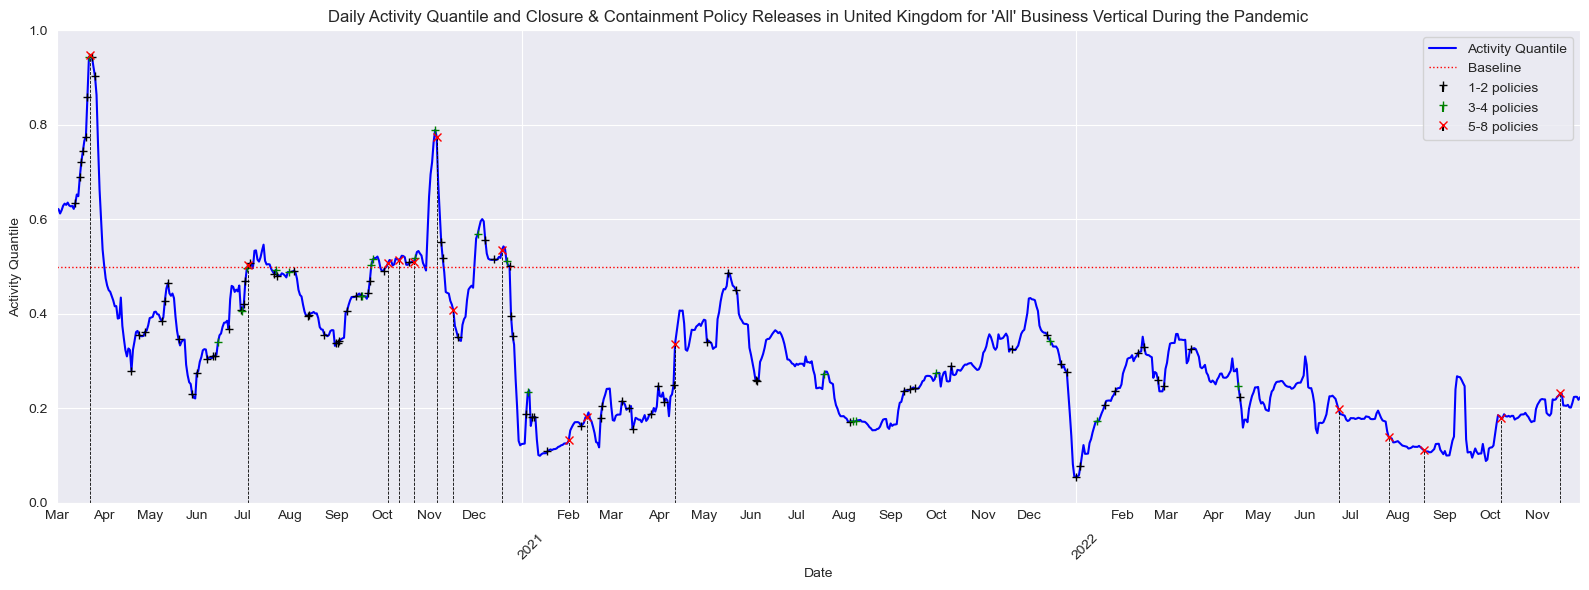

In [532]:
plotData_policy = df_policy_counts.query('CountryName=="United Kingdom"')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(16, 6))

# Line plot
ax1.plot(plotData_policy['date'], plotData_policy['activity_quantile'], color='blue', label='Activity Quantile')

# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '1-2 policies')")['date'], 
                                           plotData_policy.query("(label == '1-2 policies')")['activity_quantile'], 
                                           linefmt='k-', markerfmt='k+', basefmt=' ', label='1-2 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '3-4 policies')")['date'], 
                                           plotData_policy.query("(label == '3-4 policies')")['activity_quantile'], 
                                           linefmt='g-', markerfmt='g+', basefmt=' ', label='3-4 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("label == '5-8 policies'")['date'], 
                                           plotData_policy.query("label == '5-8 policies'")['activity_quantile'], 
                                           linefmt='k--', markerfmt='rx', basefmt=' ', label='5-8 policies')
plt.setp(stemlines, linewidth=0.6)  # Adjust line width here

# baseline
ax1.axhline(y=0.5,color='red', label='Baseline',linewidth=1, linestyle=":")

# Formatting
# put legends
ax1.legend()

# set x-axis limit to the range of dates in the data
ax1.set_xlim([plotData_policy['date'].min()+pd.DateOffset(days=0), plotData_policy['date'].max()+pd.DateOffset(days=0)])
ax1.set_ylim([0,1])

# rotate the x-axis tick labels for readability
ax1.tick_params(axis='x', rotation=45)

# Get the unique years in your dataset
unique_years = plotData_policy.dropna()['date'].dt.year.unique()

# set the major ticks to be at the beginning of each year
ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n\n%Y'))

# set the minor ticks to be at the beginning of each month
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

# labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Activity Quantile')
ax1.set_title("Daily Activity Quantile and Closure & Containment Policy Releases in United Kingdom for 'All' Business Vertical During the Pandemic")

plt.tight_layout()

# save figure
plt.savefig('figures/q8.4_UK_policyrelease.png')

plt.show()

In [663]:
plotData_policy = df_policy_counts.query('CountryName=="United Kingdom"').copy()
plotData_policy.set_index('date',inplace=True)
plotData_policy.dropna(inplace=True)

In [664]:
investigate_Br = df_pol_dates.query("CountryName == 'United Kingdom'").set_index('Date').copy()

<Axes: xlabel='Date'>

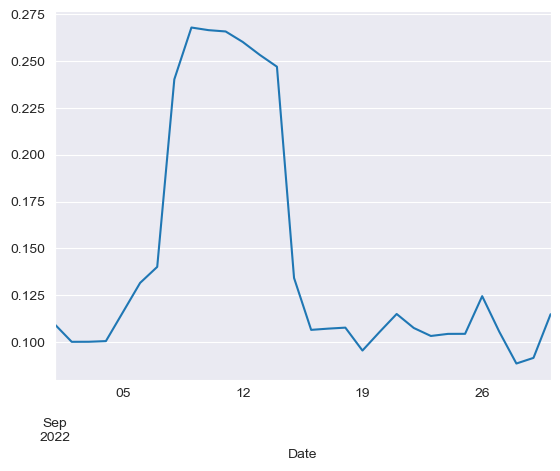

In [695]:
investigate_Br.loc['September 2022']['activity_quantile'].plot()

Let's look check from 20th April to 11th May

In [680]:
window = plotData_policy.loc['August 2022':'September 2022'].index

In [684]:
investigate_Br.loc[window].loc['2022-08-18',"C2_Notes"]

'There are no measures in place across the UK    https://web.archive.org/web/20221006232423/https://www.gov.uk/coronavirus  https://web.archive.org/web/20221007094356/https://gov.wales/public-health-guidance-general-public  https://web.archive.org/web/20221004121508/https://www.gov.scot/coronavirus-covid-19/  https://web.archive.org/web/20221004224603/https://www.nidirect.gov.uk/campaigns/coronavirus-covid-19  '

Part dip in April
* [It appears that this was as a result of the UK government's slow response to the pandemic. Life carried on as usual since no plans were put in place to curb the devasting spread](https://webarchive.nrscotland.gov.uk/20220421075442/http://www.gov.scot/publications/coronavirus-covid-19---implications-of-move-to-delay-phase-cmo-letter-15-march-2020/)(https://www.theguardian.com/politics/2021/oct/12/covid-response-one-of-uks-worst-ever-public-health-failures) [It was not until 23rd March which was the peak, that the prime minister at that time, announced the lockdown measures.](https://archive.vn/VnrbU)

Drop in New Year;
* [Seeing as this occured globally, its most likely due to the discovery of the Delta variant in late 2020 and the Omicron variant in late 2021](https://www.yalemedicine.org/news/covid-19-variants-of-concern-omicron).
* This is most likely due to the fact that workers take a leave for the holidays and as such business activity tends to reduce drastically.

Peak around September 2022:
* [Around 18th August, we can news articles in the UK suggested that all remaining restrictions were lifted but still, this doesn't explain the peak in September](https://web.archive.org/web/20221004121508/https://www.gov.scot/coronavirus-covid-19/)(https://web.archive.org/web/20221006232423/https://www.gov.uk/coronavirus)(https://web.archive.org/web/20221007094356/https://gov.wales/public-health-guidance-general-public)
* [The peak began on the 8th and lasted till the 14th of September and from that coincides with when the late Queen Elizabeth II passed on. Probably such an event led to an increase in the number of postings for most businesses on Facebook which in turn affected the activity quantile](https://www.independent.co.uk/archive/2022-09-08)

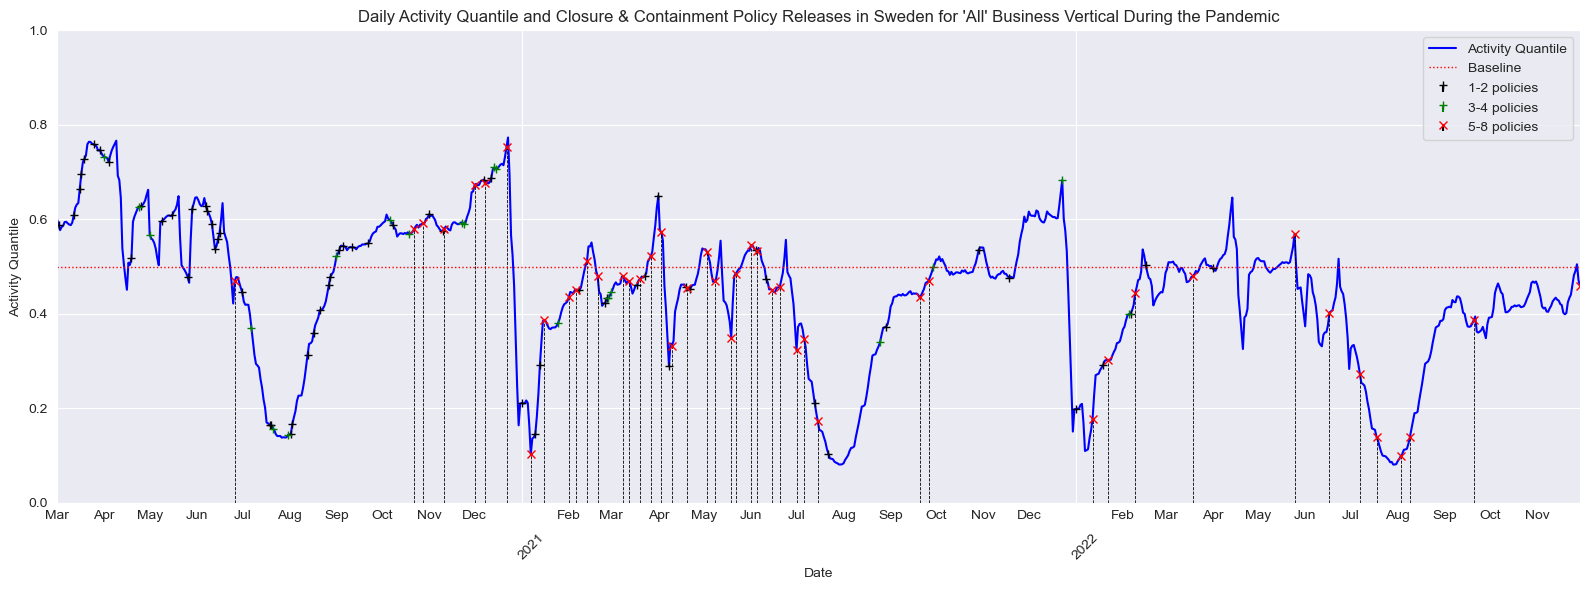

In [533]:
plotData_policy = df_policy_counts.query('CountryName=="Sweden"')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(16, 6))

# Line plot
ax1.plot(plotData_policy['date'], plotData_policy['activity_quantile'], color='blue', label='Activity Quantile')

# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '1-2 policies')")['date'], 
                                           plotData_policy.query("(label == '1-2 policies')")['activity_quantile'], 
                                           linefmt='k-', markerfmt='k+', basefmt=' ', label='1-2 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '3-4 policies')")['date'], 
                                           plotData_policy.query("(label == '3-4 policies')")['activity_quantile'], 
                                           linefmt='g-', markerfmt='g+', basefmt=' ', label='3-4 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("label == '5-8 policies'")['date'], 
                                           plotData_policy.query("label == '5-8 policies'")['activity_quantile'], 
                                           linefmt='k--', markerfmt='rx', basefmt=' ', label='5-8 policies')
plt.setp(stemlines, linewidth=0.6)  # Adjust line width here

# baseline
ax1.axhline(y=0.5,color='red', label='Baseline',linewidth=1, linestyle=":")

# Formatting
# put legends
ax1.legend()

# set x-axis limit to the range of dates in the data
ax1.set_xlim([plotData_policy['date'].min()+pd.DateOffset(days=0), plotData_policy['date'].max()+pd.DateOffset(days=0)])
ax1.set_ylim([0,1])

# rotate the x-axis tick labels for readability
ax1.tick_params(axis='x', rotation=45)

# Get the unique years in your dataset
unique_years = plotData_policy.dropna()['date'].dt.year.unique()

# set the major ticks to be at the beginning of each year
ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n\n%Y'))

# set the minor ticks to be at the beginning of each month
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

# labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Activity Quantile')
ax1.set_title("Daily Activity Quantile and Closure & Containment Policy Releases in Sweden for 'All' Business Vertical During the Pandemic")

plt.tight_layout()

# save figure
plt.savefig('figures/q8.4_sweden_policyrelease.png')

plt.show()

In [696]:
plotData_policy = df_policy_counts.query('CountryName=="Sweden"').copy()
plotData_policy.set_index('date',inplace=True)
plotData_policy.dropna(inplace=True)

In [697]:
investigate_Br = df_pol_dates.query("CountryName == 'Sweden'").set_index('Date').copy()

<Axes: xlabel='Date'>

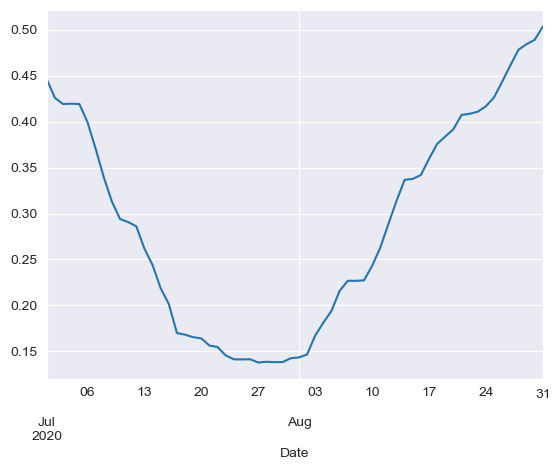

In [707]:
investigate_Br.loc['July 2020':'August 2020']['activity_quantile'].plot()

Let's look check from 20th April to 11th May

In [703]:
window = plotData_policy.loc['June 2021':'September 2021'].index

In [704]:
investigate_Br.loc[window]#.loc['2022-08-18',"C2_Notes"]

CountryName  activity_quantile  \
date                                        
2021-06-01      Sweden           0.545333   
2021-06-04      Sweden           0.534603   
2021-06-05      Sweden           0.532249   
2021-06-11      Sweden           0.473837   
2021-06-15      Sweden           0.449477   
2021-06-20      Sweden           0.457094   
2021-07-01      Sweden           0.322679   
2021-07-06      Sweden           0.346732   
2021-07-13      Sweden           0.210746   
2021-07-15      Sweden           0.172580   
2021-07-22      Sweden           0.103969   
2021-08-25      Sweden           0.339553   
2021-08-29      Sweden           0.372806   
2021-09-20      Sweden           0.434948   
2021-09-26      Sweden           0.469981   
2021-09-29      Sweden           0.498443   

                                                     C1_Notes  \
date                                                            
2021-06-01  Schools are open, though principals of upper s...   
2021-06-04  ***Updated to note that there are not signific...   
2021-06-05  Schools are open. Principals of upper secondar...   
2021-06-11  Summer holidays started on 11 June. After the ...   
2021-06-15                                                NaN   
2021-06-20                                                NaN   
2021-07-01                                                NaN   
2021-07-06  Summer holidays started on 11 June. After the ...   
2021-07-13  Summer holidays started on 11 June. After the ...   
2021-07-15                                                NaN   
2021-07-22                                                NaN   
2021-08-25  No policy change.  http://web.archive.org/web/...   
2021-08-29                                                NaN   
2021-09-20  "On-site teaching on school premises that is t...   
2021-09-26  "On-site teaching on school premises that is t...   
2021-09-29  "On-site teaching on school premises that is t...   

                                                     C2_Notes  \
date                                                            
2021-06-01  Coded as 1 to reflect that even though they ar...   
2021-06-04                                                NaN   
2021-06-05  No change:   Coded as 1 to reflect that even t...   
2021-06-11                                                NaN   
2021-06-15  Coded as 1 to reflect that even though they ar...   
2021-06-20  Coded as 1 to reflect that even though they ar...   
2021-07-01  Workplaces are open but there are still restri...   
2021-07-06  Workplaces are open but there are still restri...   
2021-07-13                                                NaN   
2021-07-15  From 15 July, restrictions on businesses were ...   
2021-07-22                                                NaN   
2021-08-25  No policy change.  http://web.archive.org/web/...   
2021-08-29                                                NaN   
2021-09-20  No change to policies announced in July- https...   
2021-09-26  There is no change in policies on this topic, ...   
2021-09-29                                                NaN   

                                                     C3_Notes  \
date                                                            
2021-06-01  Coded as 1 to reflect that some public events ...   
2021-06-04                                                NaN   
2021-06-05  No change:   Coded as 1 to reflect that some p...   
2021-06-11                                                NaN   
2021-06-15  Coded as 1 to reflect that more public events ...   
2021-06-20  Coded as 1 to reflect that more public events ...   
2021-07-01  Most public events can take place, but some re...   
2021-07-06  Many public events can take place, but some re...   
2021-07-13                                                NaN   
2021-07-15  Many public events can take place, but some re...   
2021-07-22                                                NaN   
2021-08-25  N

Seasonal dips in late July;
* I still couldn't find an explanation as to why these regularly occuring dips occured

Drop in New Year;
* [Seeing as this occured globally, its most likely due to the discovery of the Delta variant in late 2020 and the Omicron variant in late 2021](https://www.yalemedicine.org/news/covid-19-variants-of-concern-omicron).
* This is most likely due to the fact that workers take a leave for the holidays and as such business activity tends to reduce drastically.


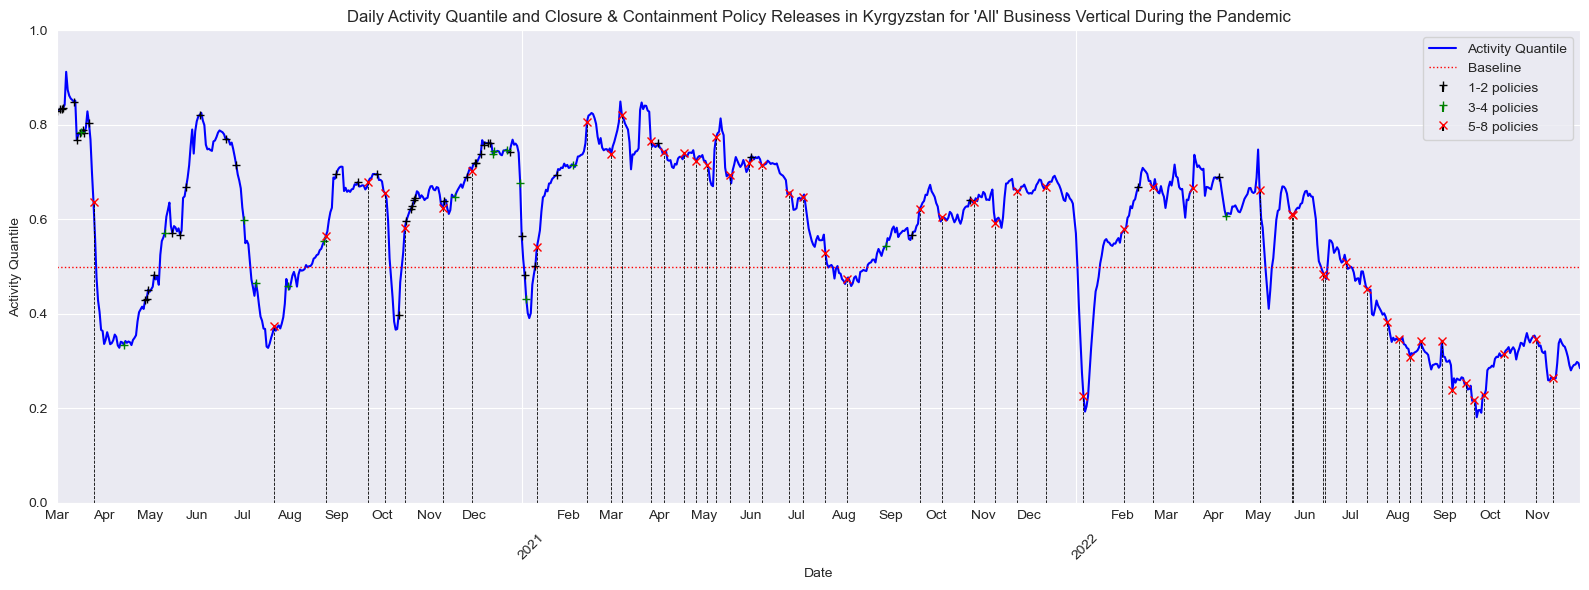

In [534]:
plotData_policy = df_policy_counts.query('CountryName=="Kyrgyzstan"')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(16, 6))

# Line plot
ax1.plot(plotData_policy['date'], plotData_policy['activity_quantile'], color='blue', label='Activity Quantile')

# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '1-2 policies')")['date'], 
                                           plotData_policy.query("(label == '1-2 policies')")['activity_quantile'], 
                                           linefmt='k-', markerfmt='k+', basefmt=' ', label='1-2 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '3-4 policies')")['date'], 
                                           plotData_policy.query("(label == '3-4 policies')")['activity_quantile'], 
                                           linefmt='g-', markerfmt='g+', basefmt=' ', label='3-4 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("label == '5-8 policies'")['date'], 
                                           plotData_policy.query("label == '5-8 policies'")['activity_quantile'], 
                                           linefmt='k--', markerfmt='rx', basefmt=' ', label='5-8 policies')
plt.setp(stemlines, linewidth=0.6)  # Adjust line width here

# baseline
ax1.axhline(y=0.5,color='red', label='Baseline',linewidth=1, linestyle=":")

# Formatting
# put legends
ax1.legend()

# set x-axis limit to the range of dates in the data
ax1.set_xlim([plotData_policy['date'].min()+pd.DateOffset(days=0), plotData_policy['date'].max()+pd.DateOffset(days=0)])
ax1.set_ylim([0,1])

# rotate the x-axis tick labels for readability
ax1.tick_params(axis='x', rotation=45)

# Get the unique years in your dataset
unique_years = plotData_policy.dropna()['date'].dt.year.unique()

# set the major ticks to be at the beginning of each year
ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n\n%Y'))

# set the minor ticks to be at the beginning of each month
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

# labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Activity Quantile')
ax1.set_title("Daily Activity Quantile and Closure & Containment Policy Releases in Kyrgyzstan for 'All' Business Vertical During the Pandemic")

plt.tight_layout()

# save figure
plt.savefig('figures/q8.4_kyrgyzstan_policyrelease.png')

plt.show()